In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import required libraries
We start by importing the key Python libraries for data manipulation, numerical computation, and visualization.


In [ ]:
df = pd.read_csv("/content/ev_battery_augmented.csv")

display(df.head())

SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  Ambient Temp (°C)  \
0  43.708611     3.629593    33.553512          33.454060          26.439918   
1  95.564288     3.879331    32.228092          35.933628          31.108647   
2  75.879455     4.111062    91.562912          25.009358          30.203219   
3  63.879264     4.012557    32.459158          32.497482          18.077998   
4  24.041678     4.064593    34.475475          31.434920          17.984989   

   Charging Duration (min)  Degradation Rate (%) Charging Mode  \
0                59.363552              8.805096          Fast   
1                67.343566             12.186860          Fast   
2               105.454739             13.832336          Slow   
3                54.000439              9.318874          Fast   
4               106.964968             11.687577          Fast   

   Efficiency (%) Battery Type  Charging Cycles EV Model  \
0       98.238981       Li-ion            112.0  Model B   
1       97.562628      LiFePO4            398.0  Model A   
2       97.233533      LiFePO4            175.0  Model A   
3       98.136225      LiFePO4              NaN  Model B   
4       97.662485       Li-ion            886.0  Model C   

   Optimal Charging Duration Class  
0                              1.0  
1                              1.0  
2                              2.0  
3                              1.0  
4                              2.0

In [ ]:
df_copy2=df.copy()

### Load the Dataset  
We load the augmented electric vehicle (EV) battery dataset into a Pandas DataFrame from the given CSV file path.  
Displaying the first few rows helps verify that the data has been read correctly and gives a quick glimpse of its structure.


In [ ]:
df.tail()

SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  \
5045  72.561851     3.649681    39.882688          33.761233   
5046  52.206983     4.118779    56.952458          30.603324   
5047  40.826379     4.023414    64.599906          24.793408   
5048  46.076628     3.929754    27.723313          29.279634   
5049  76.584733     3.415503    46.998755          29.392868   

      Ambient Temp (°C)  Charging Duration (min)  Degradation Rate (%)  \
5045          28.417863                39.720042              5.265777   
5046          17.375724               103.429865             13.589661   
5047          34.825051                73.686628              7.832987   
5048          33.105980               101.967700             12.265121   
5049                NaN                88.007863              5.874562   

     Charging Mode  Efficiency (%) Battery Type  Charging Cycles EV Model  \
5045          Slow      100.000000       Li-ion            499.0  Model A   
5046          Slow       99.932232      LiFePO4            304.0  Model C   
5047          Fast       98.364883      LiFePO4            722.0  Model B   
5048        Normal       97.546976       Li-ion            444.0  Model C   
5049          Slow       98.059008      LiFePO4            312.0  Model A   

      Optimal Charging Duration Class  
5045                              1.0  
5046                              1.0  
5047                              3.0  
5048                              2.0  
5049                              1.0

### View the Last Few Records  
To ensure the dataset was loaded completely, we display the last few rows.  
This helps confirm there are no missing or corrupted entries at the end of the file.


In [ ]:
print(df.columns.tolist())


['SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)', 'Ambient Temp (°C)', 'Charging Duration (min)', 'Degradation Rate (%)', 'Charging Mode', 'Efficiency (%)', 'Battery Type', 'Charging Cycles', 'EV Model', 'Optimal Charging Duration Class']


### Check Column Names  
We print the list of all column names in the dataset to understand its structure and identify key variables available for analysis.


In [ ]:
df.shape

(5050, 13)

### Check Dataset Dimensions  
We use the `.shape` attribute to find the number of rows and columns in the dataset.  
This gives a quick overview of the dataset’s size — helping us understand how many samples (rows) and features (columns) are available for analysis.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          4949 non-null   float64
 1   Voltage (V)                      4950 non-null   float64
 2   Current (A)                      4950 non-null   float64
 3   Battery Temp (°C)                4949 non-null   float64
 4   Ambient Temp (°C)                4949 non-null   float64
 5   Charging Duration (min)          4947 non-null   float64
 6   Degradation Rate (%)             4948 non-null   float64
 7   Charging Mode                    5000 non-null   object 
 8   Efficiency (%)                   4950 non-null   float64
 9   Battery Type                     5050 non-null   object 
 10  Charging Cycles                  4949 non-null   float64
 11  EV Model                         5050 non-null   object 
 12  Optimal Charging Dur

### Inspect Dataset Information  
The `.info()` method provides a concise summary of the dataset — including the column names, data types, and non-null counts.  
This helps identify missing values and understand which columns are numerical or categorical.


In [ ]:
df.isnull().sum()

SOC (%)                            101
Voltage (V)                        100
Current (A)                        100
Battery Temp (°C)                  101
Ambient Temp (°C)                  101
Charging Duration (min)            103
Degradation Rate (%)               102
Charging Mode                       50
Efficiency (%)                     100
Battery Type                         0
Charging Cycles                    101
EV Model                             0
Optimal Charging Duration Class    100
dtype: int64

### Check for Missing Values  
We calculate the total number of missing (null) values in each column using `.isnull().sum()`.  
This step helps identify data quality issues and decide whether imputation or removal of records is needed before analysis.


In [ ]:
df.isnull().sum()/df.shape[0]*100

SOC (%)                            2.000000
Voltage (V)                        1.980198
Current (A)                        1.980198
Battery Temp (°C)                  2.000000
Ambient Temp (°C)                  2.000000
Charging Duration (min)            2.039604
Degradation Rate (%)               2.019802
Charging Mode                      0.990099
Efficiency (%)                     1.980198
Battery Type                       0.000000
Charging Cycles                    2.000000
EV Model                           0.000000
Optimal Charging Duration Class    1.980198
dtype: float64

### Percentage of Missing Values  
To better understand the extent of missing data, we compute the percentage of null values in each column.  
Dividing by the total number of rows gives a clearer picture of how much data is missing relative to the dataset size.


In [ ]:
df.duplicated().sum()

np.int64(45)

In [ ]:
#identifying object categories
for i in df.select_dtypes(include=['object', 'category']).columns:
    print(i)
    print(df[i].unique())
    print()

Charging Mode
['Fast' 'Slow' 'Normal' nan]

Battery Type
['Li-ion' 'LiFePO4' '???']

EV Model
['Model B' 'Model A' 'Model C' '####']



### Identify Categorical (Object-Type) Columns  
We loop through all columns with data types `object` or `category` to inspect their unique values.  
This helps in understanding the categorical features present in the dataset and verifying if any column needs encoding or cleaning.


In [ ]:
#identifying garbage values
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print("***"*10)

Charging Mode
Slow      2344
Fast      2317
Normal     339
Name: count, dtype: int64
******************************
Battery Type
LiFePO4    2526
Li-ion     2474
???          50
Name: count, dtype: int64
******************************
EV Model
Model A    1703
Model B    1662
Model C    1635
####         50
Name: count, dtype: int64
******************************


### Identify Garbage or Irregular Values in Categorical Columns  

*   List item
*   List item


We examine the frequency distribution of each object-type column using `value_counts()`.  
This helps detect inconsistent or incorrect entries — such as typos, extra spaces, or placeholder values — that may need cleaning before analysis.


In [ ]:
df.dtypes

SOC (%)                            float64
Voltage (V)                        float64
Current (A)                        float64
Battery Temp (°C)                  float64
Ambient Temp (°C)                  float64
Charging Duration (min)            float64
Degradation Rate (%)               float64
Charging Mode                       object
Efficiency (%)                     float64
Battery Type                        object
Charging Cycles                    float64
EV Model                            object
Optimal Charging Duration Class    float64
dtype: object

### Check Data Types of All Columns  
We use the `.dtypes` attribute to view the data type of each column in the DataFrame.  
This helps verify whether variables are correctly classified as numerical, categorical, or datetime — an important step before preprocessing and modeling.


In [ ]:
df.describe()

SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  \
count  4949.000000  4950.000000  4950.000000        4949.000000   
mean     60.798701     4.062254    52.303314          32.595522   
std      32.273408     2.490417    33.624536          26.586972   
min       0.000000     2.765835     0.000000          12.599682   
25%      44.201710     3.613444    32.811259          26.424310   
50%      59.316816     3.814364    50.388520          30.112683   
75%      74.201463     4.017051    68.807647          33.791205   
max     477.836649    32.379246   541.018683         391.576879   

       Ambient Temp (°C)  Charging Duration (min)  Degradation Rate (%)  \
count        4949.000000              4947.000000           4948.000000   
mean           27.157526                81.641982             10.415404   
std            22.636903                46.208705              5.613069   
min             6.535618                10.000000              1.000000   
25%            21.470588                57.140497              7.935584   
50%            24.962129                78.978433             10.010423   
75%            28.755398                99.888714             12.080037   
max           326.373392               698.032487             99.321395   

       Efficiency (%)  Charging Cycles  Optimal Charging Duration Class  
count     4950.000000      4949.000000                      4950.000000  
mean       101.978696       381.232866                         1.906046  
std         49.370780       346.922789                         1.156565  
min         89.689358        10.000000                         0.000000  
25%         96.024483       193.000000                         1.000000  
50%         97.436150       335.000000                         2.000000  
75%         98.381718       501.000000                         3.000000  
max        624.440116      7107.622804                        12.527335

### Summary Statistics for Numerical Features  
We use the `.describe()` method to generate descriptive statistics for all numerical columns.  
This includes measures like mean, standard deviation, minimum, maximum, and quartiles — providing a quick overview of data distribution and potential outliers.


In [ ]:
df.nunique()


SOC (%)                            4806
Voltage (V)                        4900
Current (A)                        4815
Battery Temp (°C)                  4900
Ambient Temp (°C)                  4900
Charging Duration (min)            4868
Degradation Rate (%)               4894
Charging Mode                         3
Efficiency (%)                     4635
Battery Type                          3
Charging Cycles                     958
EV Model                              4
Optimal Charging Duration Class       7
dtype: int64

### Count of Unique Values per Column  
We use `.nunique()` to determine how many distinct values exist in each column.  
This helps identify categorical columns with limited categories, potential ID-like fields with all unique values, and features suitable for encoding.


In [ ]:
df.duplicated().sum()


np.int64(45)

### Check for Duplicate Records  
We use `.duplicated().sum()` to count how many rows in the dataset are exact duplicates of others.  
Identifying duplicate entries is important to prevent data leakage, redundancy, and biased model training.


In [ ]:
df.describe().T

count        mean         std        min  \
SOC (%)                          4949.0   60.798701   32.273408   0.000000   
Voltage (V)                      4950.0    4.062254    2.490417   2.765835   
Current (A)                      4950.0   52.303314   33.624536   0.000000   
Battery Temp (°C)                4949.0   32.595522   26.586972  12.599682   
Ambient Temp (°C)                4949.0   27.157526   22.636903   6.535618   
Charging Duration (min)          4947.0   81.641982   46.208705  10.000000   
Degradation Rate (%)             4948.0   10.415404    5.613069   1.000000   
Efficiency (%)                   4950.0  101.978696   49.370780  89.689358   
Charging Cycles                  4949.0  381.232866  346.922789  10.000000   
Optimal Charging Duration Class  4950.0    1.906046    1.156565   0.000000   

                                        25%         50%         75%  \
SOC (%)                           44.201710   59.316816   74.201463   
Voltage (V)                        3.613444    3.814364    4.017051   
Current (A)                       32.811259   50.388520   68.807647   
Battery Temp (°C)                 26.424310   30.112683   33.791205   
Ambient Temp (°C)                 21.470588   24.962129   28.755398   
Charging Duration (min)           57.140497   78.978433   99.888714   
Degradation Rate (%)               7.935584   10.010423   12.080037   
Efficiency (%)                    96.024483   97.436150   98.381718   
Charging Cycles                  193.000000  335.000000  501.000000   
Optimal Charging Duration Class    1.000000    2.000000    3.000000   

                                         max  
SOC (%)                           477.836649  
Voltage (V)                        32.379246  
Current (A)                       541.018683  
Battery Temp (°C)                 391.576879  
Ambient Temp (°C)                 326.373392  
Charging Duration (min)           698.032487  
Degradation Rate (%)               99.321395  
Efficiency (%)                    624.440116  
Charging Cycles                  7107.622804  
Optimal Charging Duration Class    12.527335

### Transposed Summary Statistics  
We display the transposed version of the `.describe()` output using `.T` for better readability.  
This arranges each variable vertically, making it easier to compare statistical values across all numerical features side by side.


In [ ]:
df.describe(include='object').T

count unique      top  freq
Charging Mode  5000      3     Slow  2344
Battery Type   5050      3  LiFePO4  2526
EV Model       5050      4  Model A  1703

### Summary Statistics for Categorical Features  
Using `.describe(include='object')`, we generate descriptive statistics specifically for non-numeric (categorical) columns.  
The `.T` transposes the output to make it more readable — showing metrics like count, unique categories, top (most frequent) value, and its frequency for each feature.


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

### Separate Categorical and Numerical Columns  
We create two lists to distinguish between feature types:  
- **`categorical_cols`** → contains names of columns with `object` or `category` data types.  
- **`numerical_cols`** → contains names of columns with numerical data types (`int64`, `float64`).  

This separation helps in applying appropriate preprocessing and visualization techniques for each feature type.


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
#encode categorical values
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### Encode Categorical Variables and Scale Numerical Features  
To prepare the dataset for modeling, we perform two preprocessing steps:  

1. **Label Encoding:**  
   Each categorical column is converted into numerical form using `LabelEncoder()`.  
   This assigns a unique integer value to every category in a feature, making it compatible with ML algorithms.  
   We also store the encoders in a dictionary (`label_encoders`) for potential inverse transformation later.  

2. **Feature Scaling:**  
   Numerical columns are standardized using `StandardScaler()` so that they have zero mean and unit variance.  
   This normalization ensures that features with larger ranges do not dominate those with smaller ones during training.


In [ ]:
# Check mappings of encoded categorical values
for col, encoder in label_encoders.items():
    print(f"Mapping for '{col}':")
    for original, encoded in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"  {original} -> {encoded}")

Mapping for 'Charging Mode':
  Fast -> 0
  Normal -> 1
  Slow -> 2
  nan -> 3
Mapping for 'Battery Type':
  ??? -> 0
  Li-ion -> 1
  LiFePO4 -> 2
Mapping for 'EV Model':
  #### -> 0
  Model A -> 1
  Model B -> 2
  Model C -> 3


### Verify Encoded Categorical Value Mappings  
After applying label encoding, we inspect the mapping between original categorical labels and their corresponding numerical codes.  
This validation step ensures that each category was encoded correctly and helps interpret model outputs later (since encoded values can be traced back to their original labels).


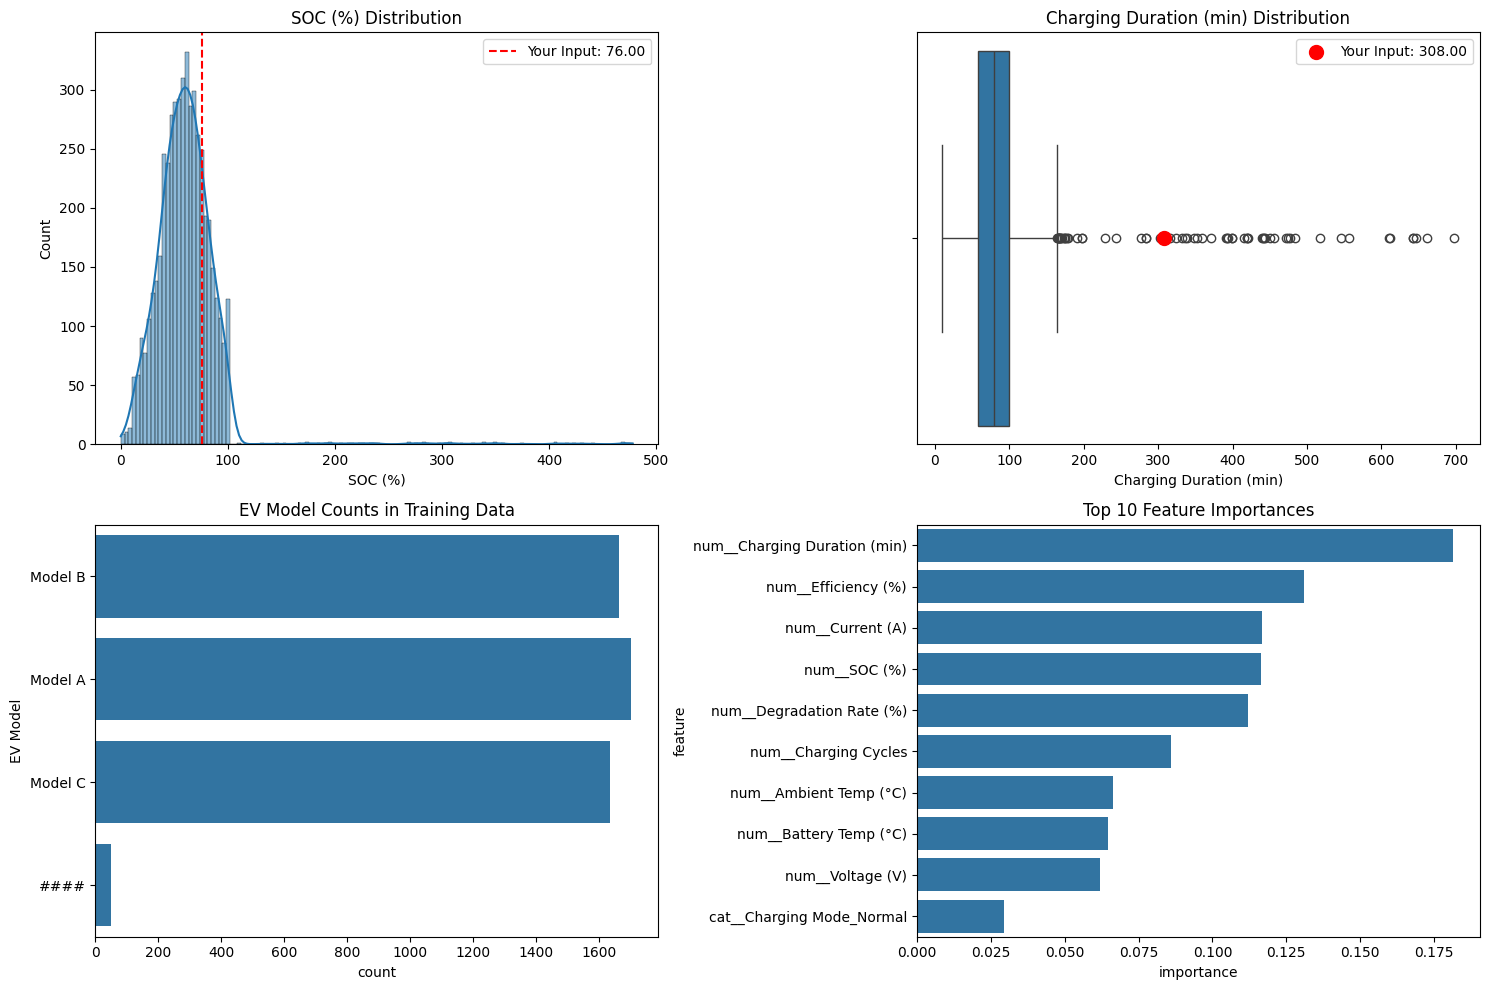

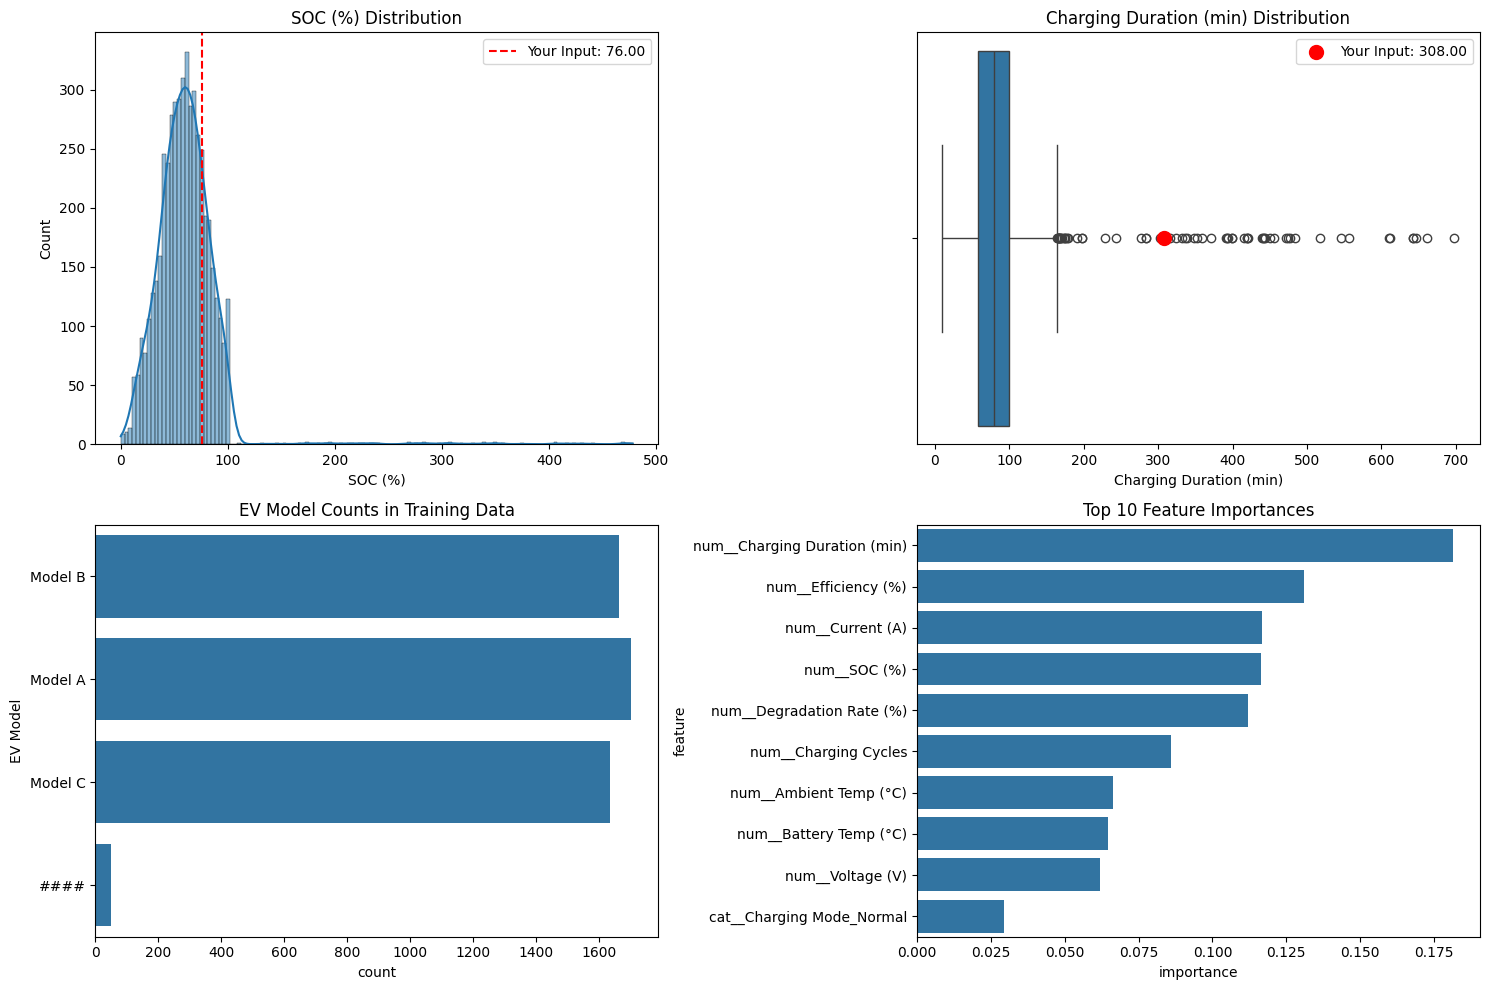

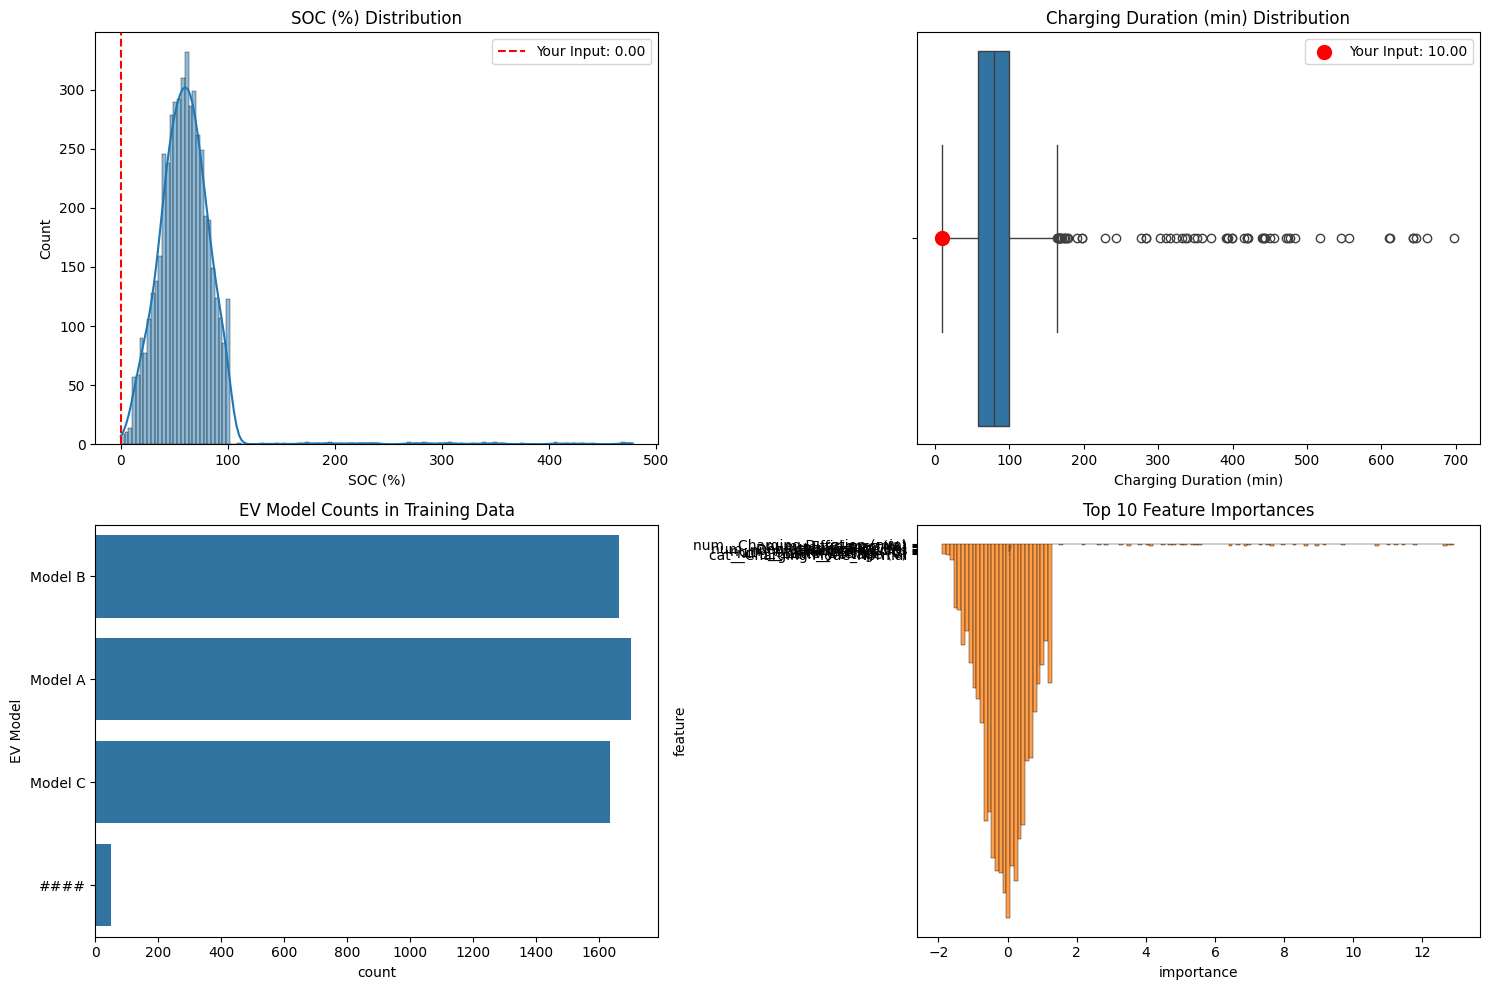

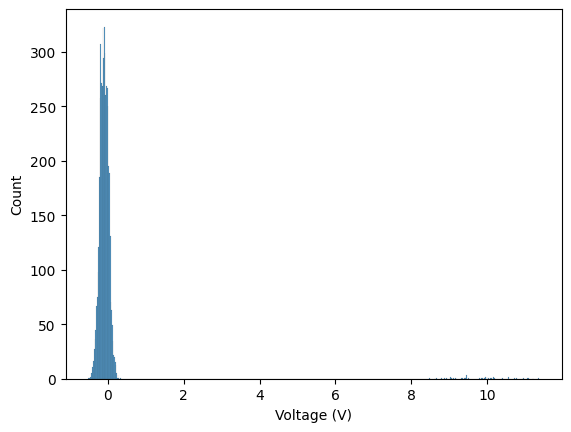

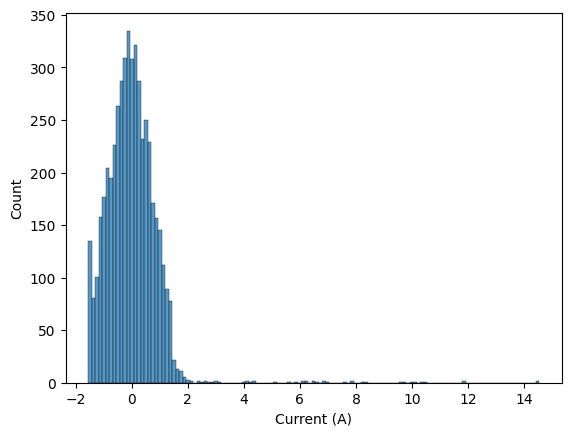

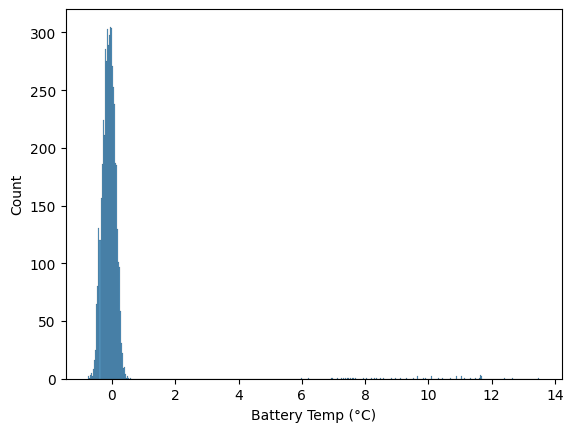

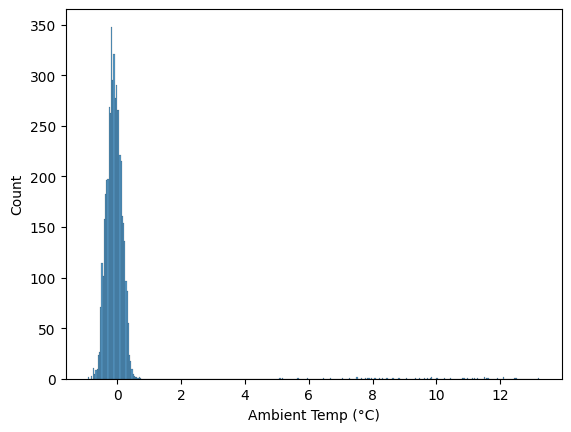

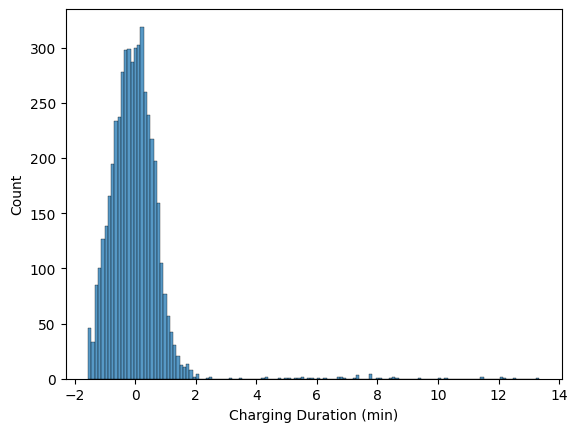

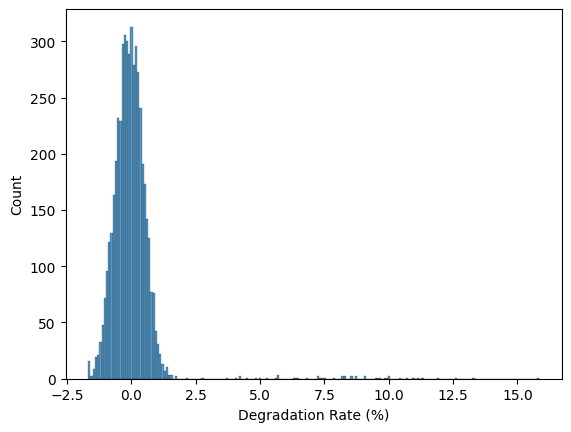

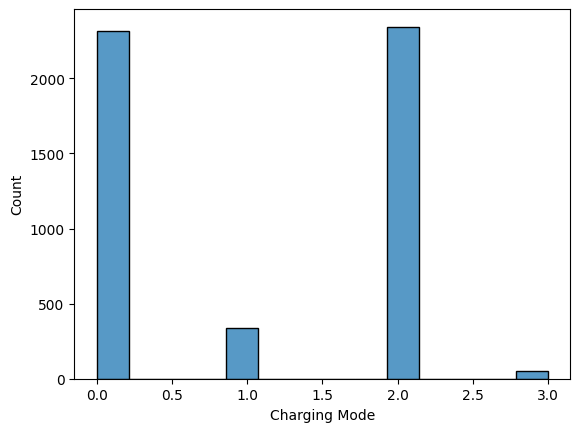

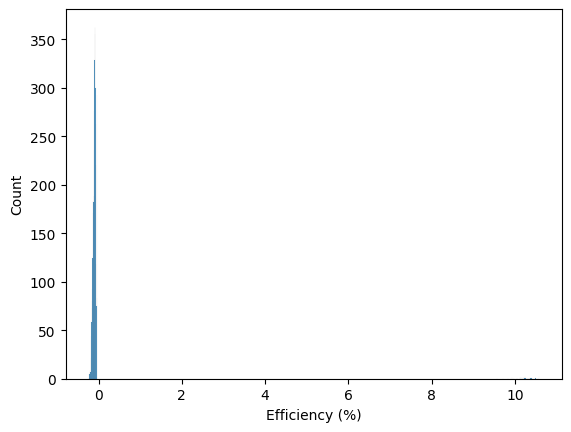

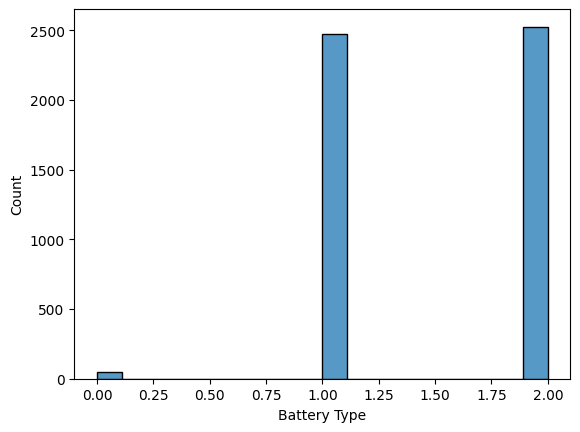

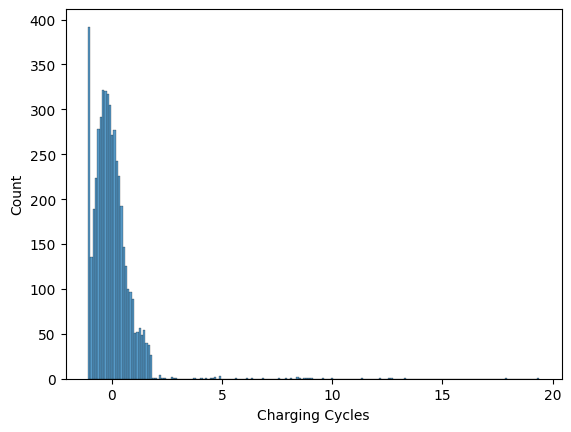

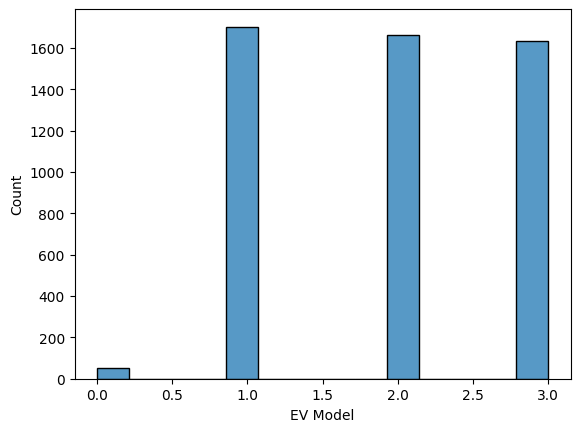

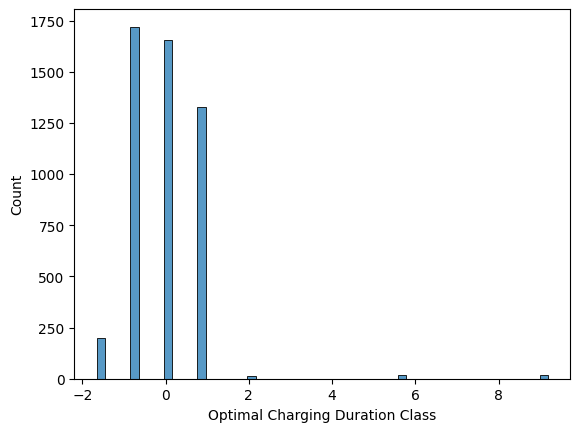

In [ ]:
#histogram for numeric columns
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()


### Visualize Distributions of Numerical Features  
We plot histograms for all numerical columns using Seaborn’s `histplot()`.  
This helps visualize the data distribution, detect skewness, and identify potential outliers in each feature.  
Each plot displays one numerical variable at a time.


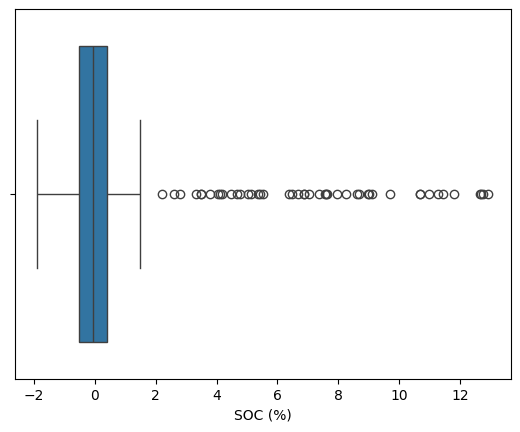

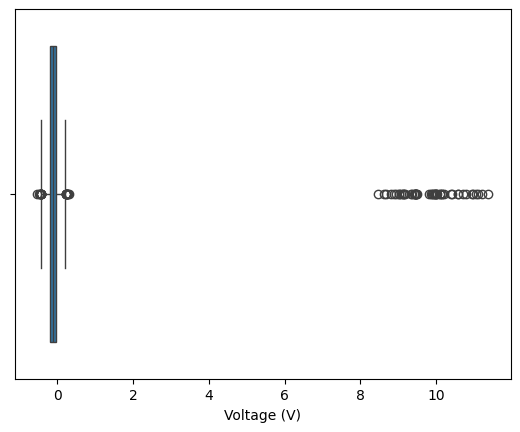

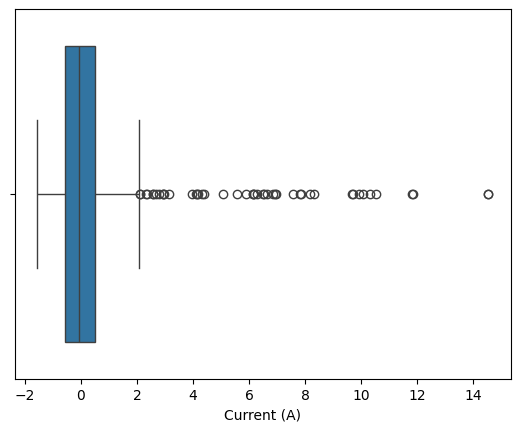

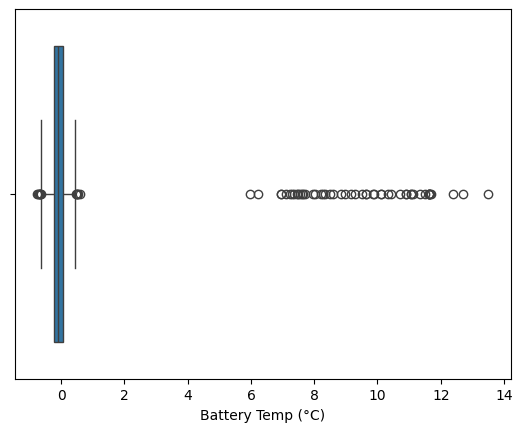

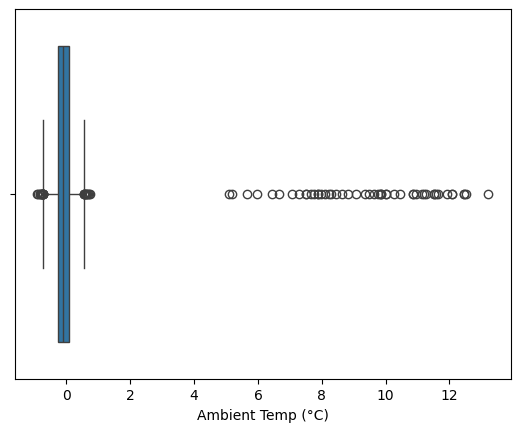

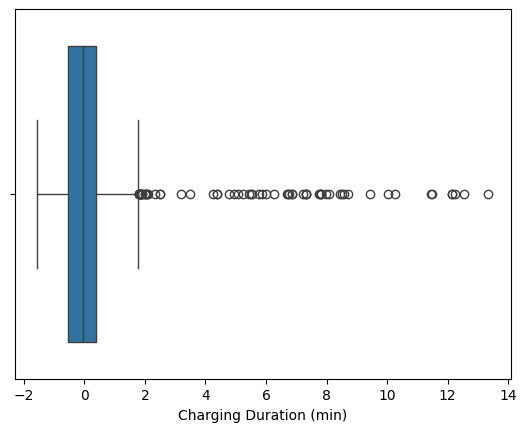

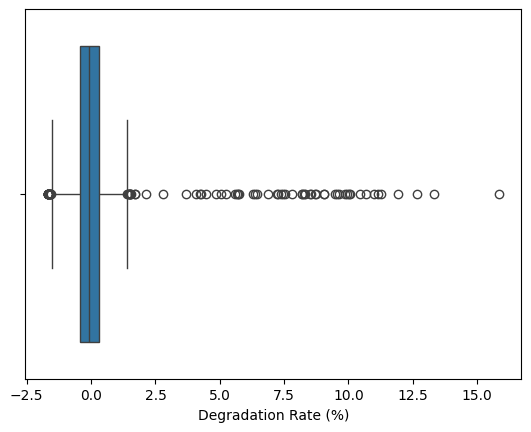

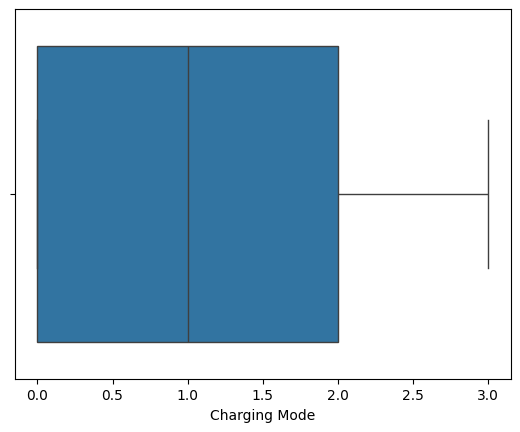

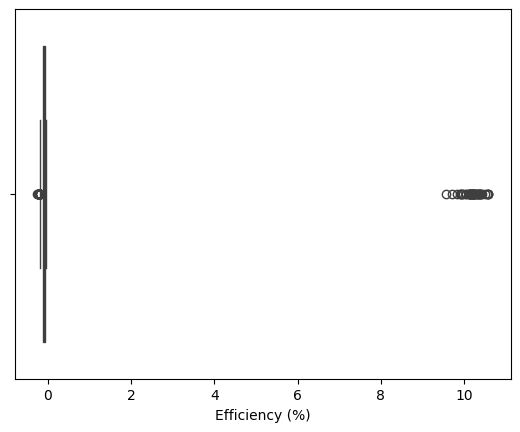

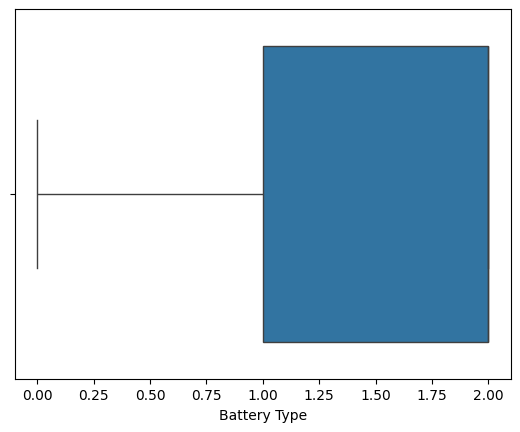

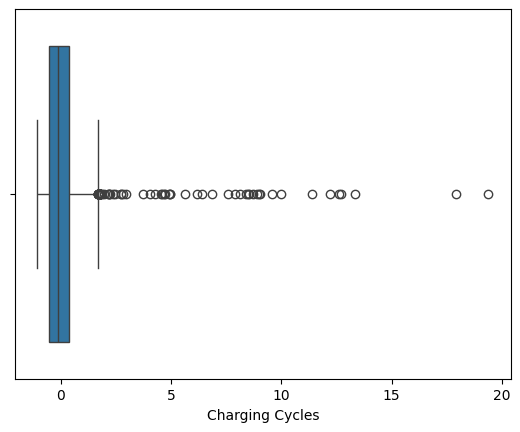

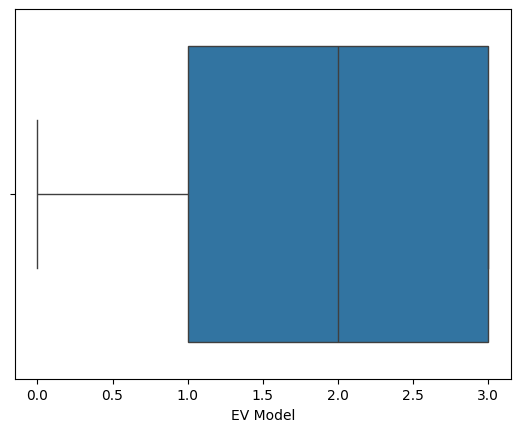

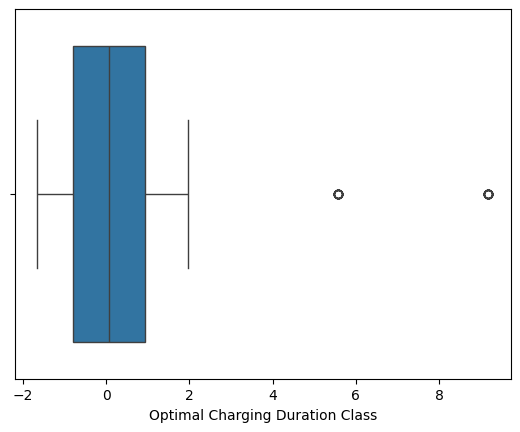

In [ ]:
#boxpplot to identify outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()


### Boxplots to Identify Outliers  
We create boxplots for each numerical feature using Seaborn’s `boxplot()` function.  
Boxplots visually summarize the data distribution and highlight **outliers** — values lying beyond the whiskers — which may affect model performance.  
Inspecting these plots helps decide whether to cap, remove, or transform extreme values.


In [ ]:
#count plots for categorical column
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

### Count Plots for Categorical Columns  
We visualize the frequency distribution of each categorical feature using bar plots.  
These plots help identify class imbalance, dominant categories, or rare values that may require grouping or encoding adjustments.  
Each plot shows how many samples fall under each category of a given feature.


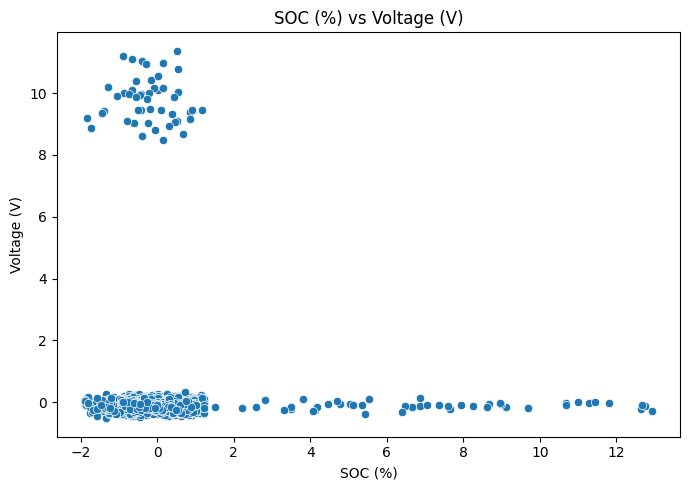

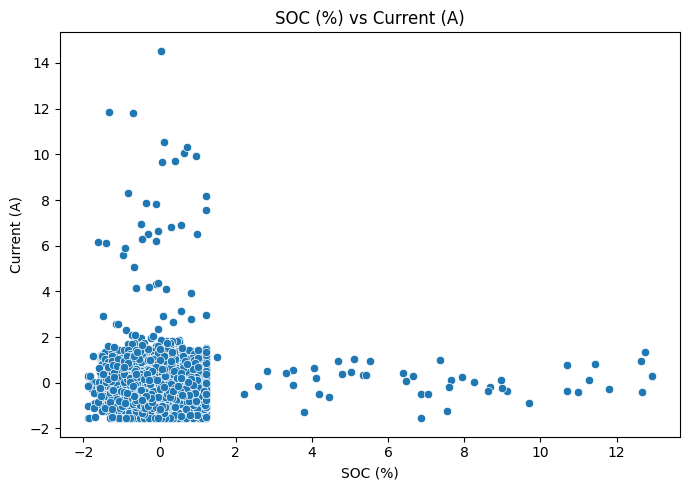

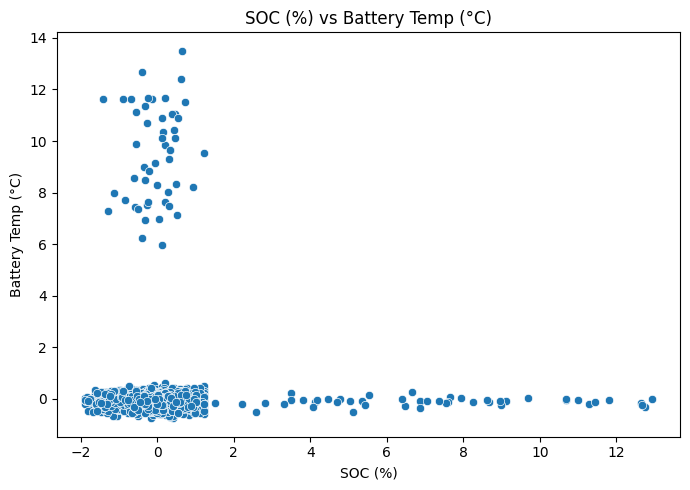

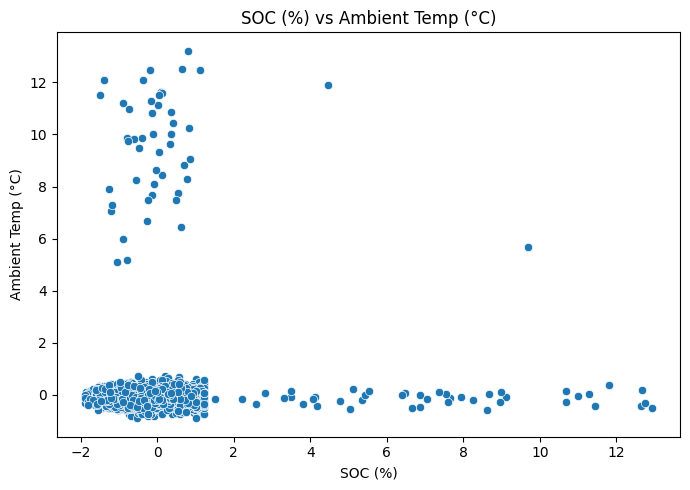

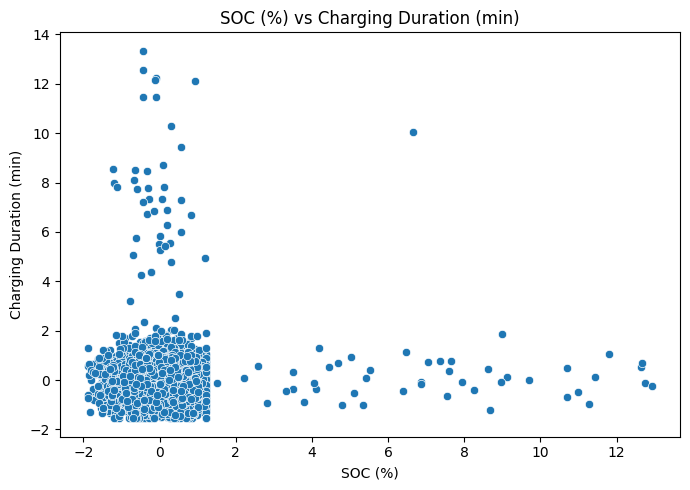

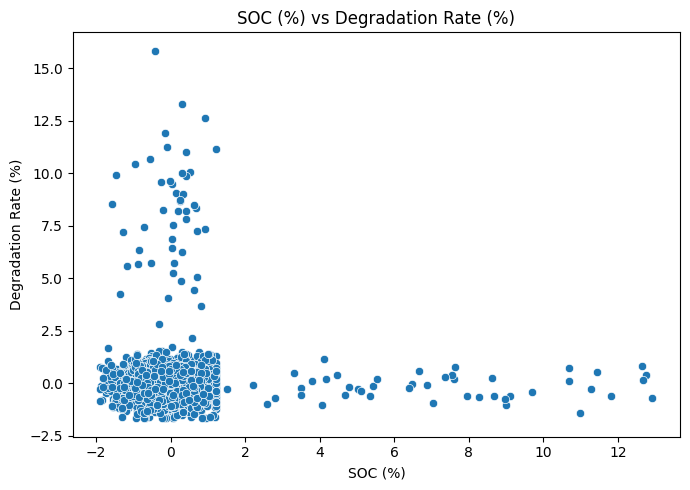

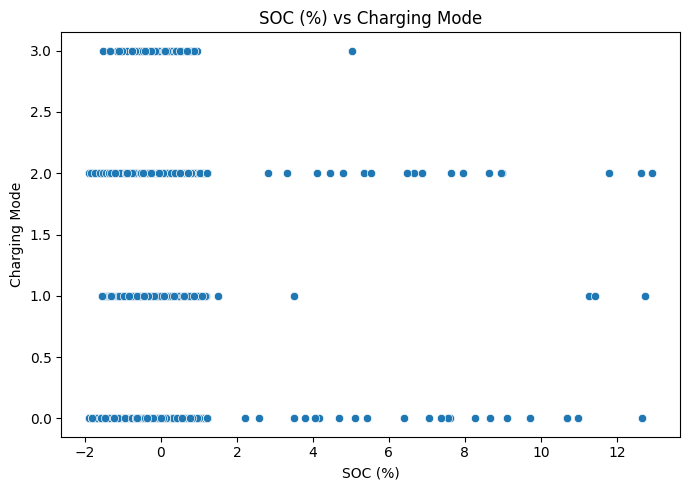

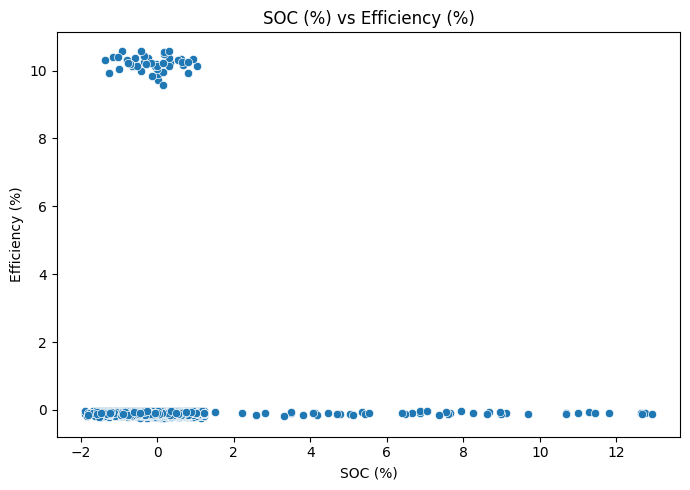

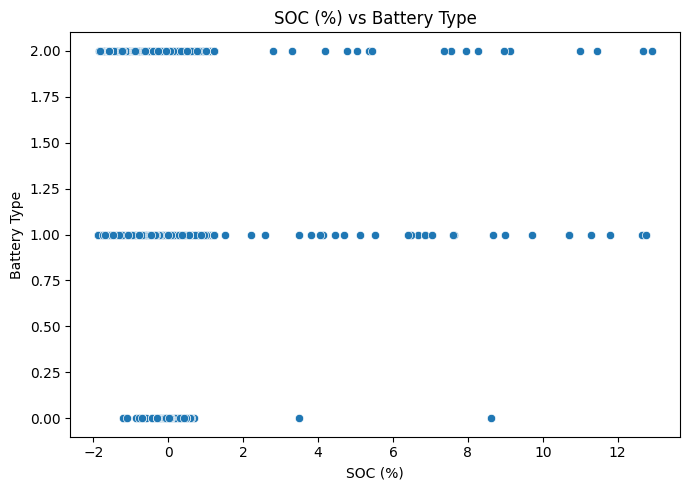

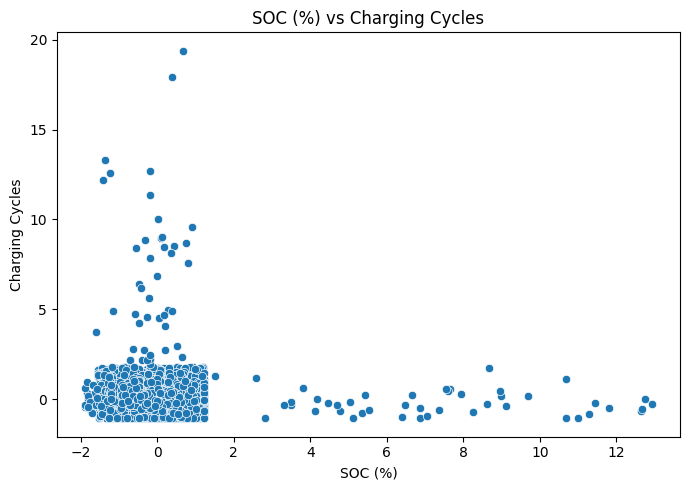

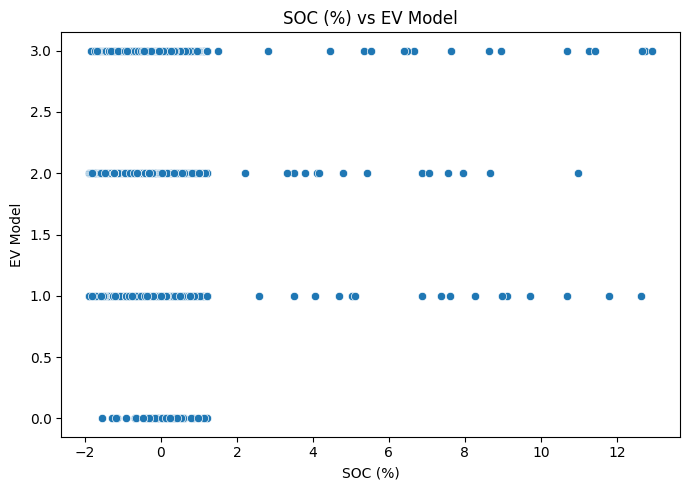

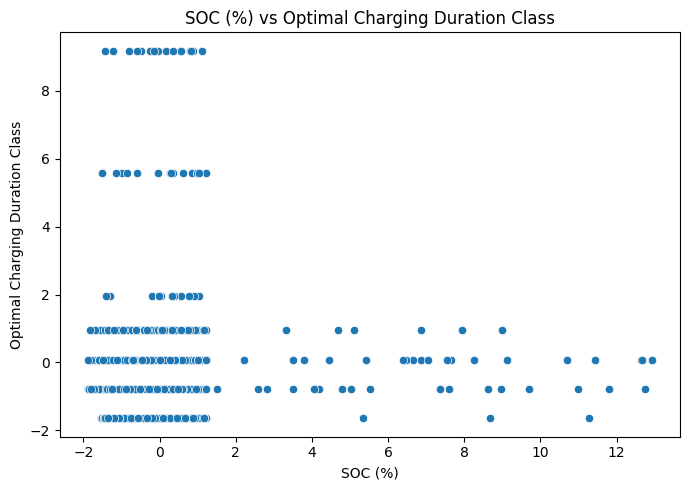

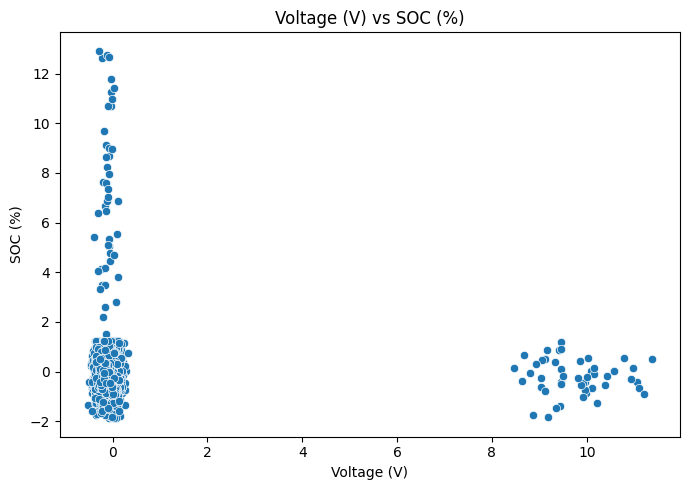

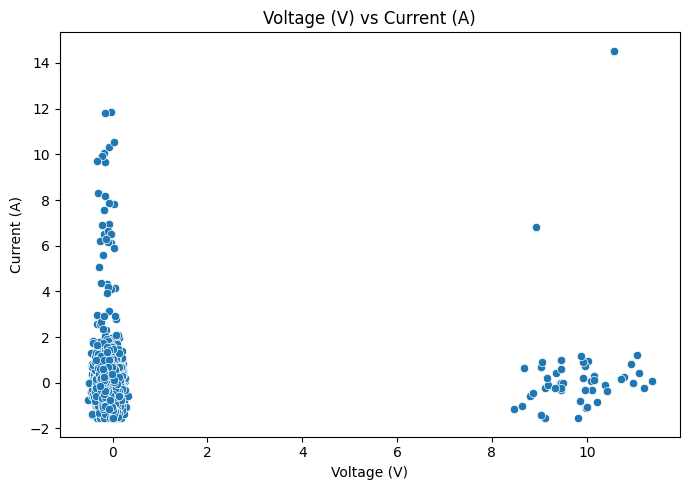

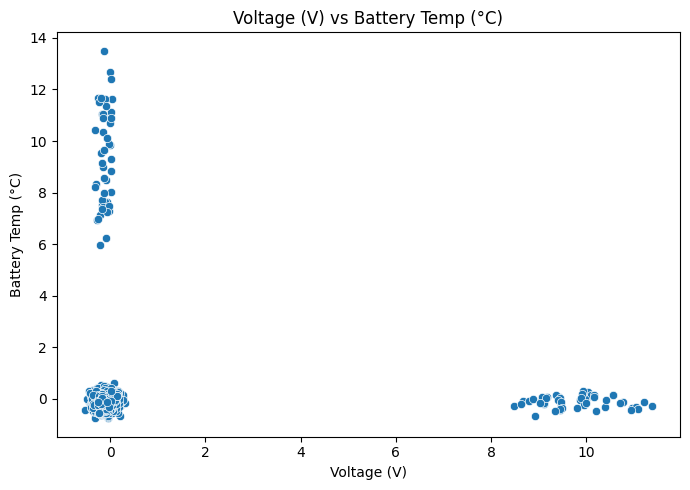

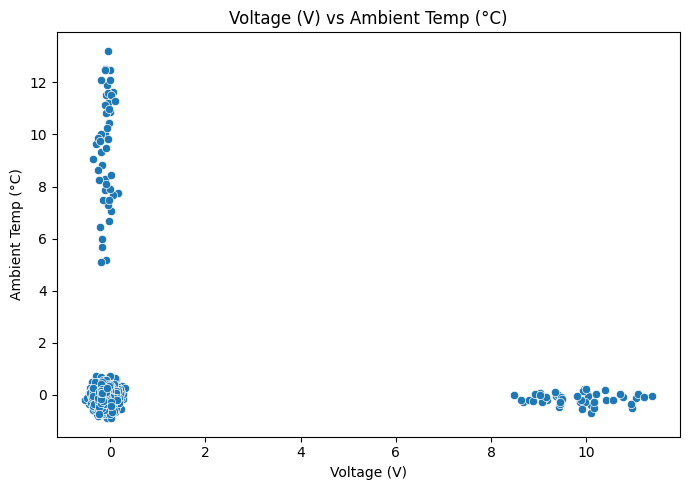

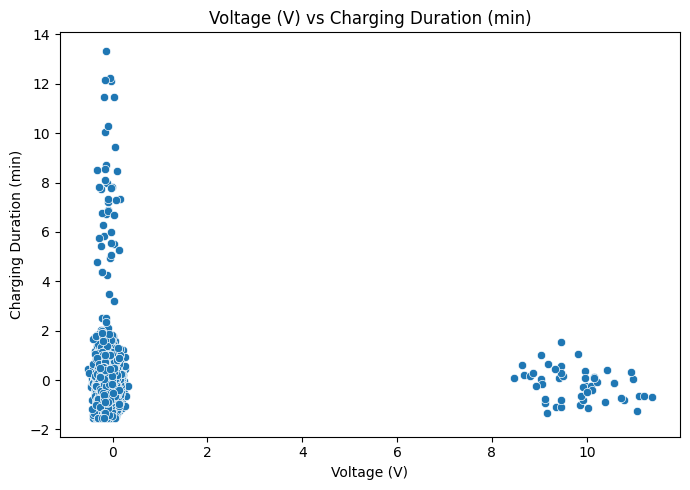

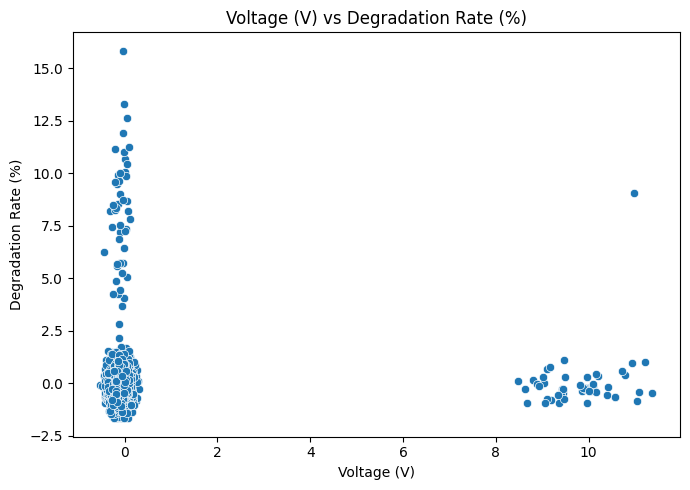

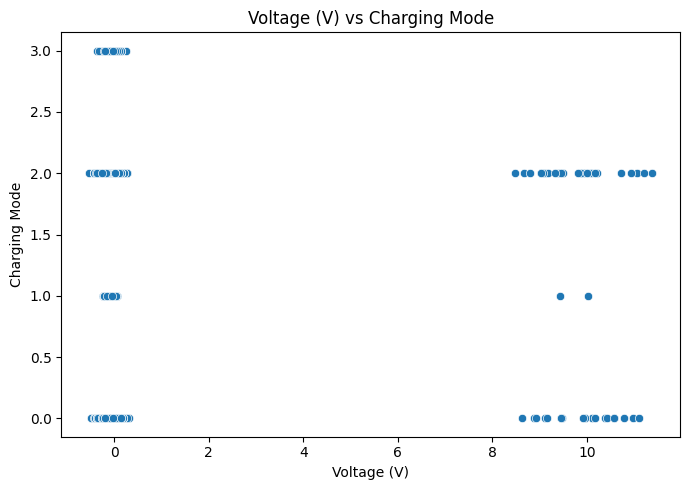

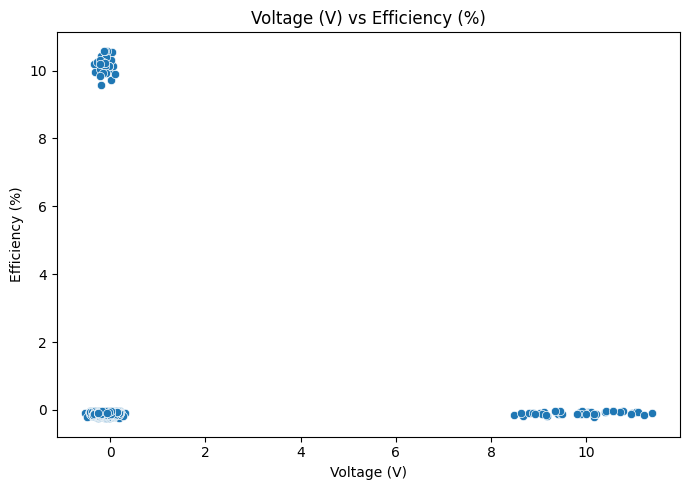

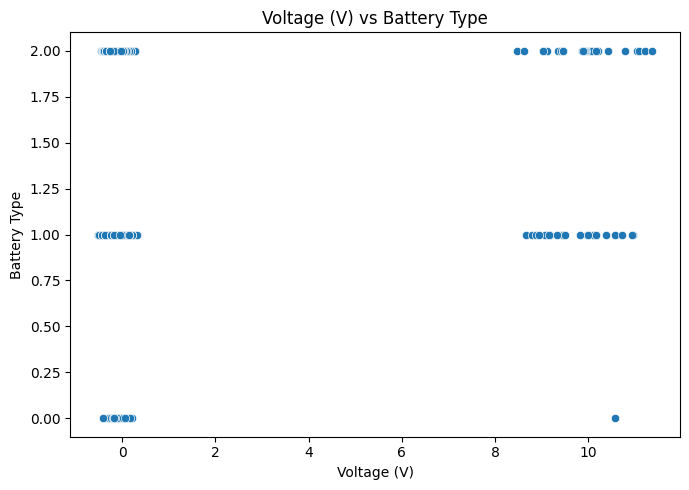

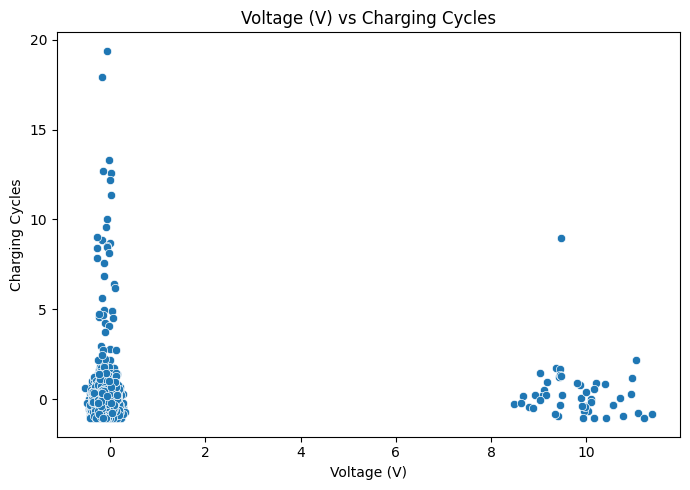

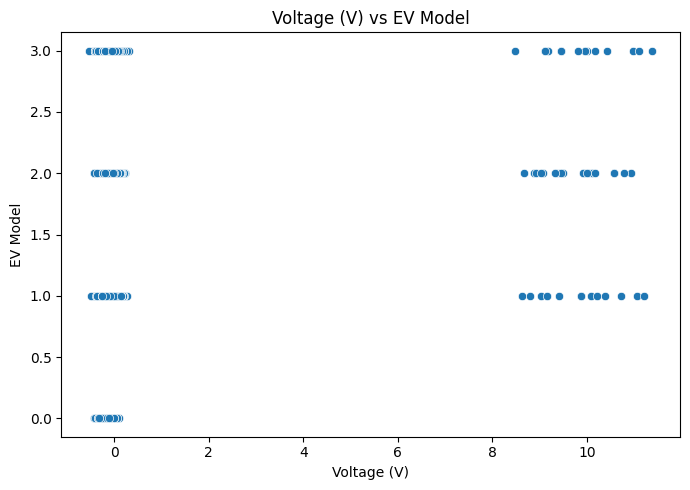

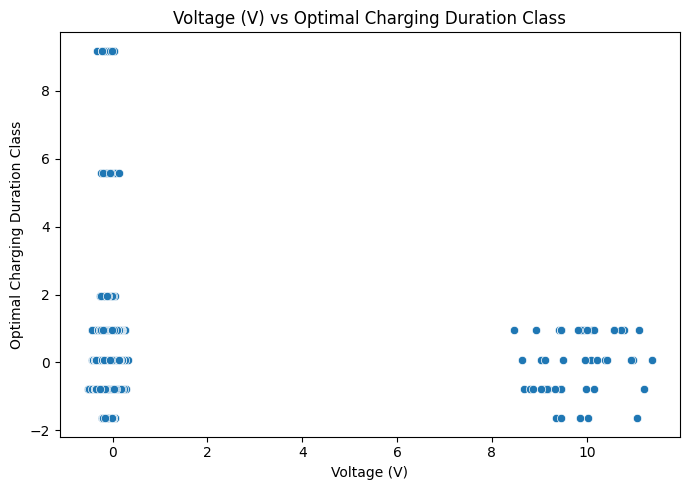

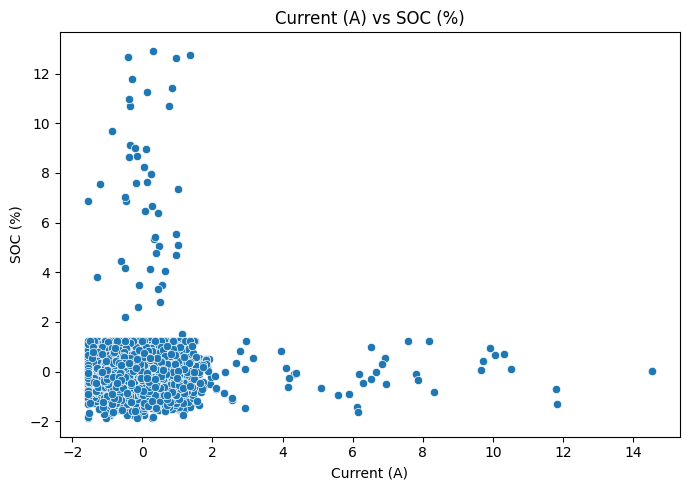

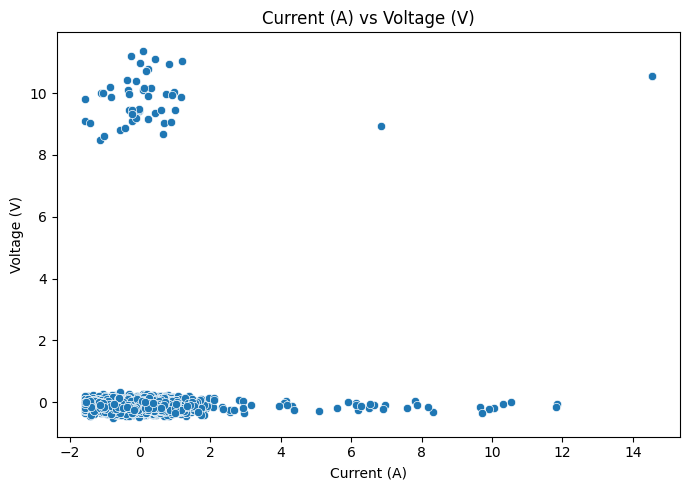

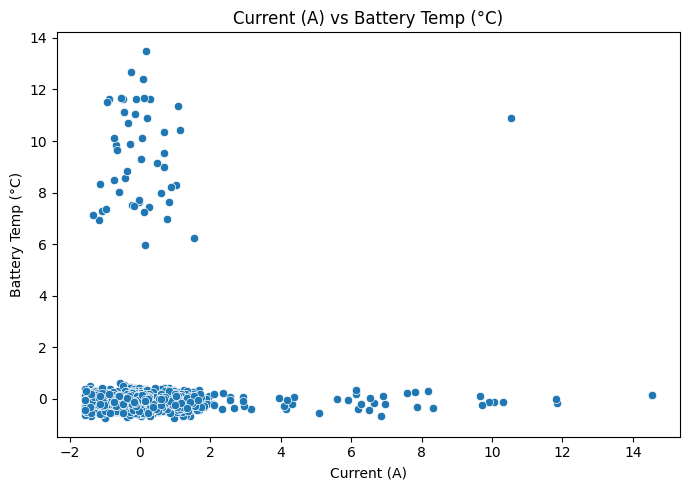

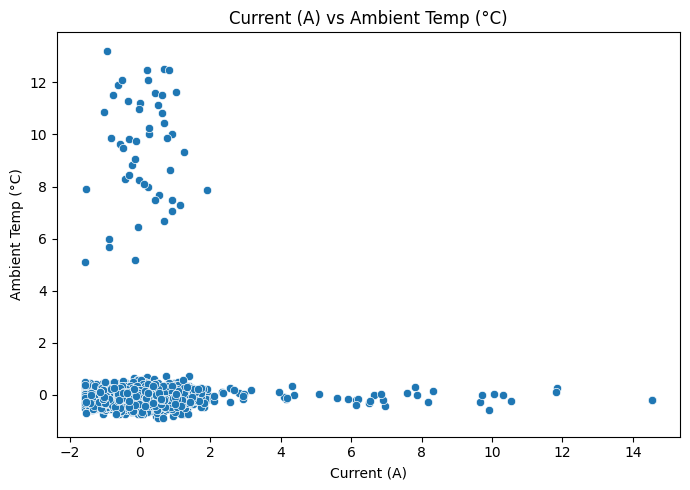

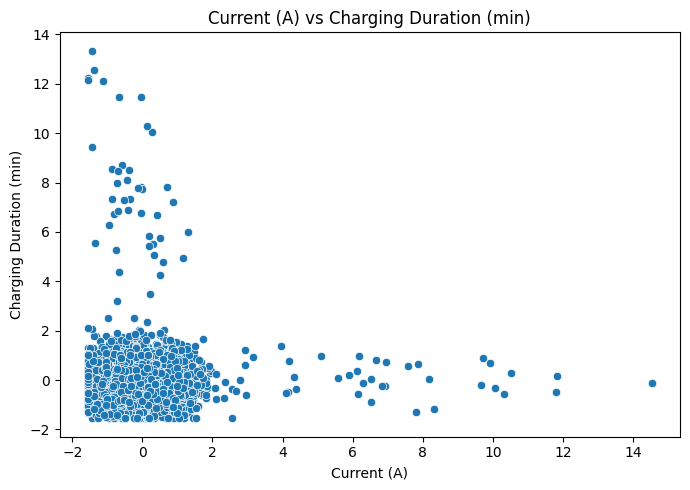

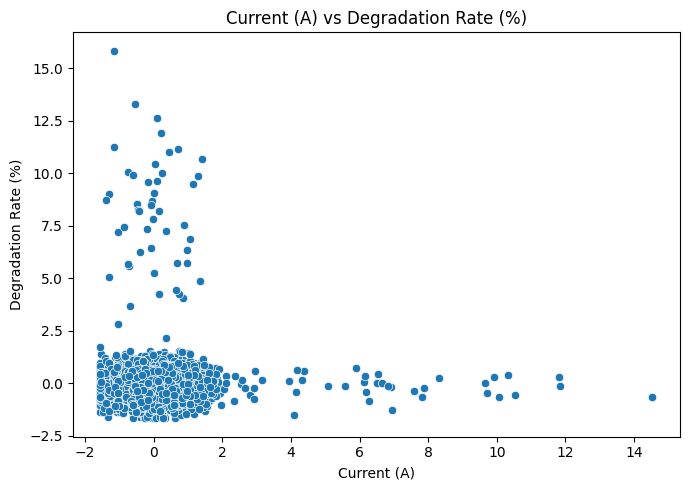

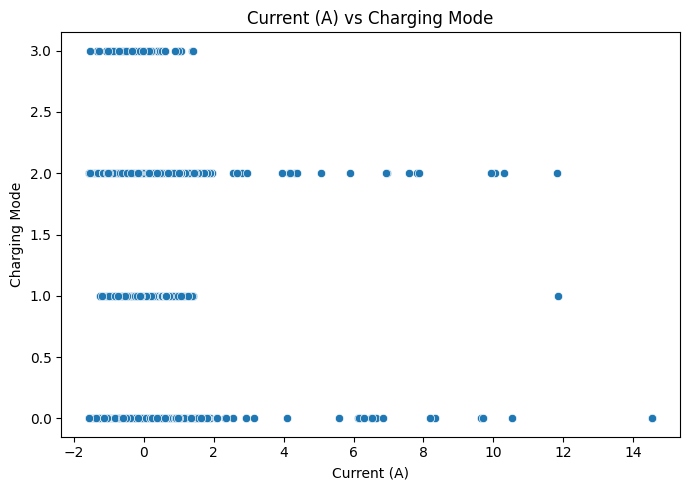

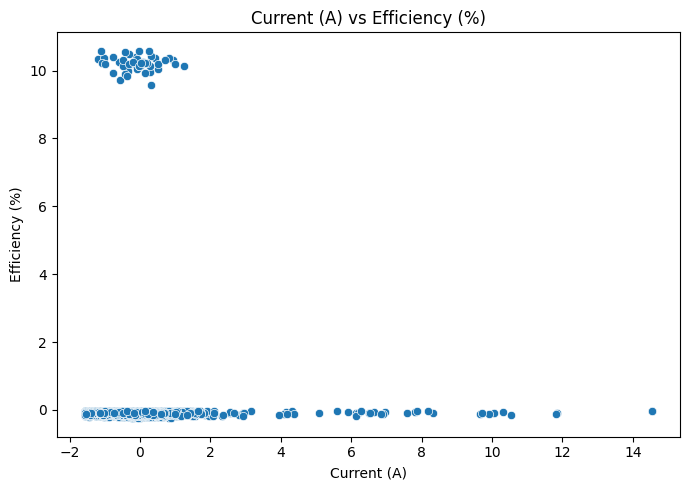

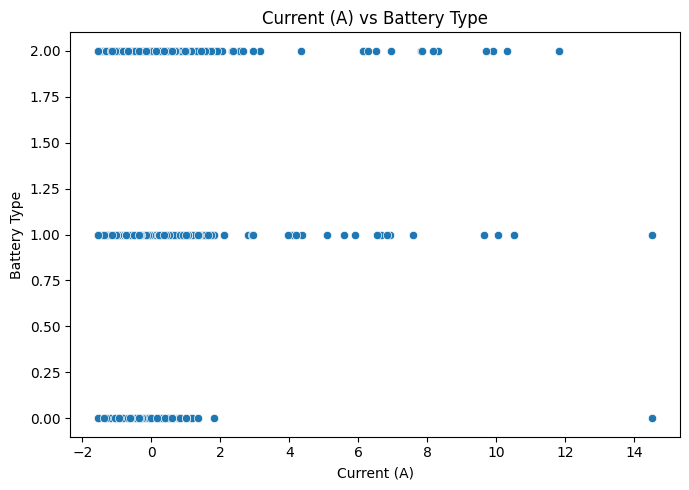

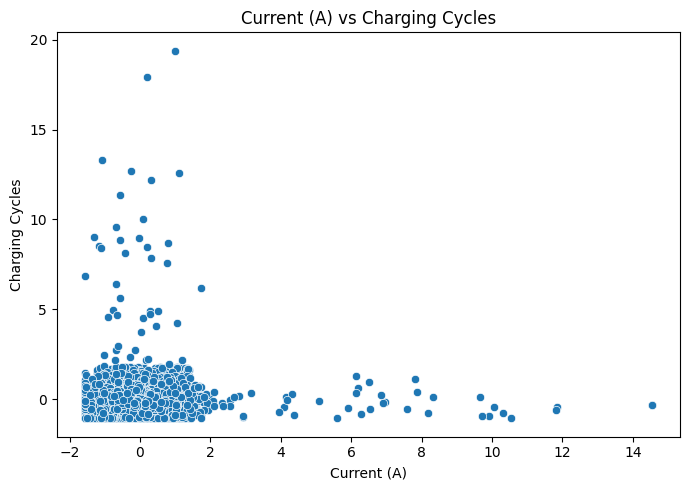

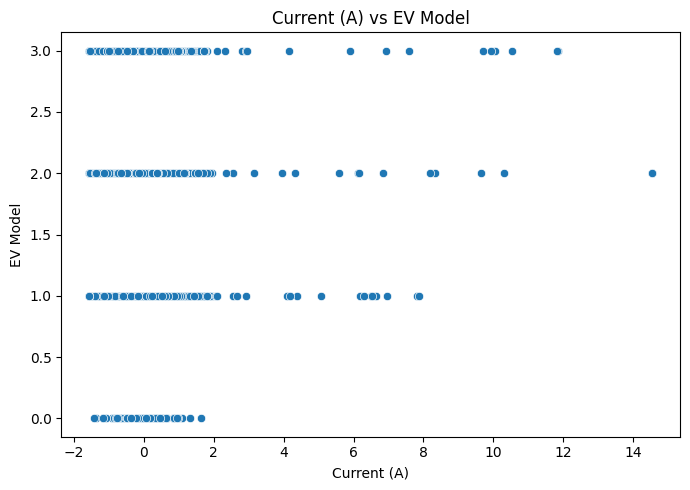

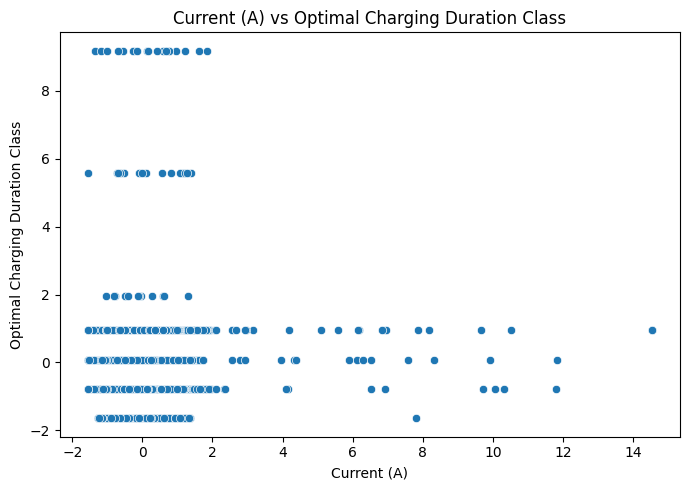

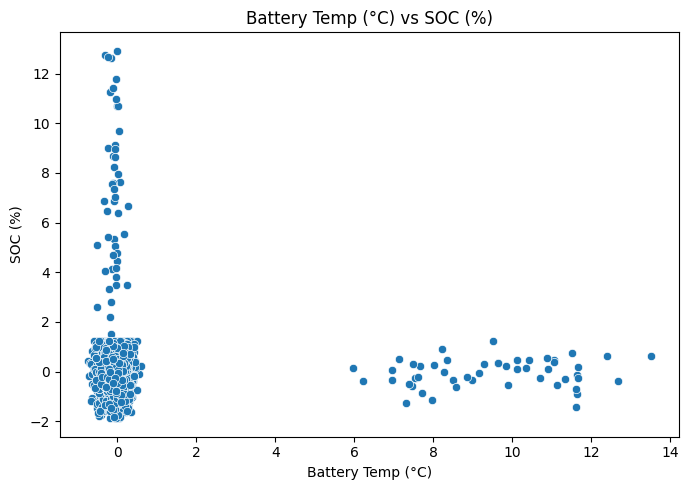

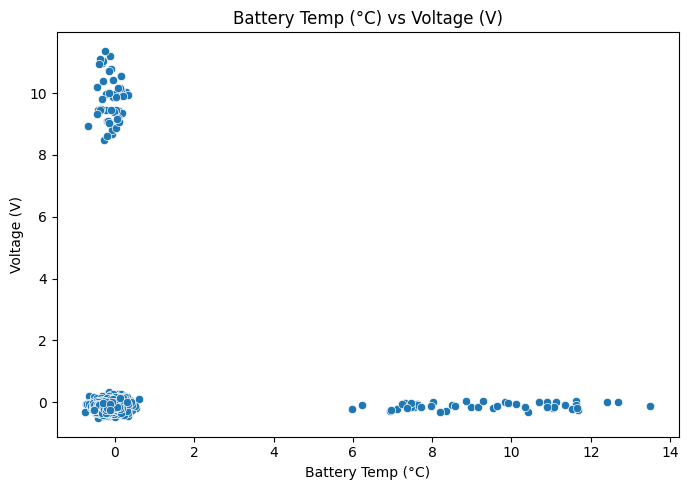

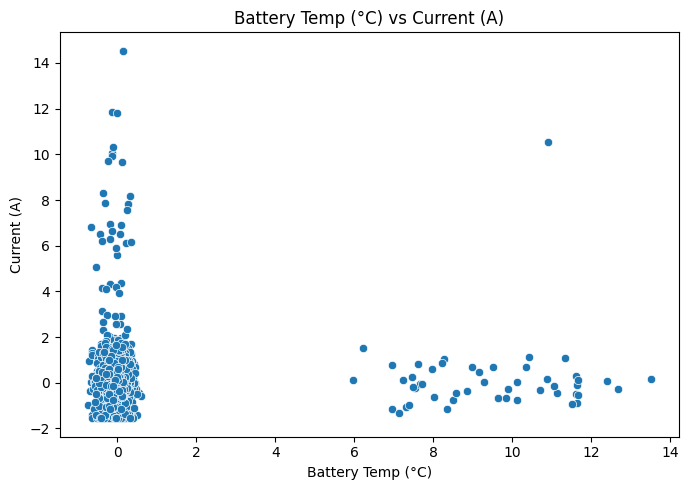

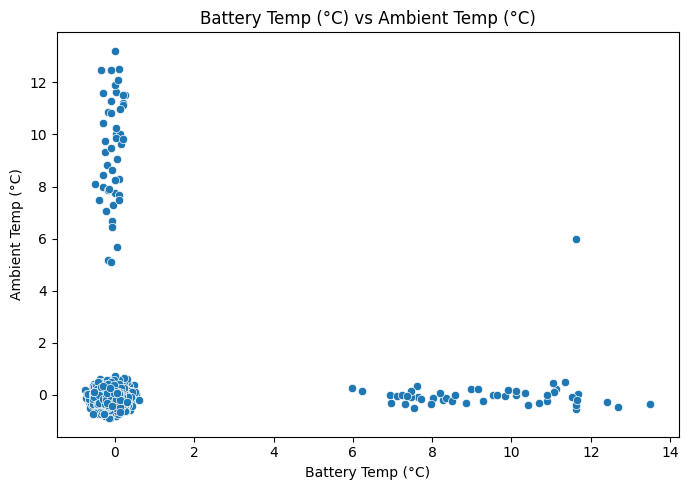

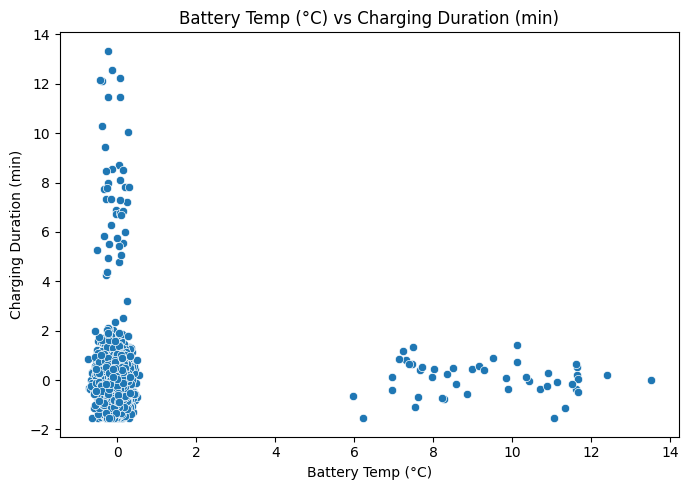

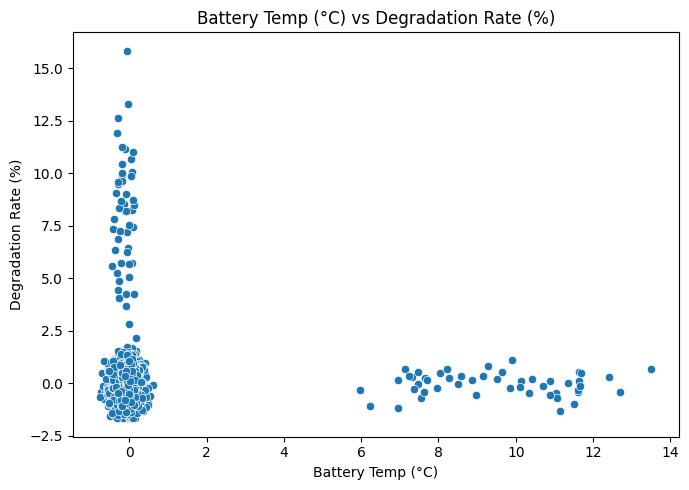

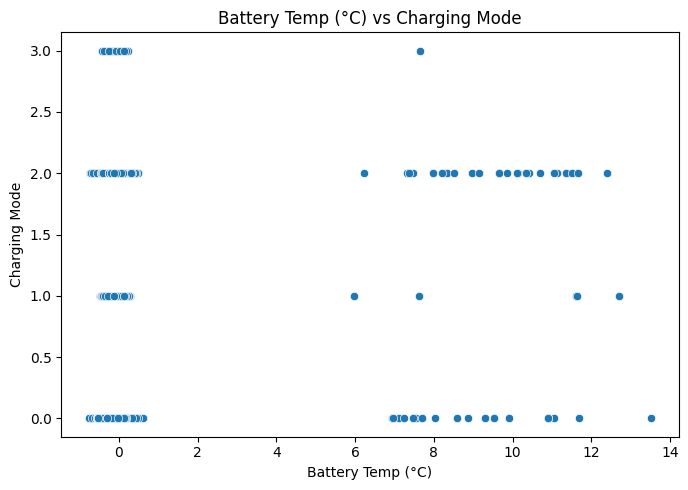

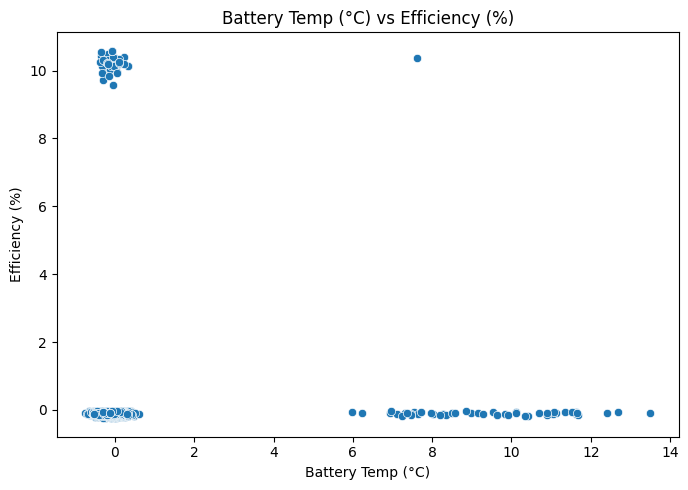

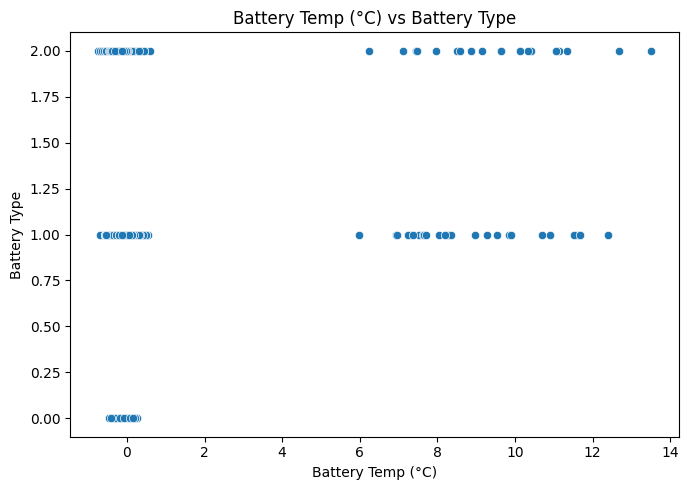

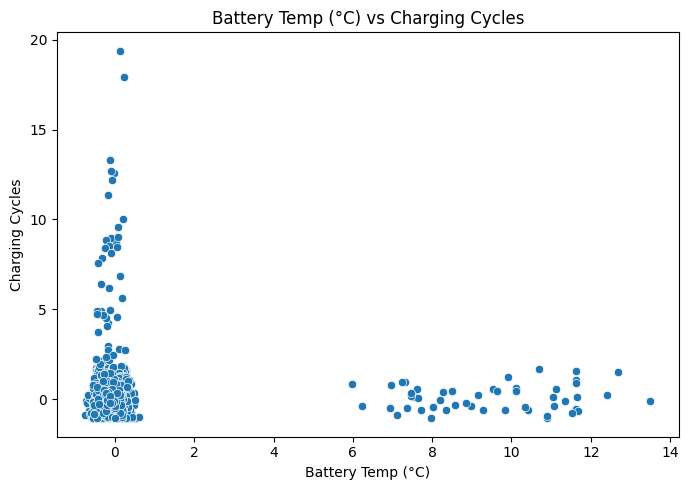

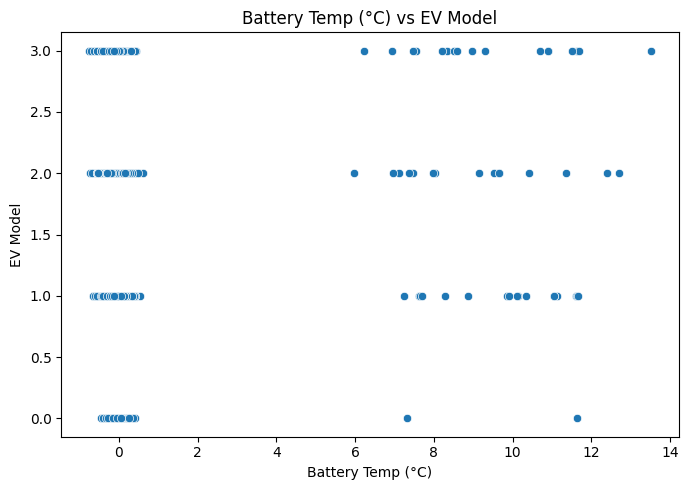

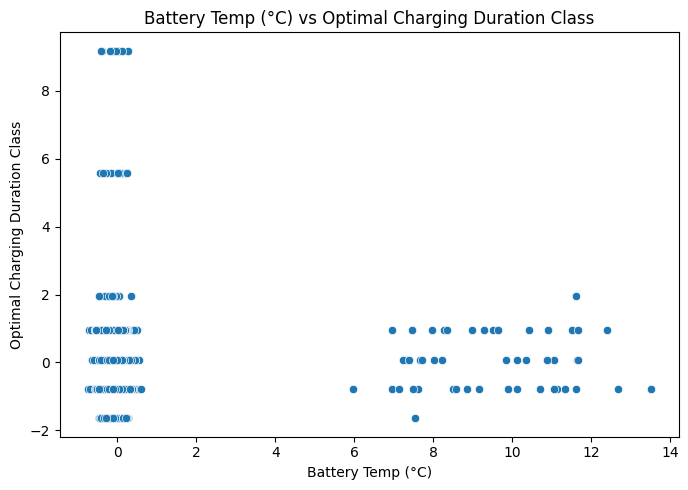

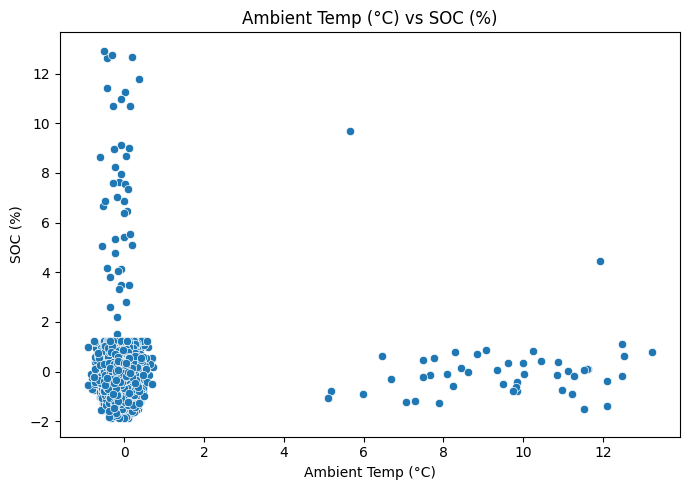

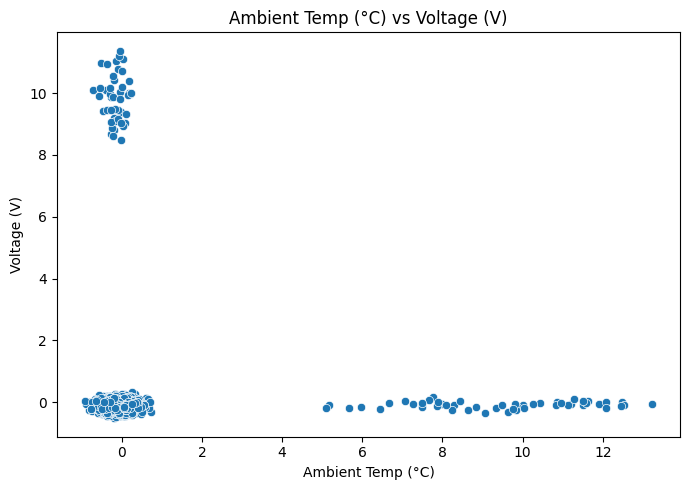

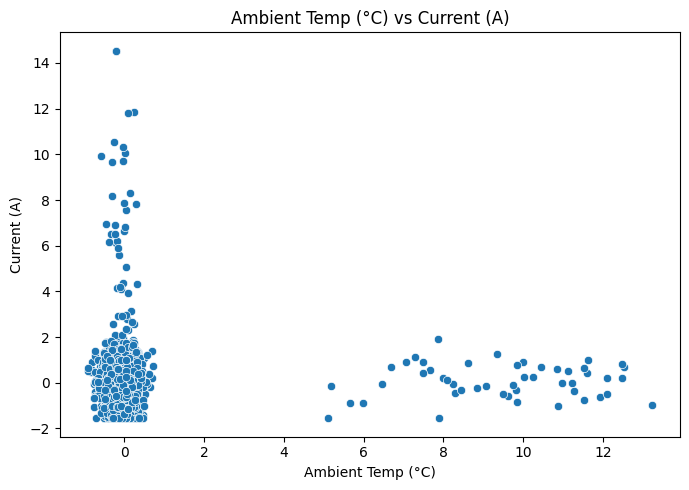

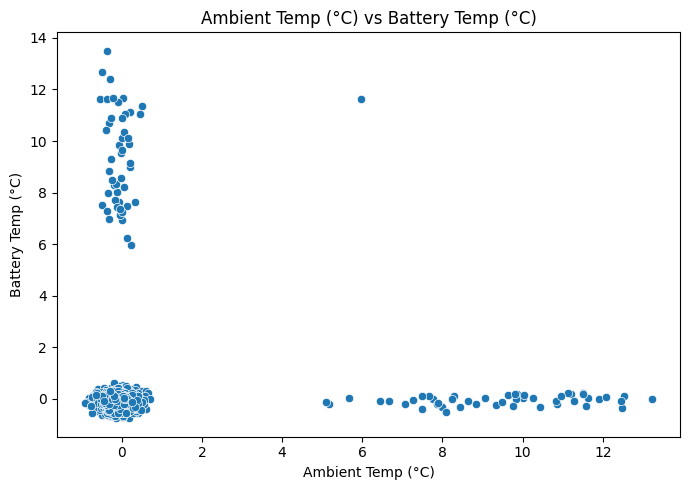

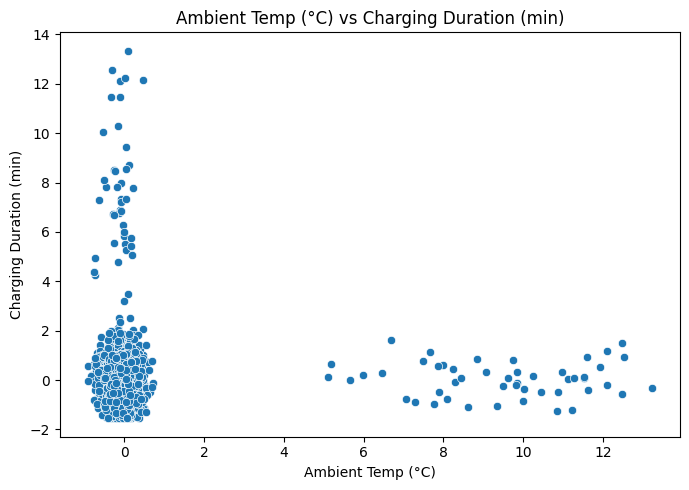

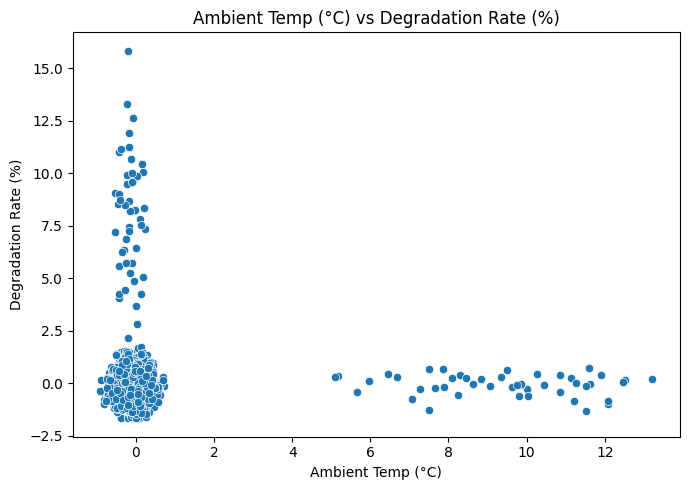

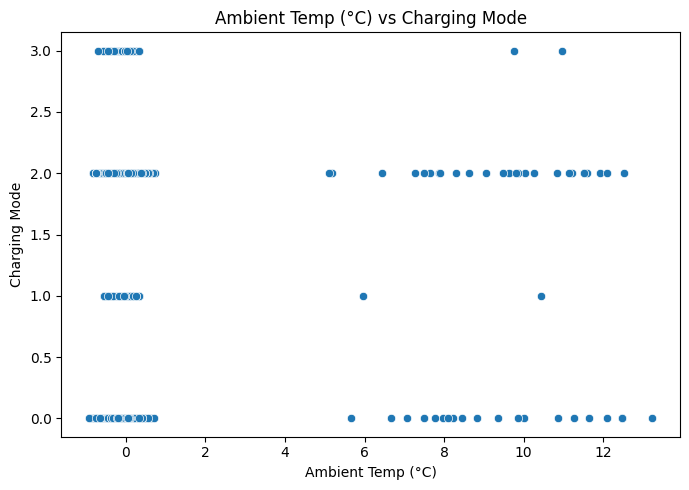

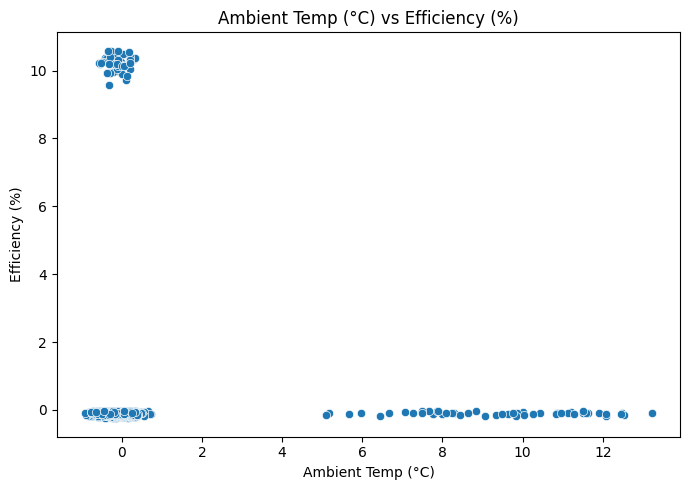

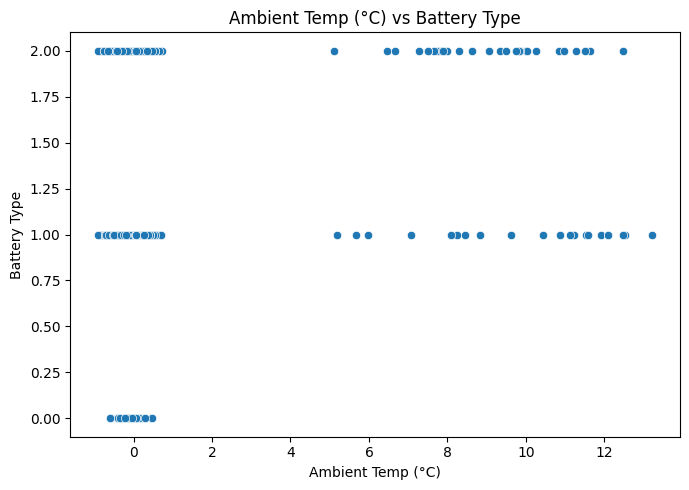

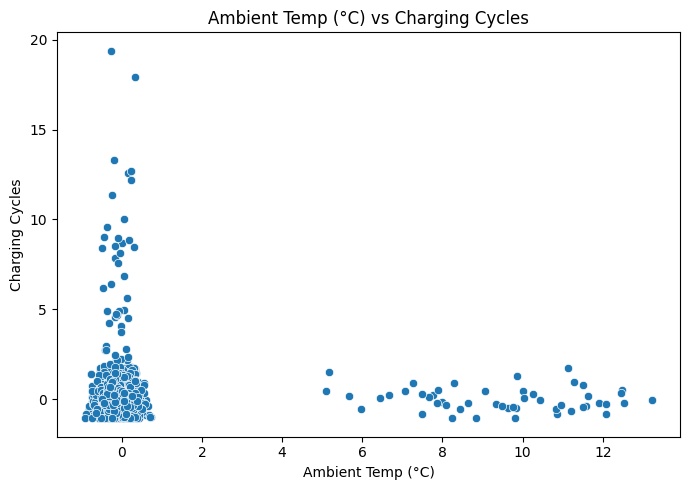

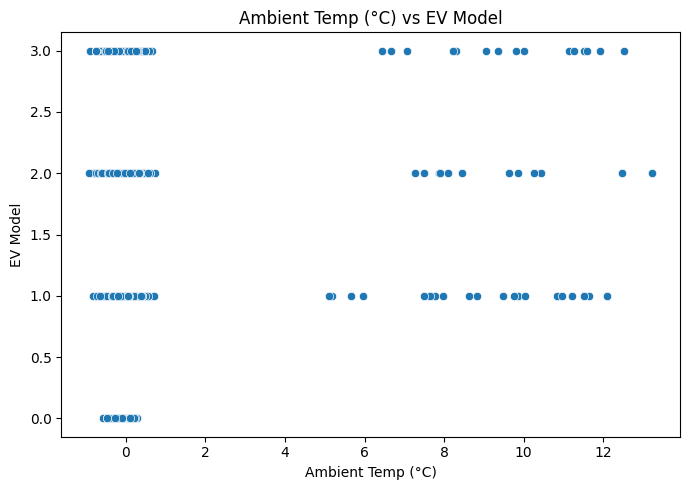

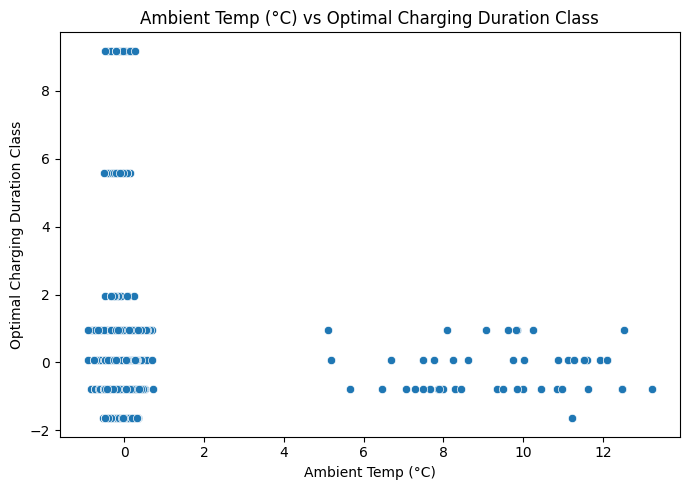

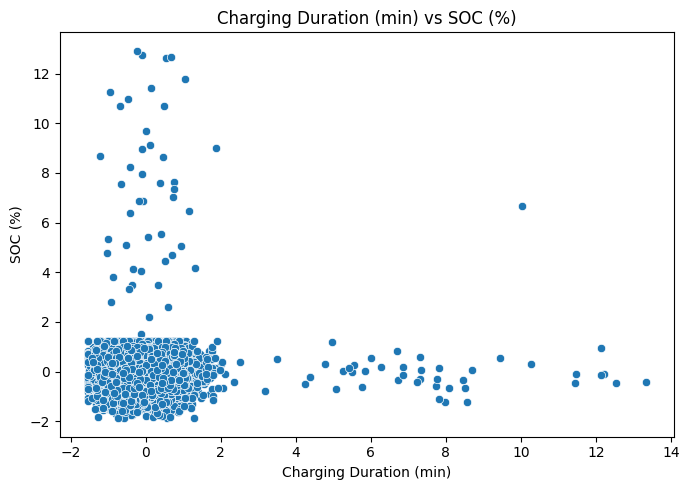

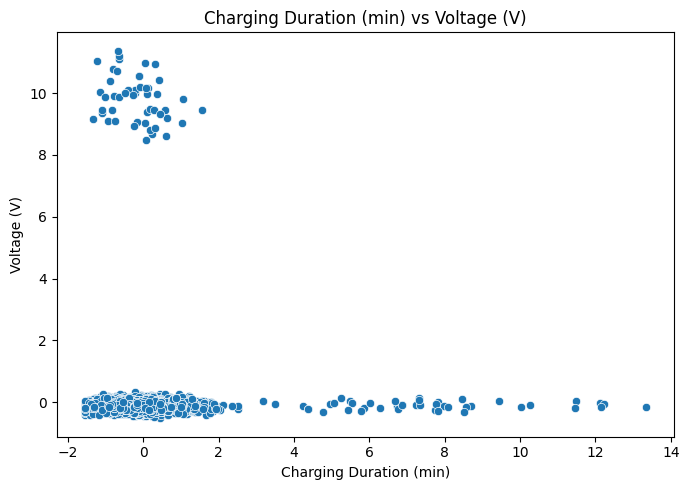

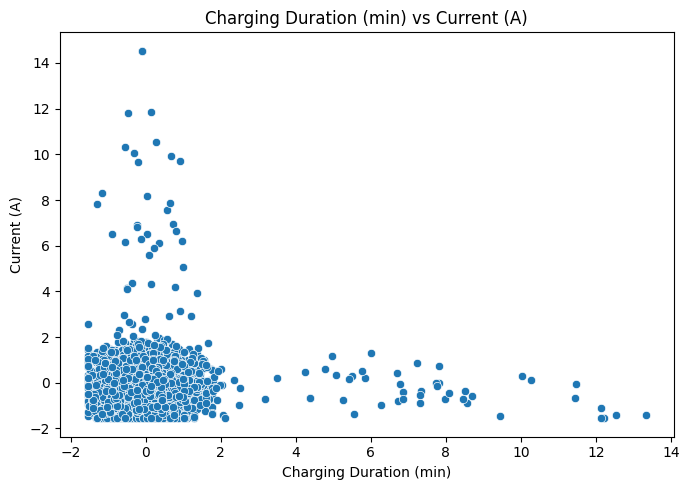

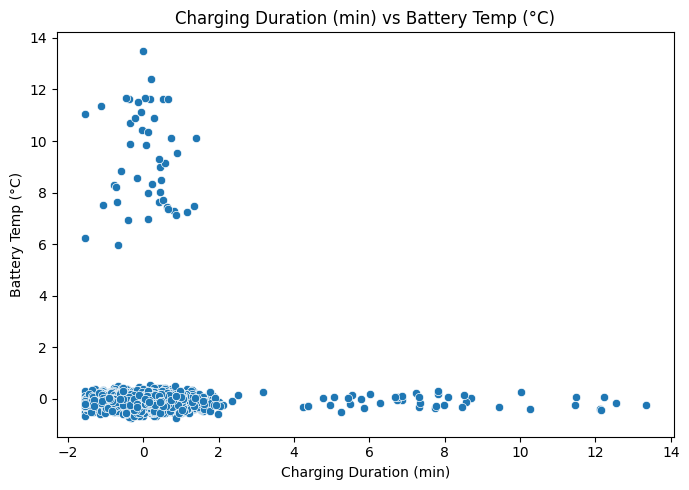

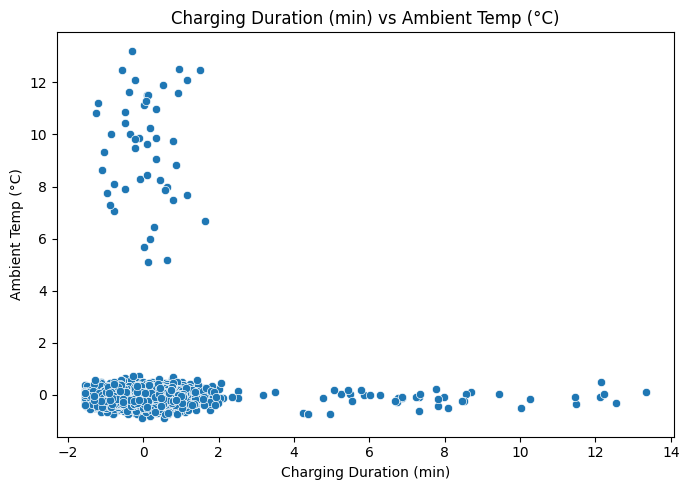

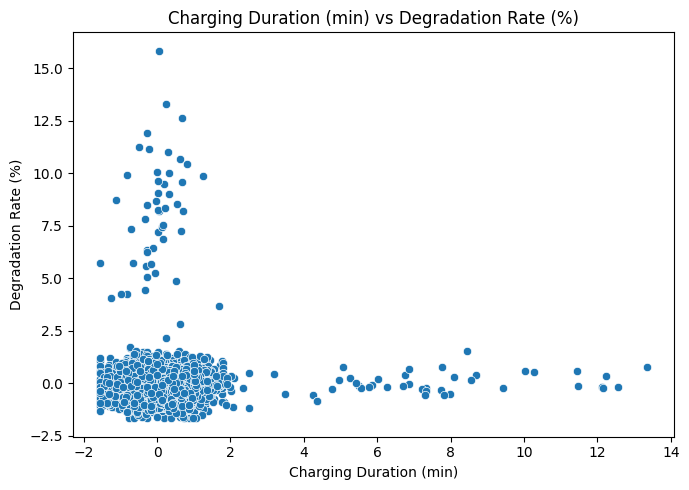

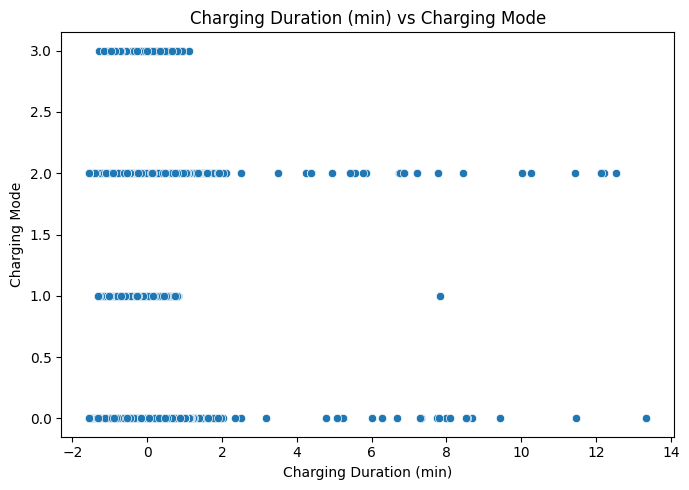

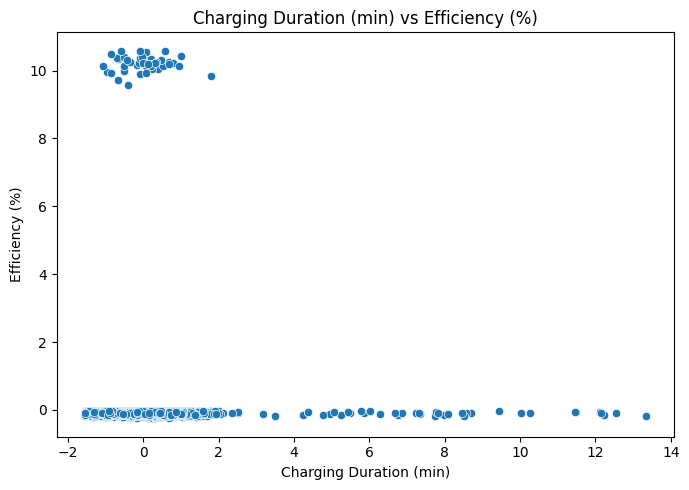

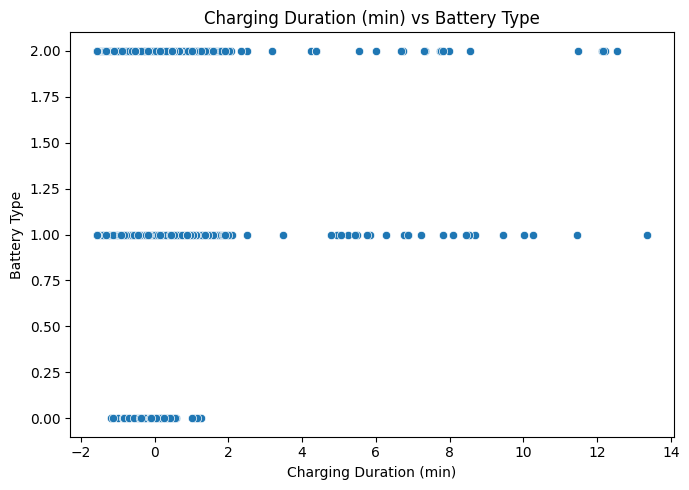

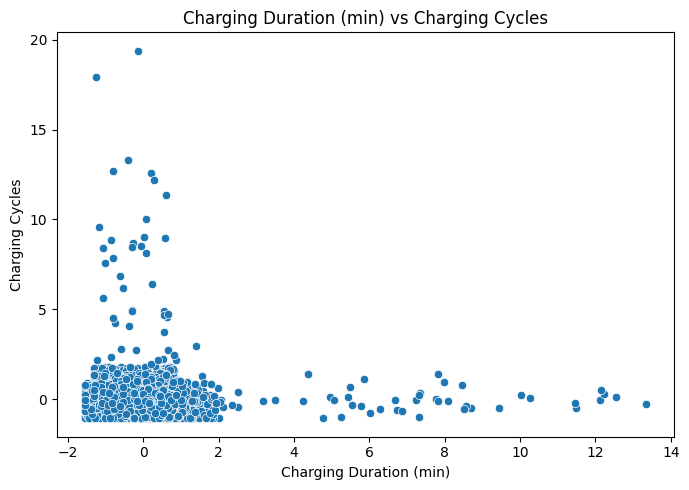

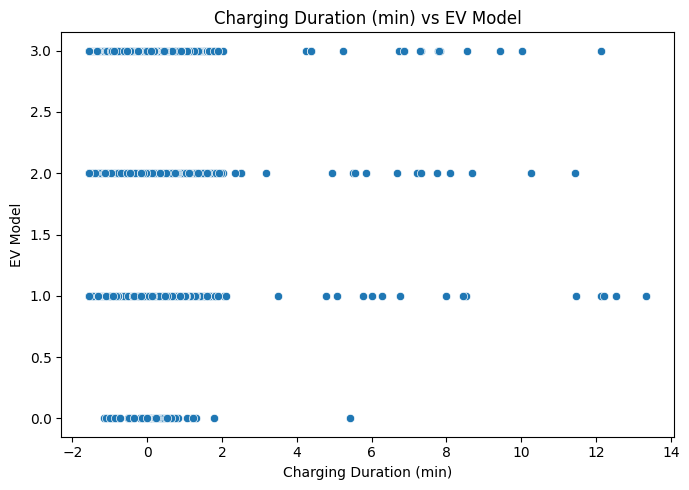

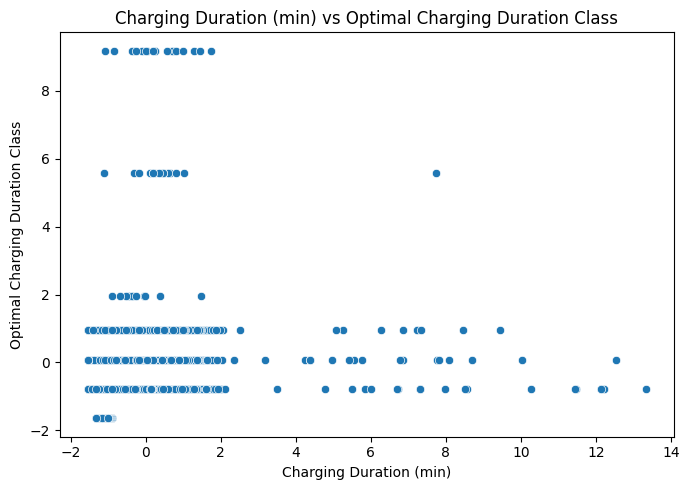

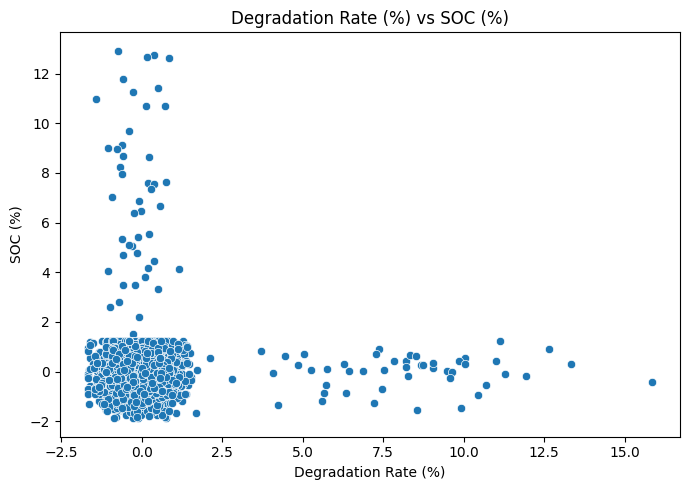

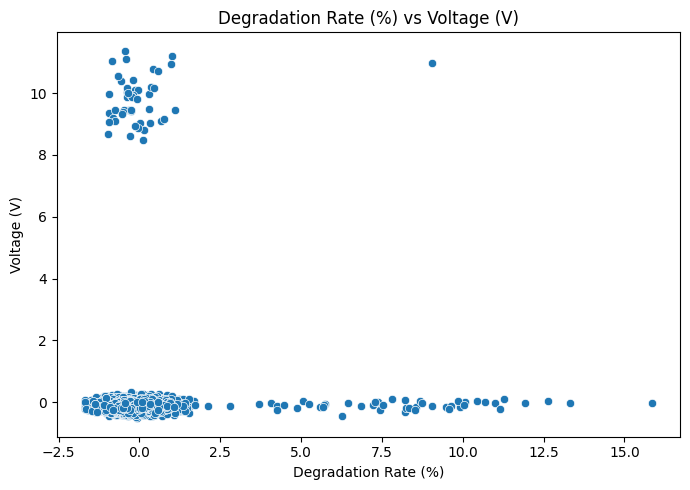

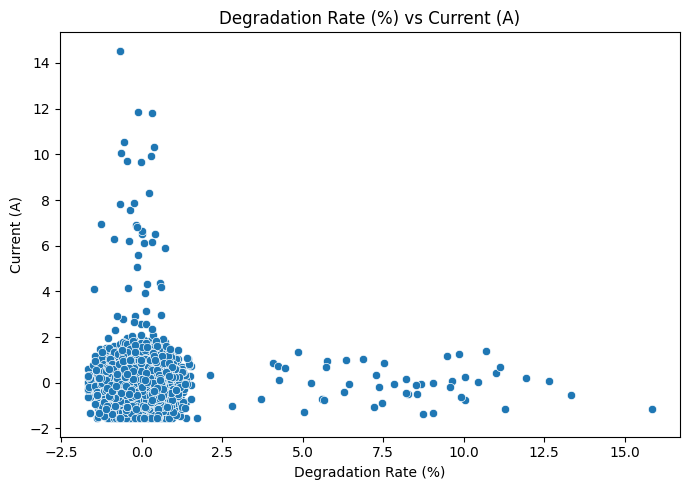

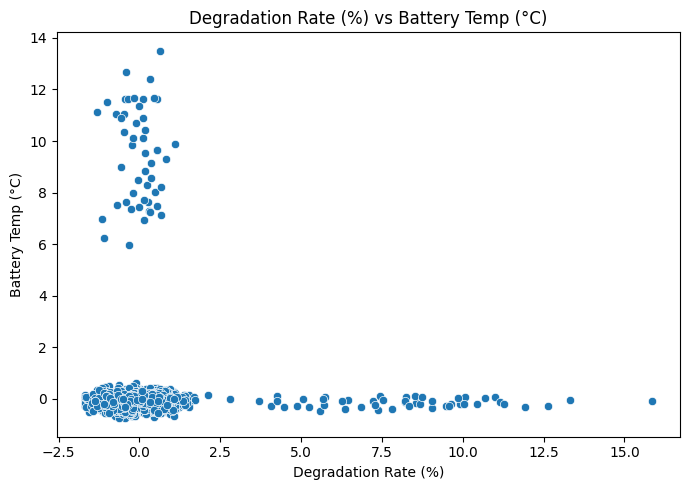

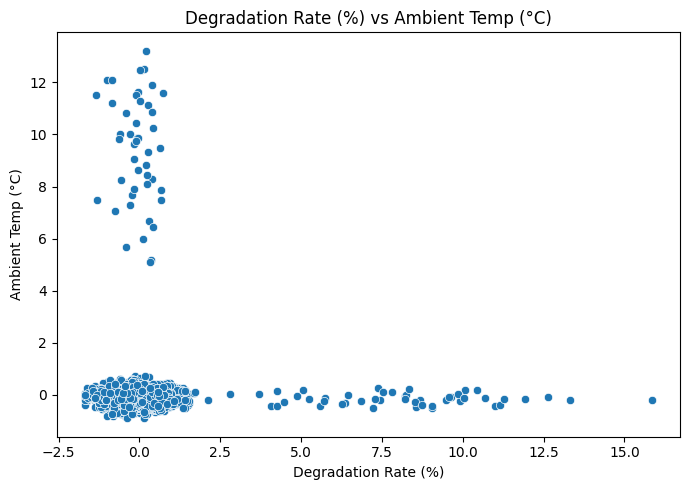

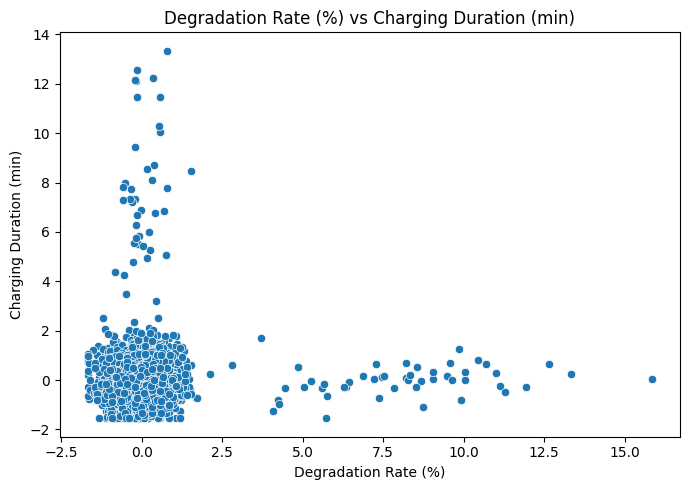

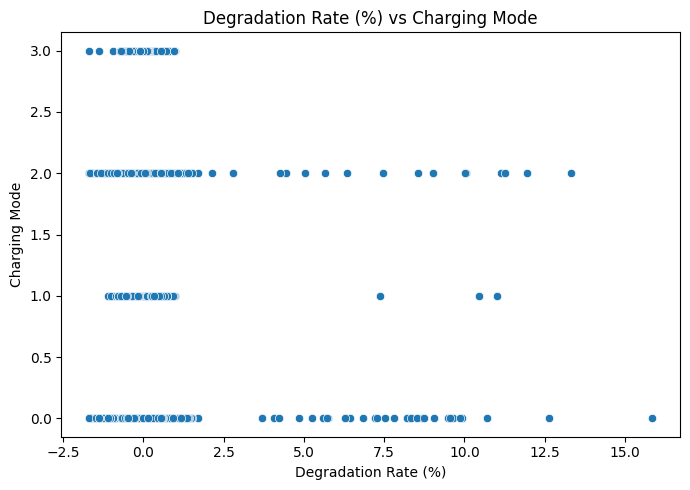

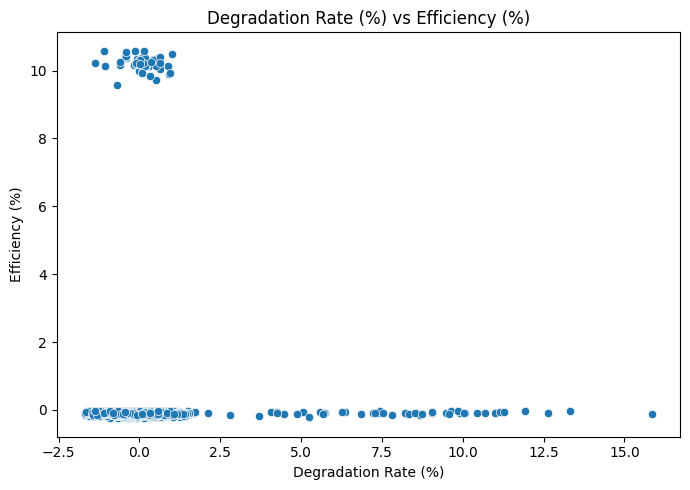

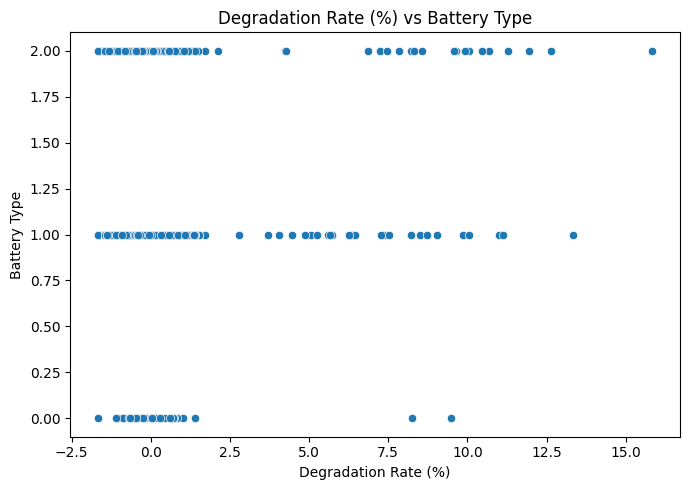

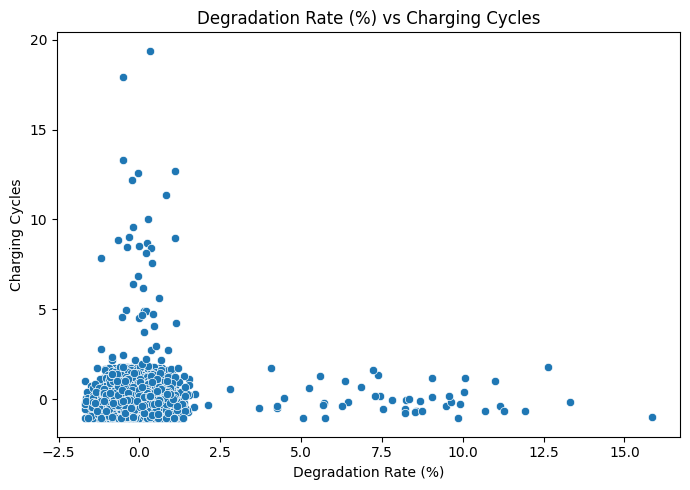

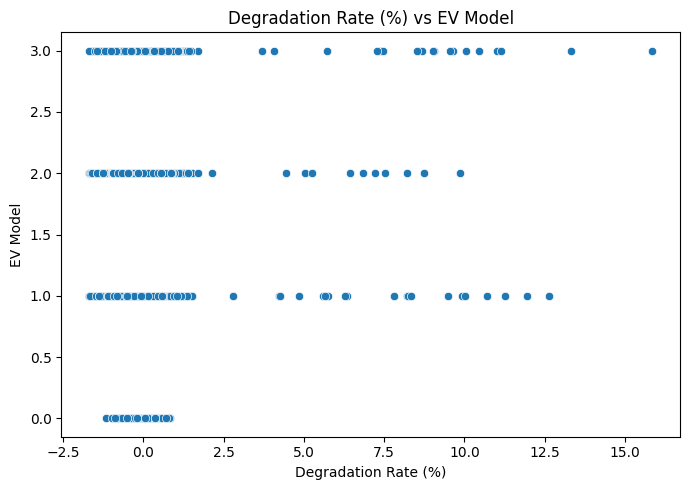

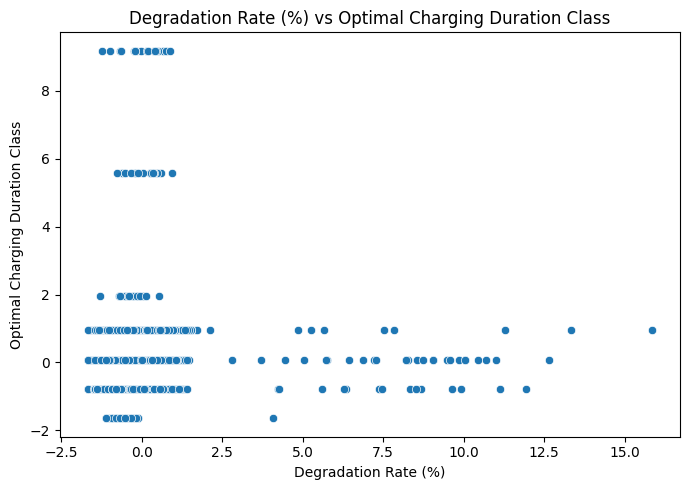

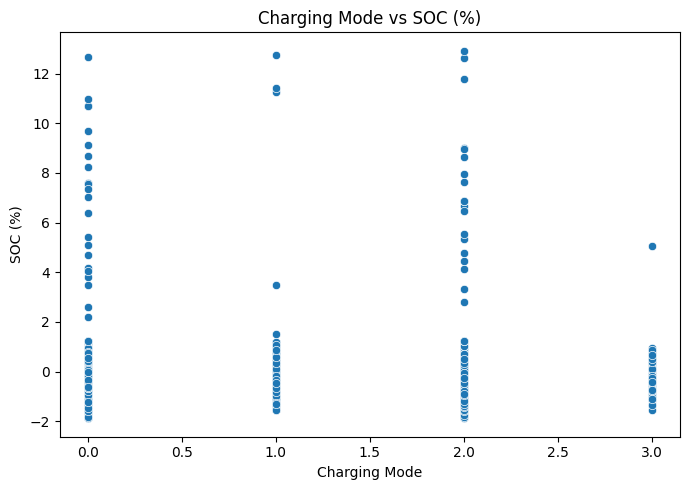

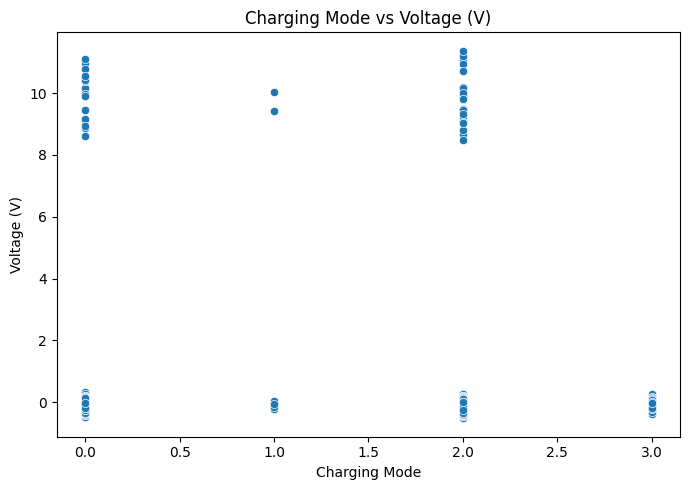

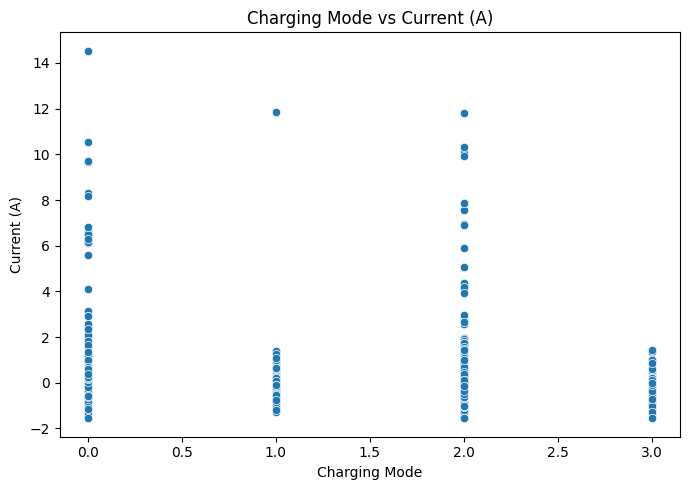

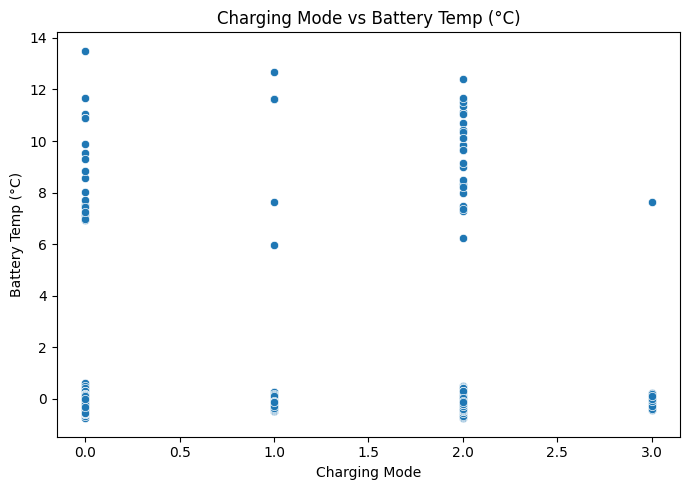

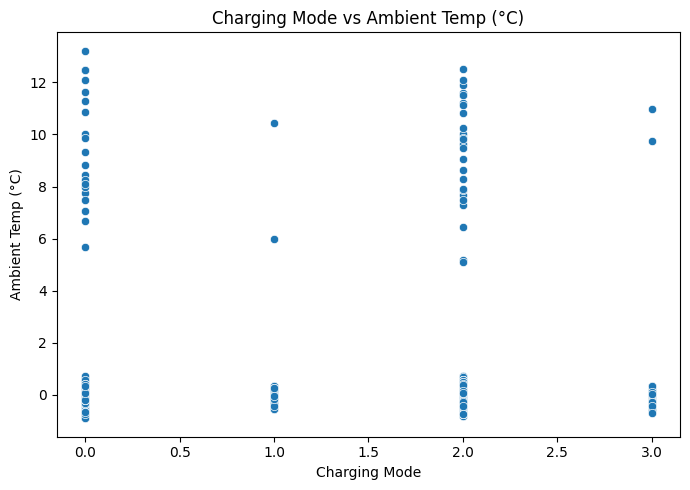

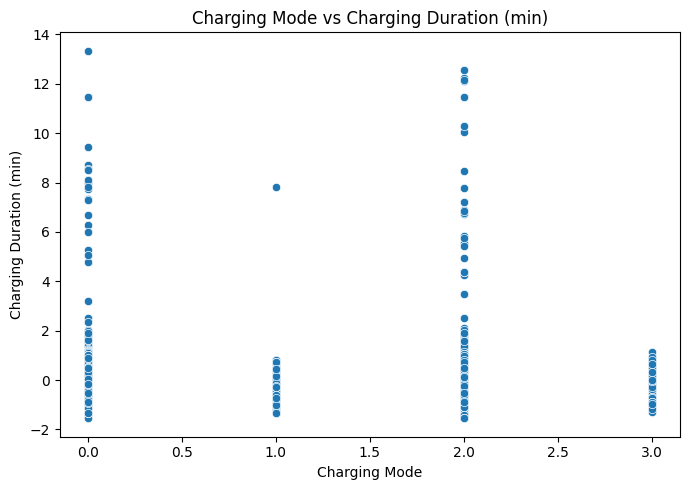

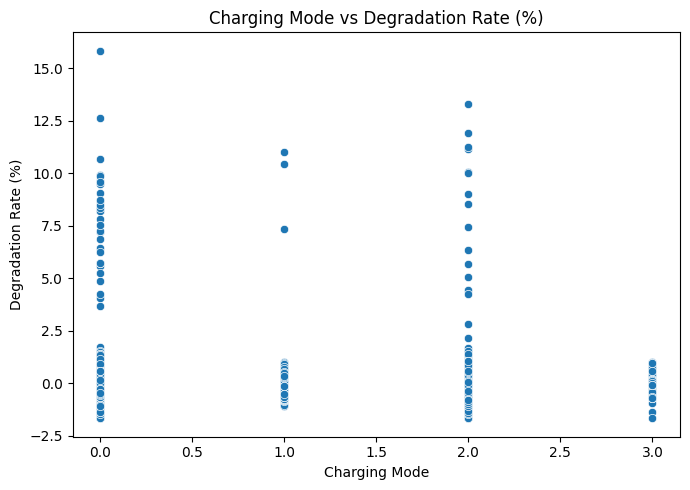

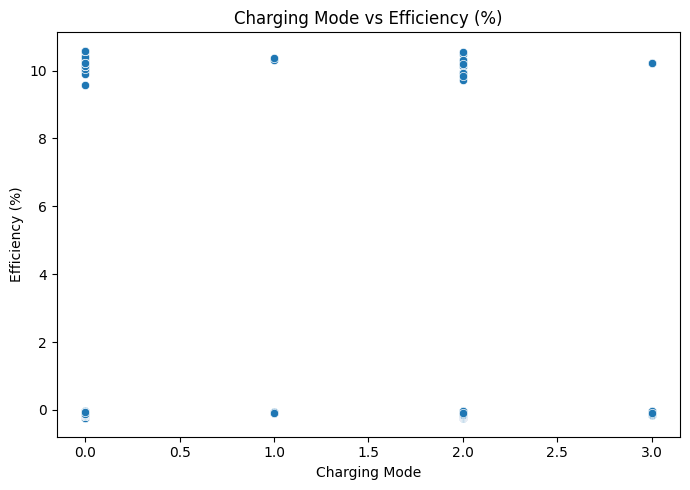

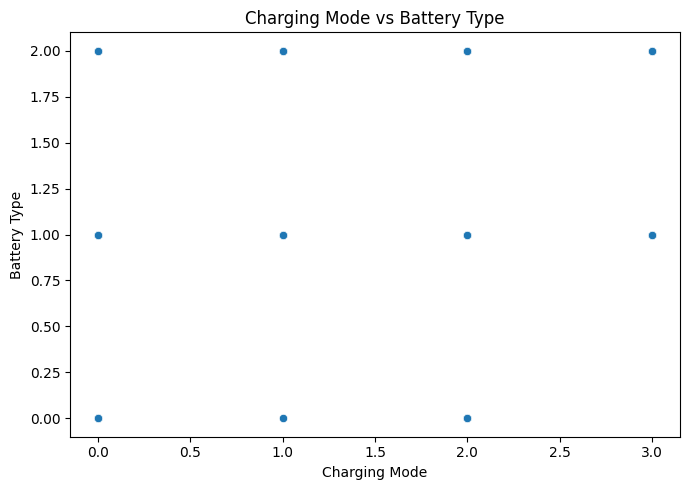

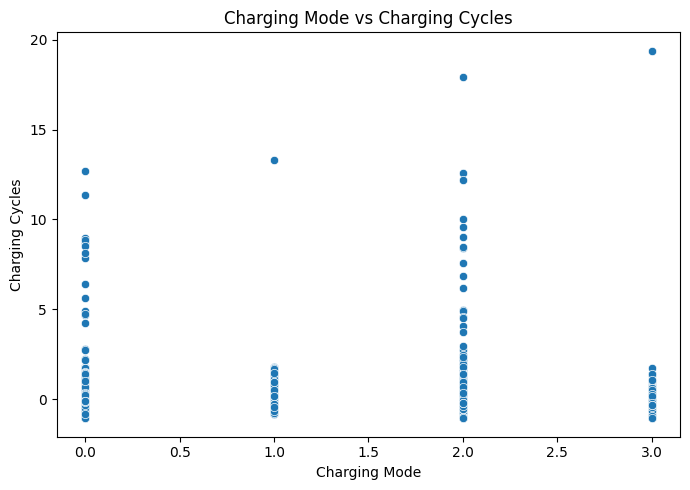

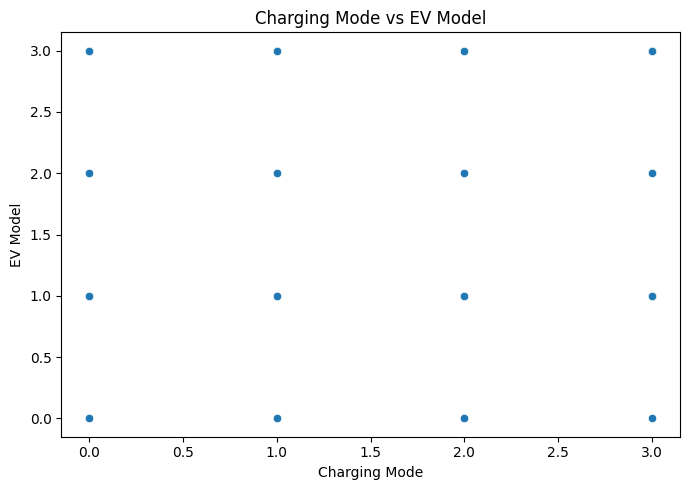

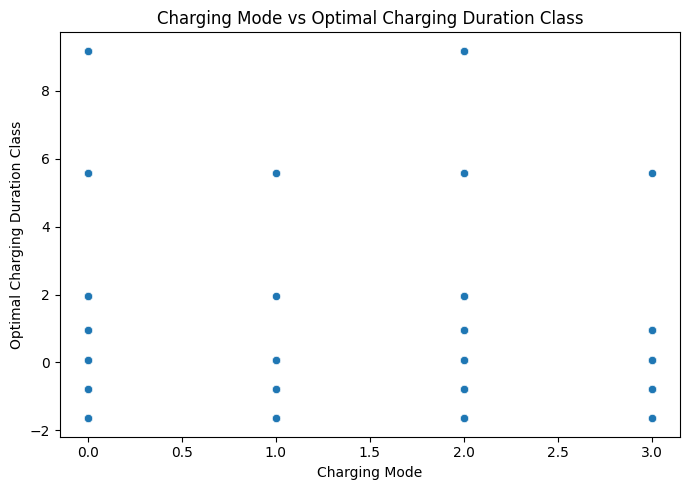

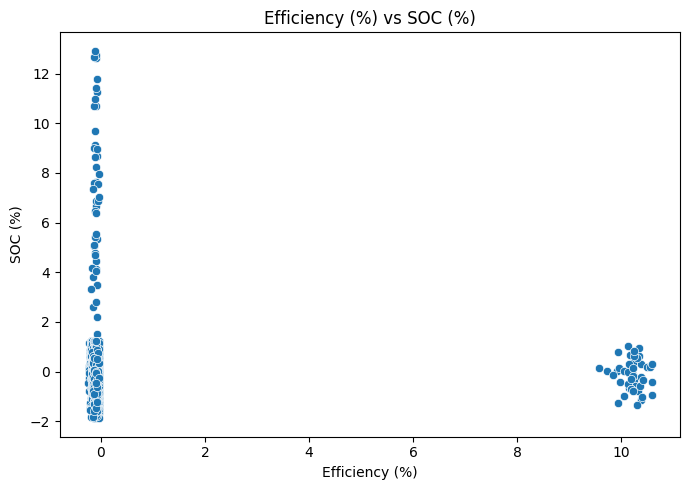

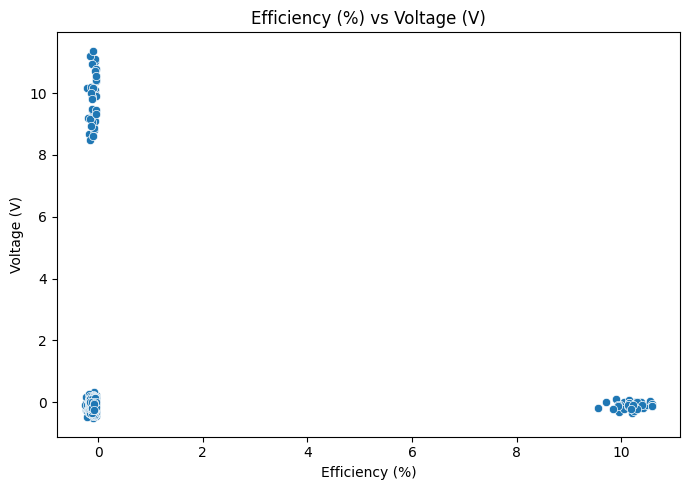

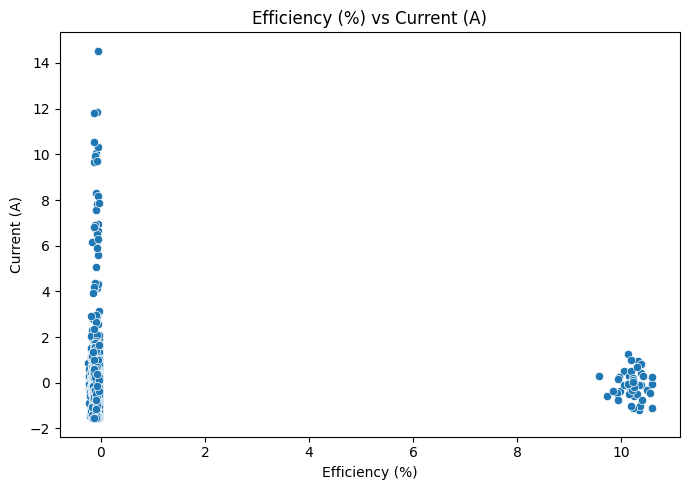

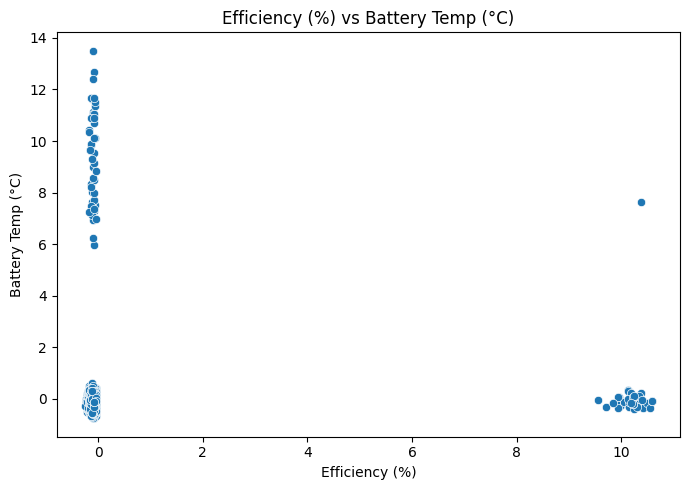

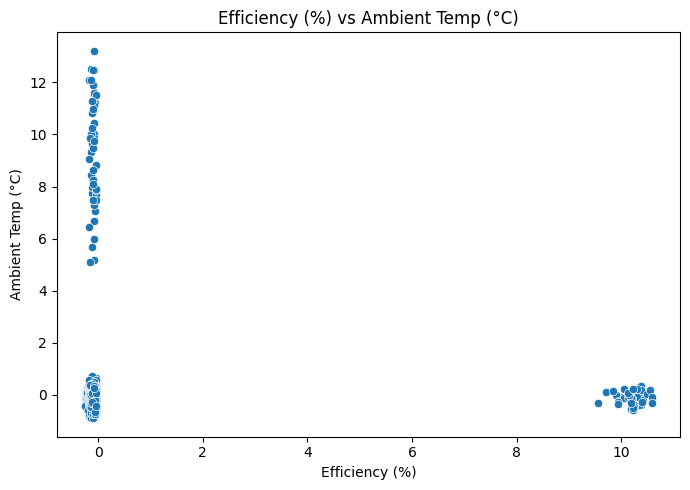

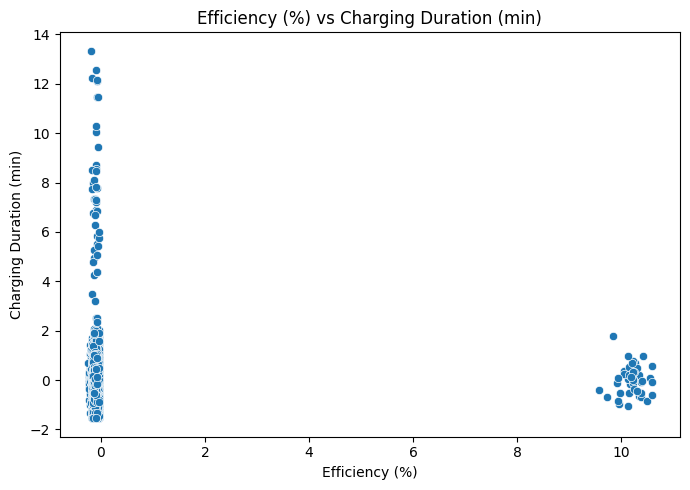

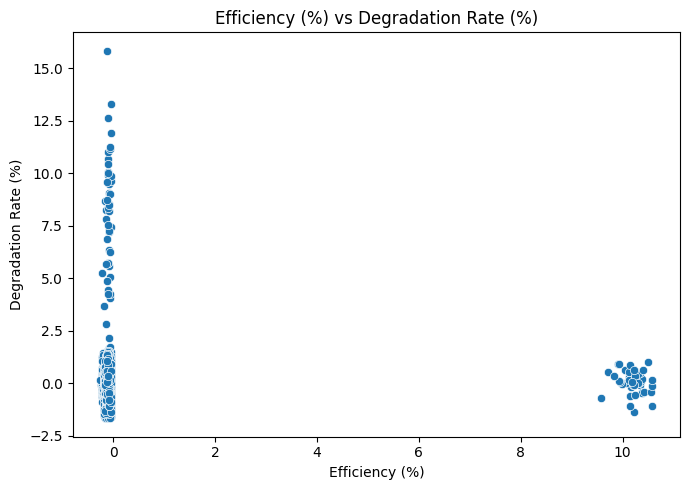

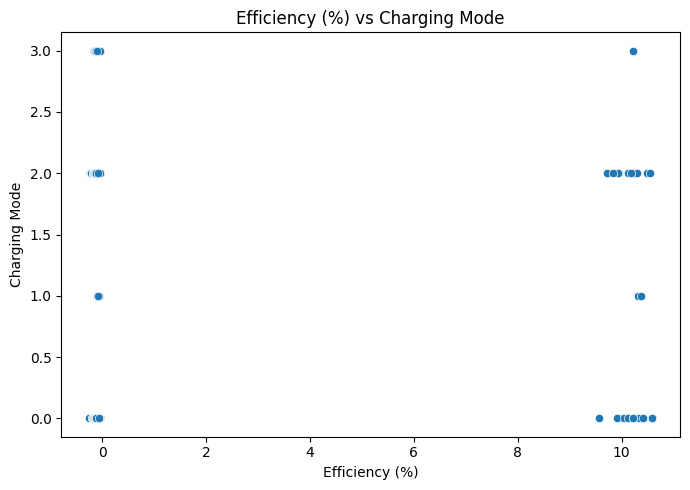

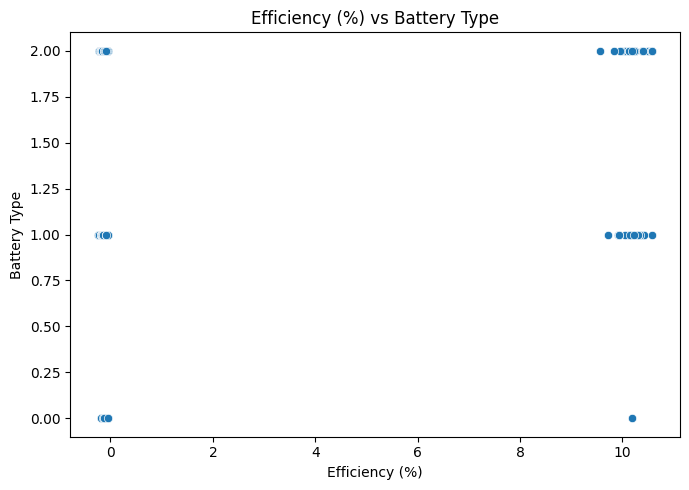

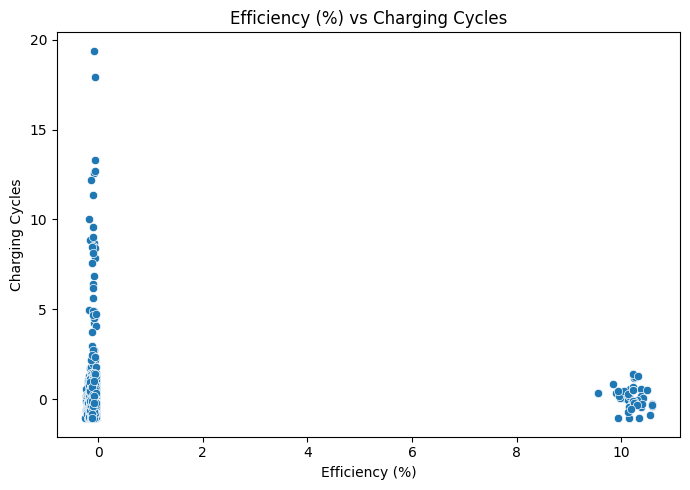

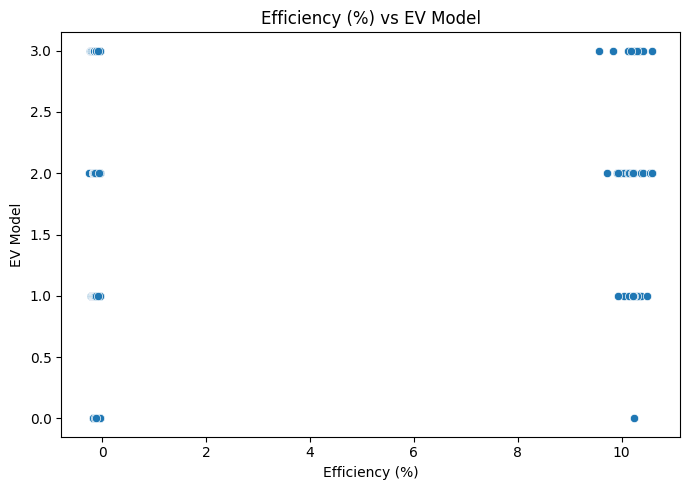

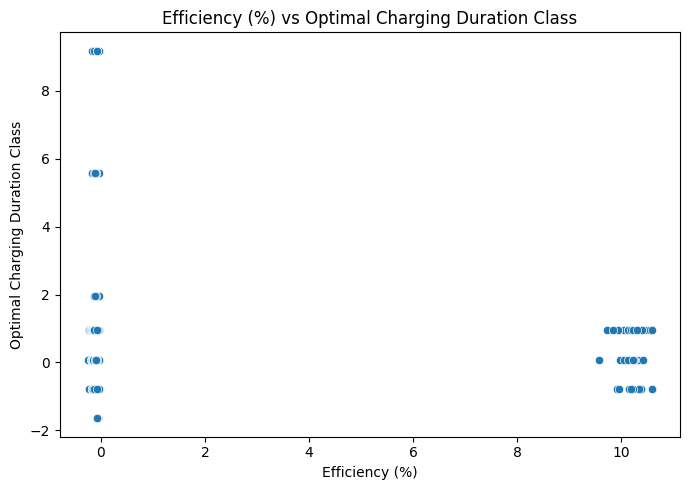

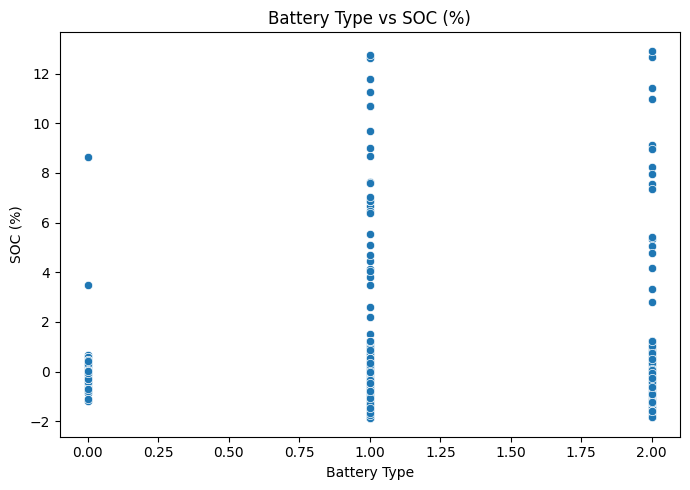

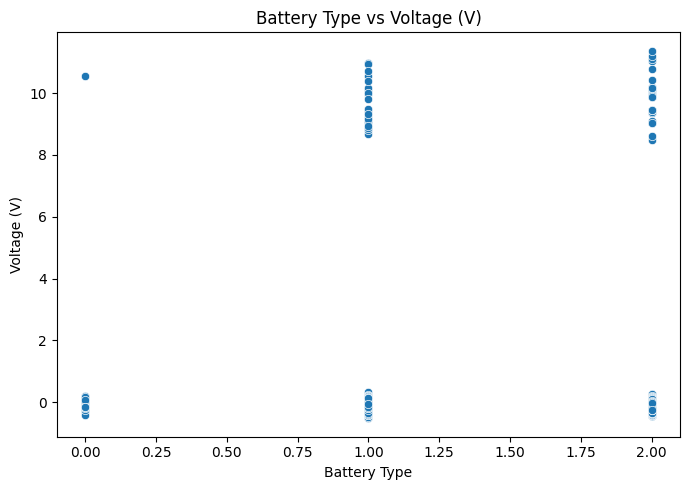

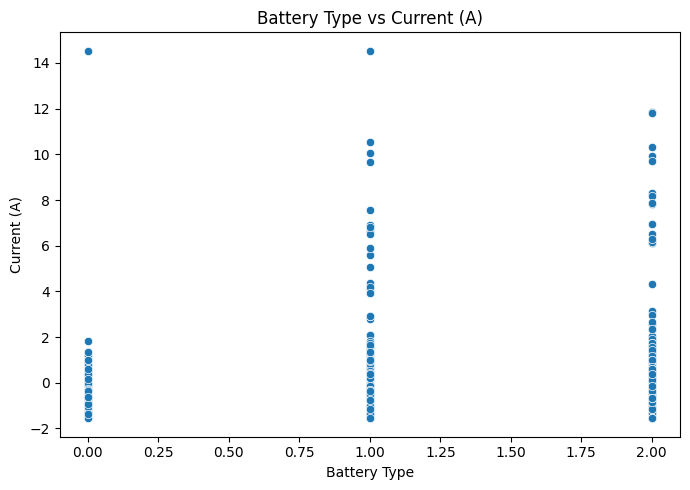

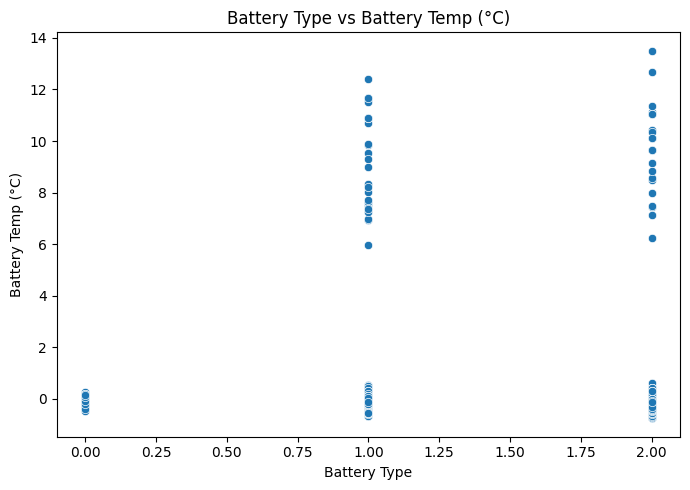

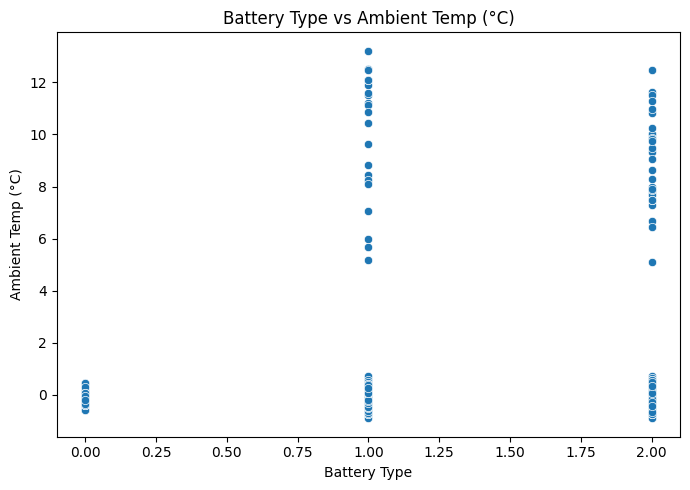

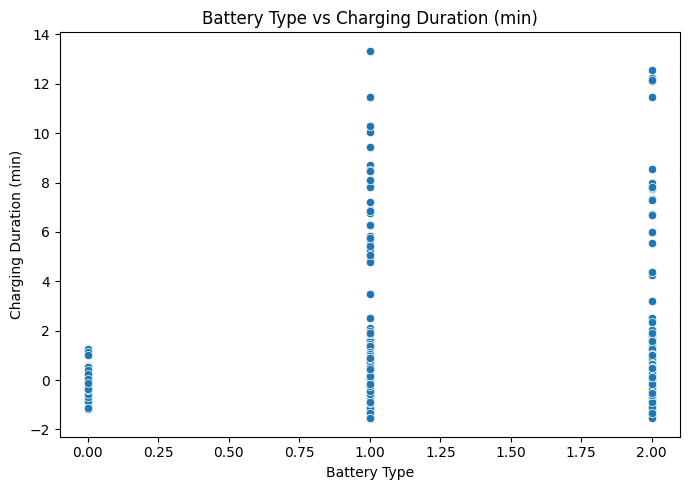

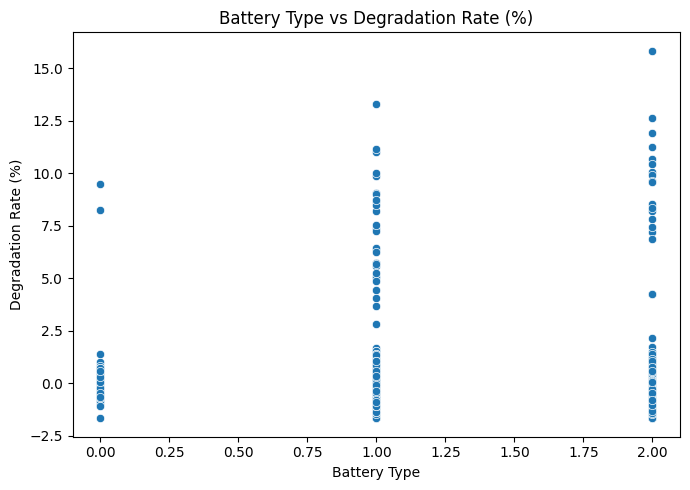

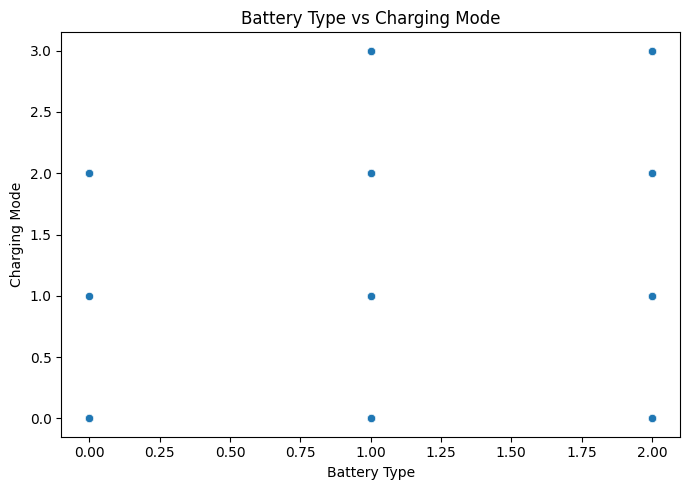

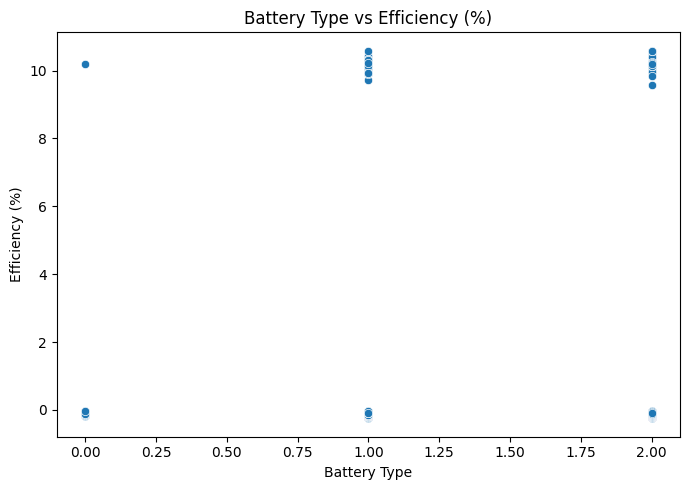

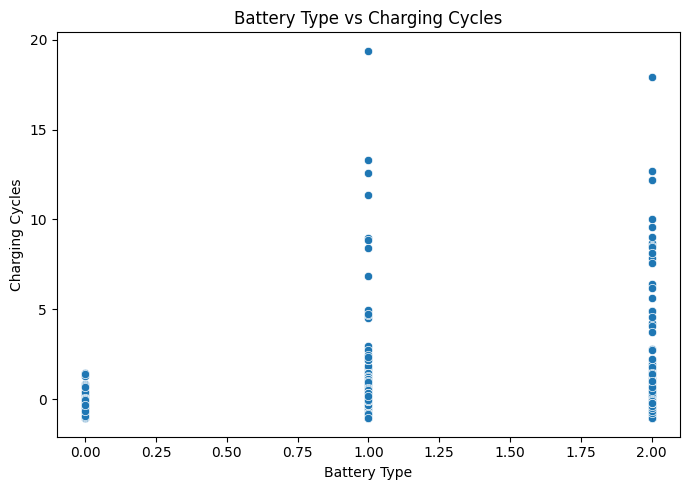

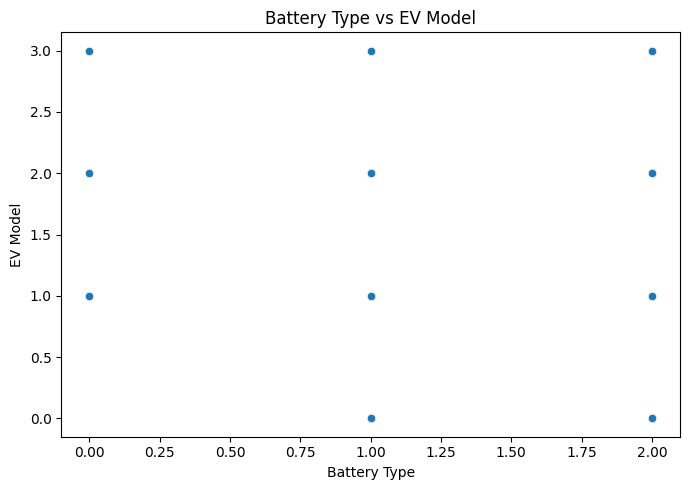

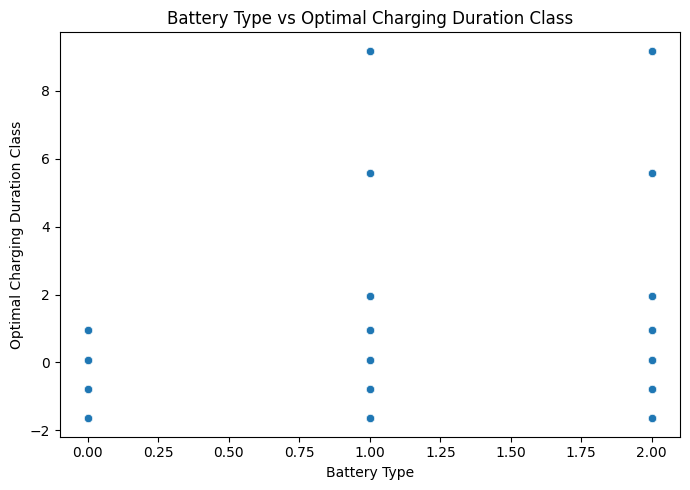

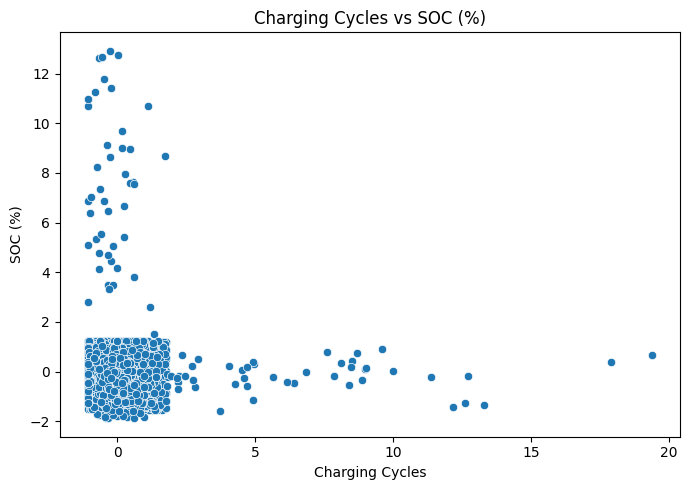

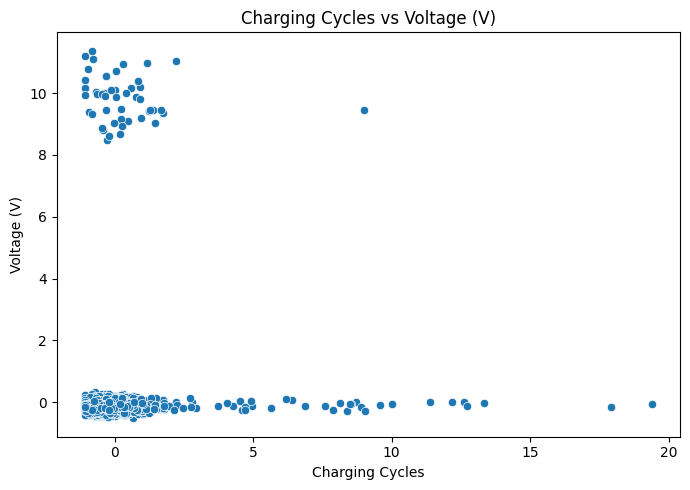

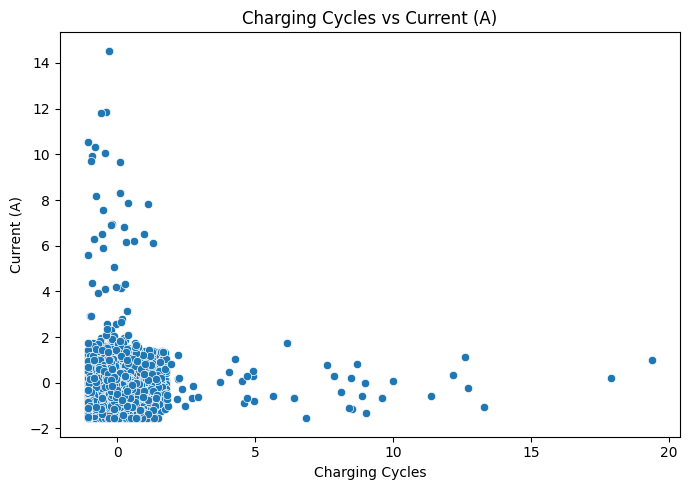

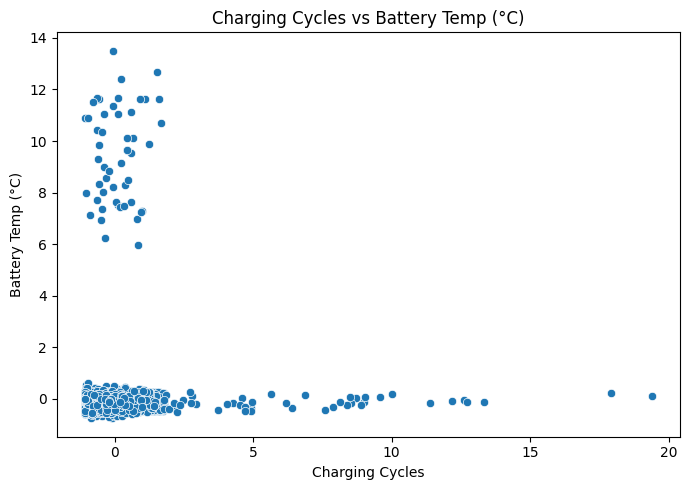

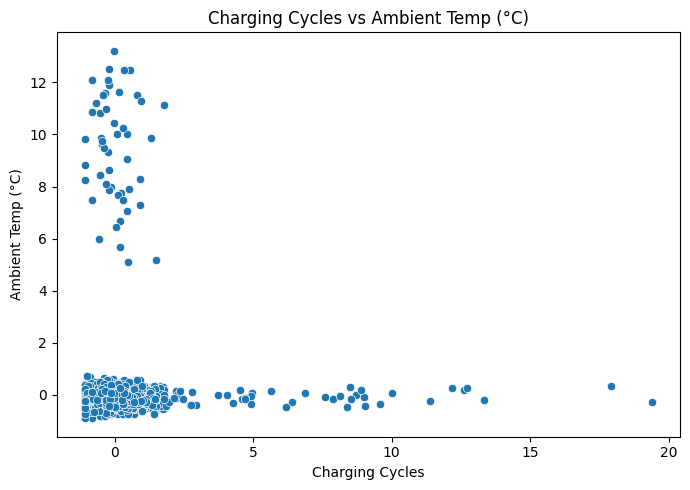

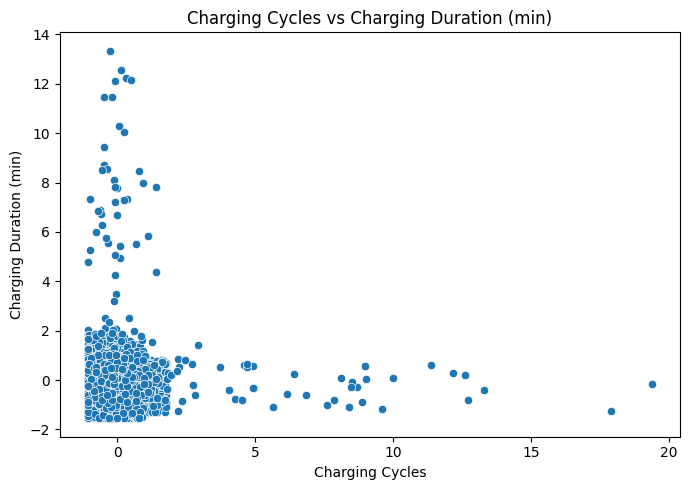

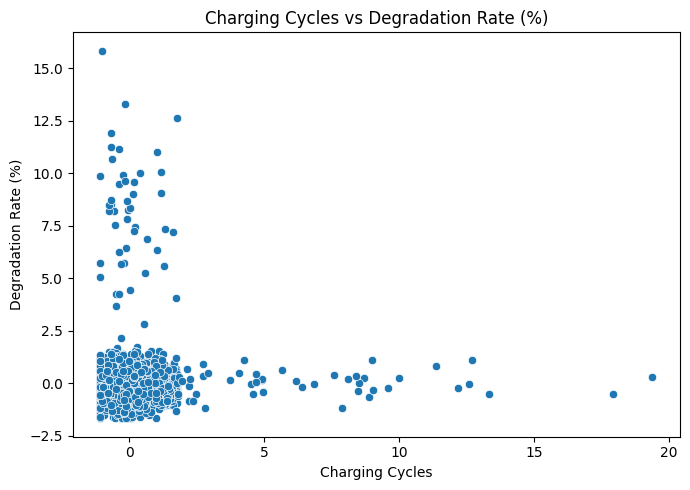

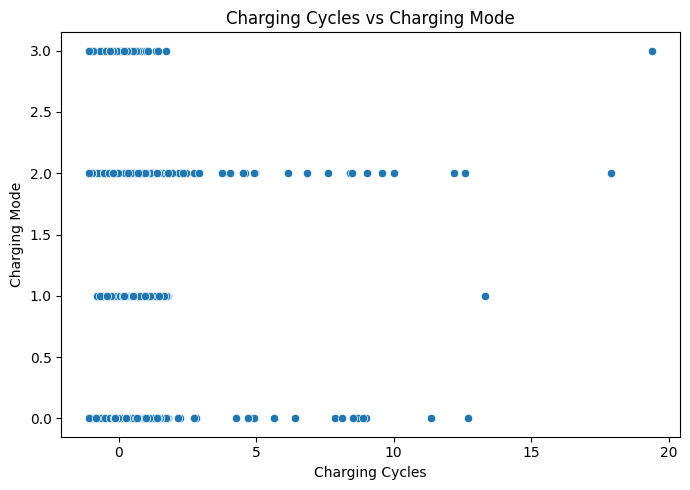

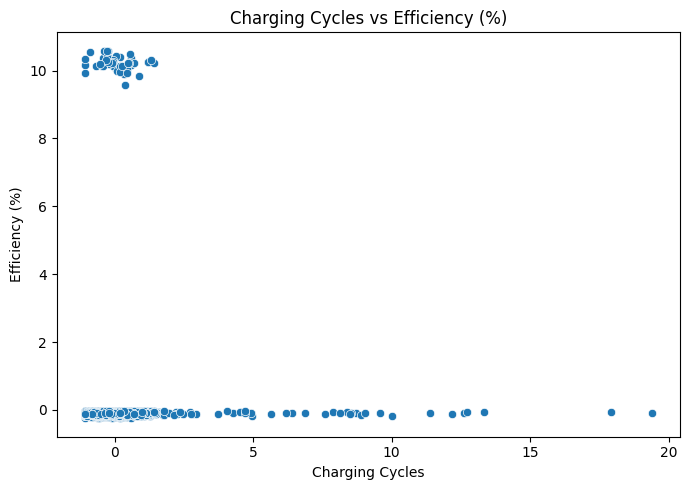

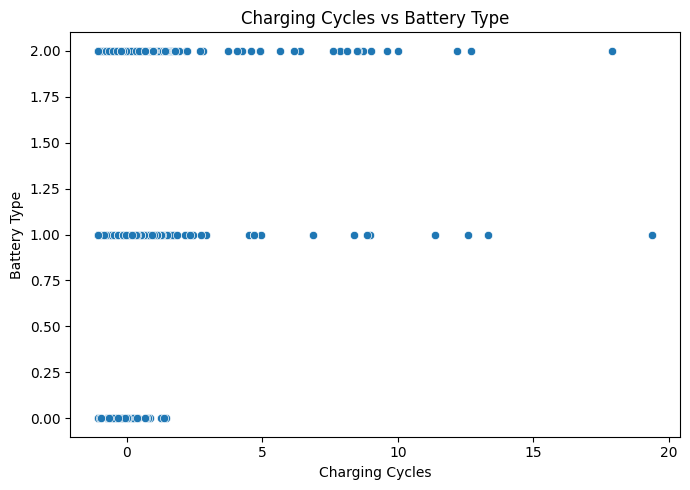

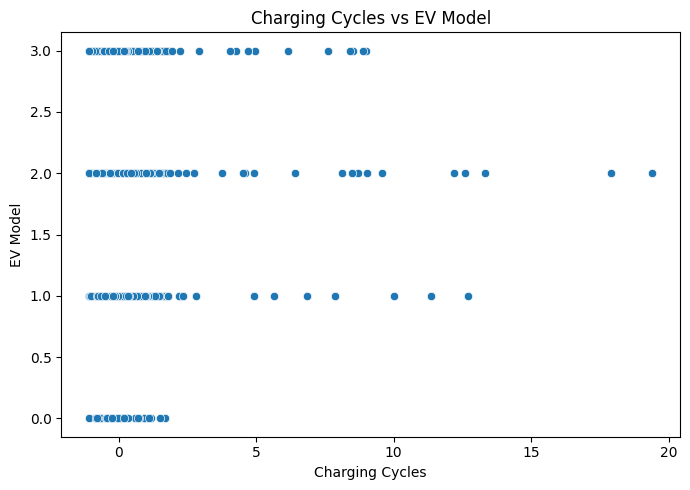

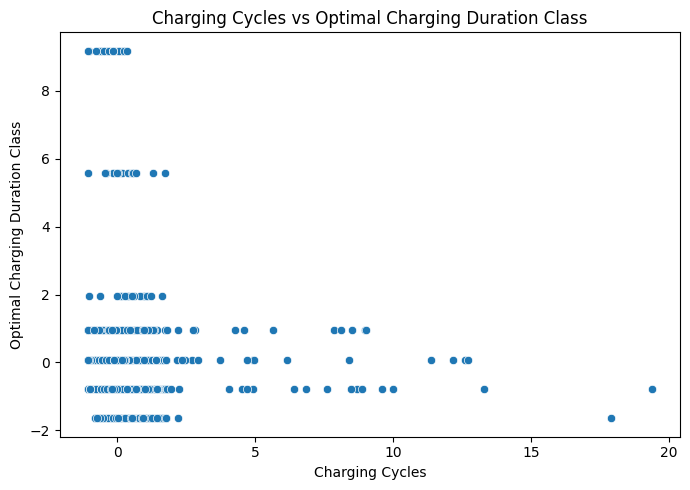

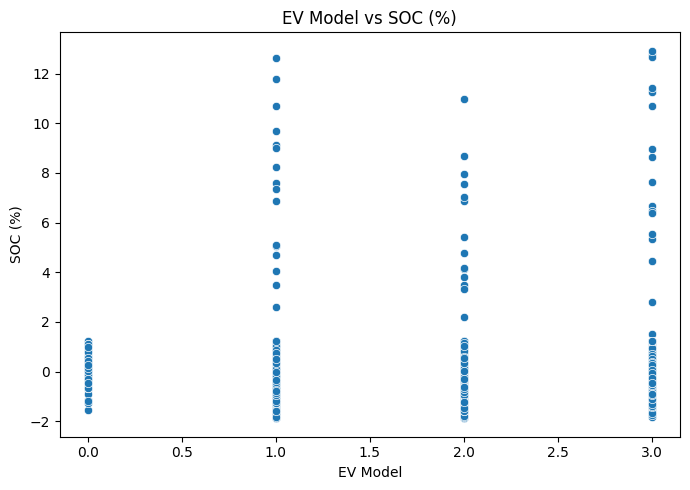

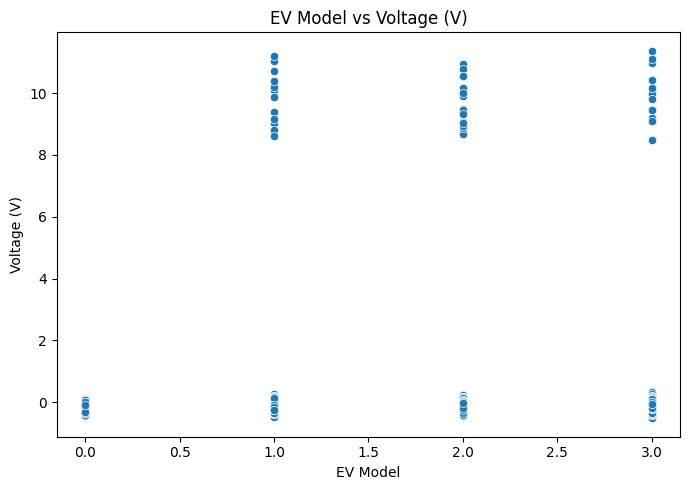

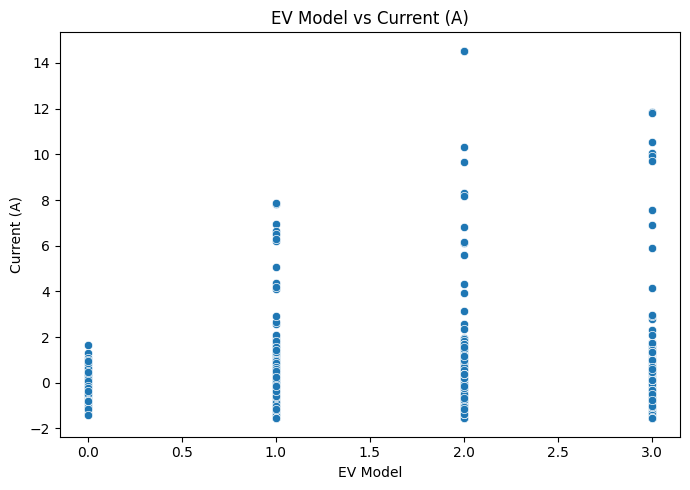

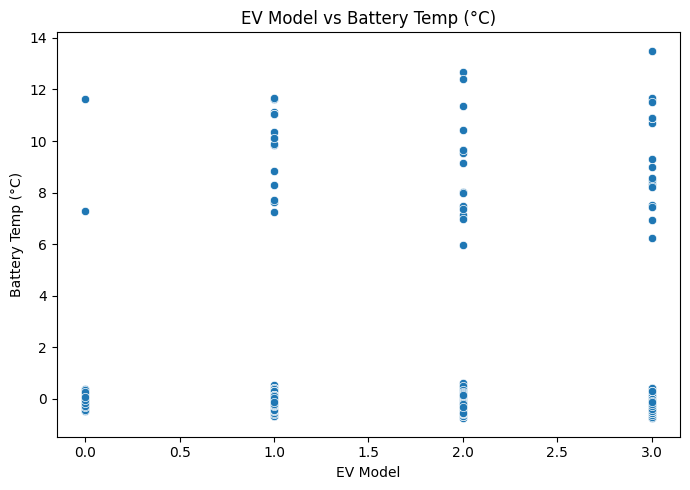

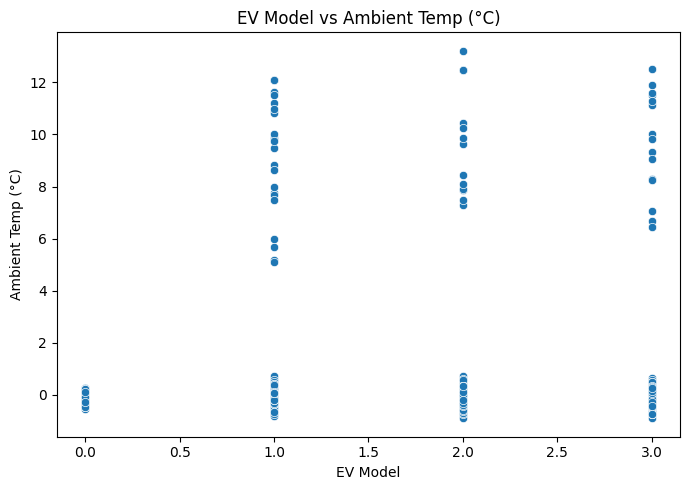

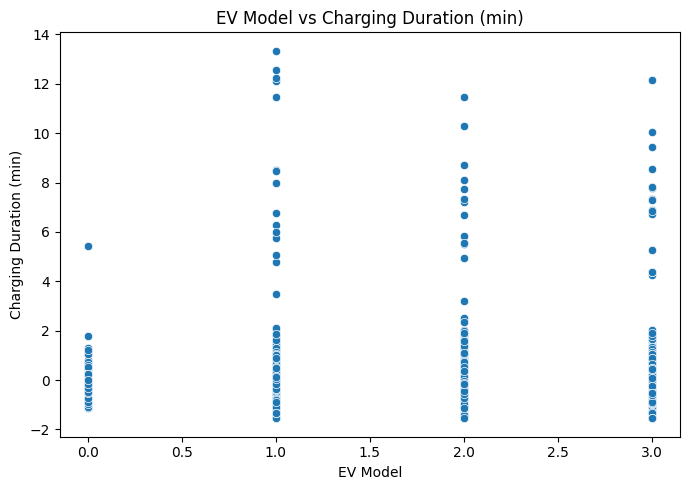

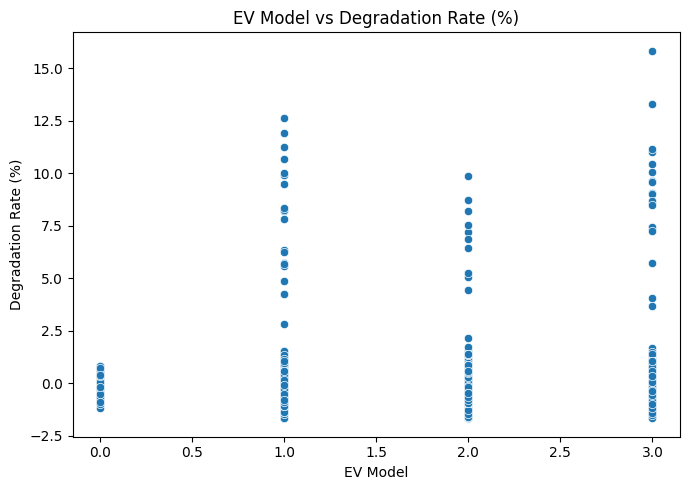

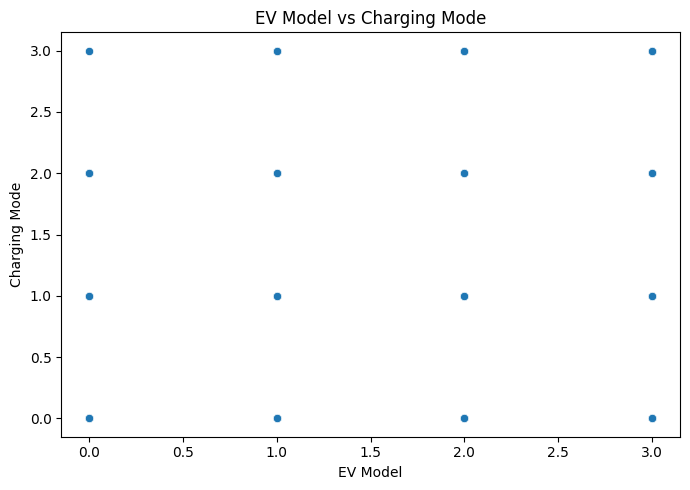

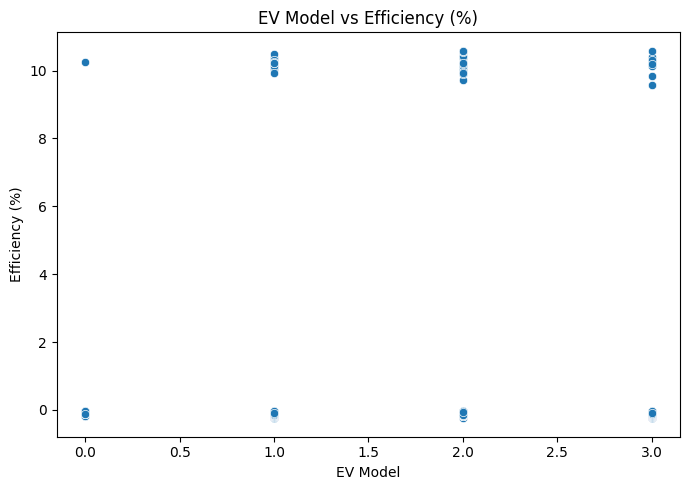

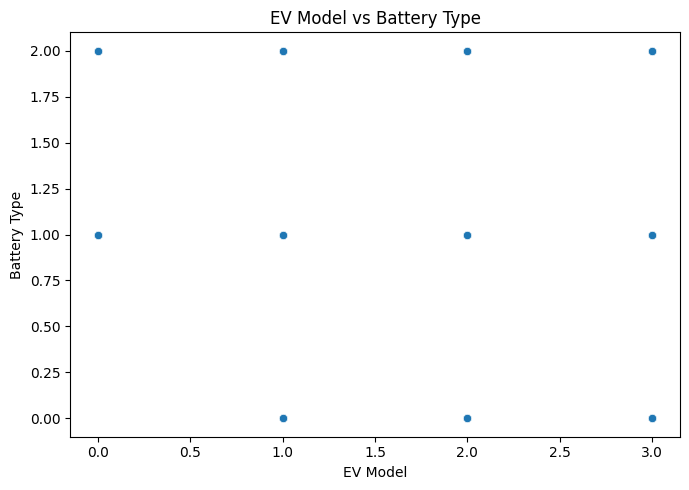

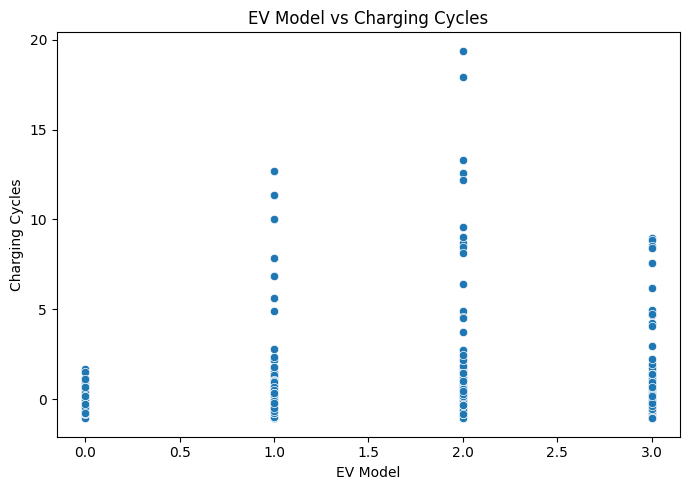

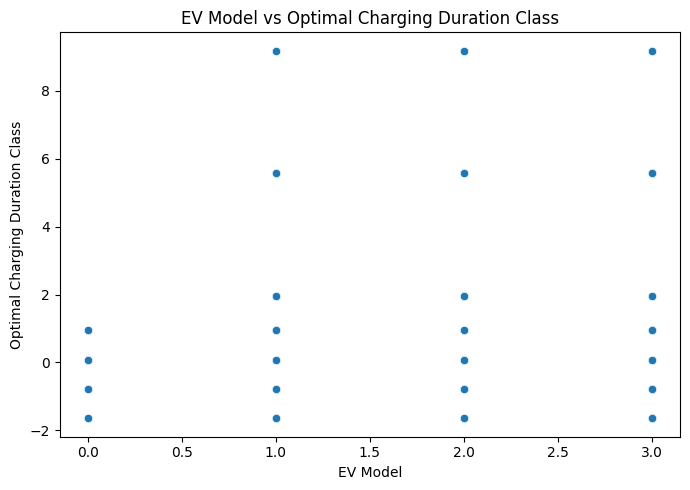

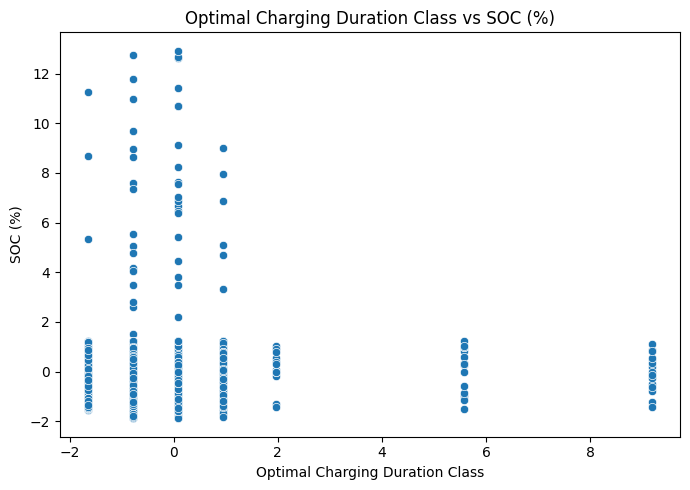

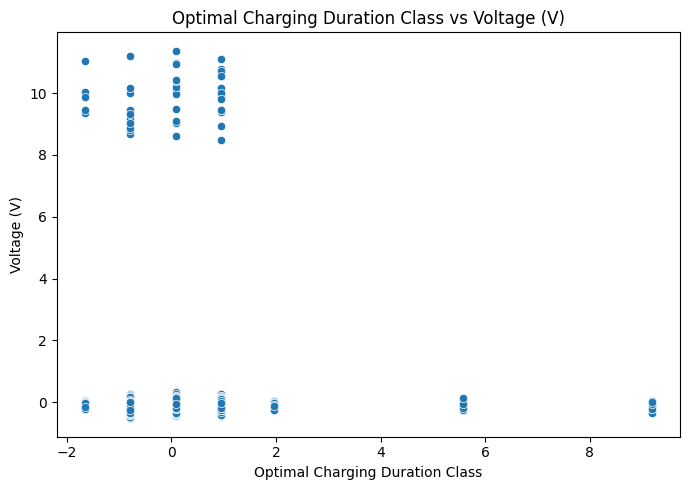

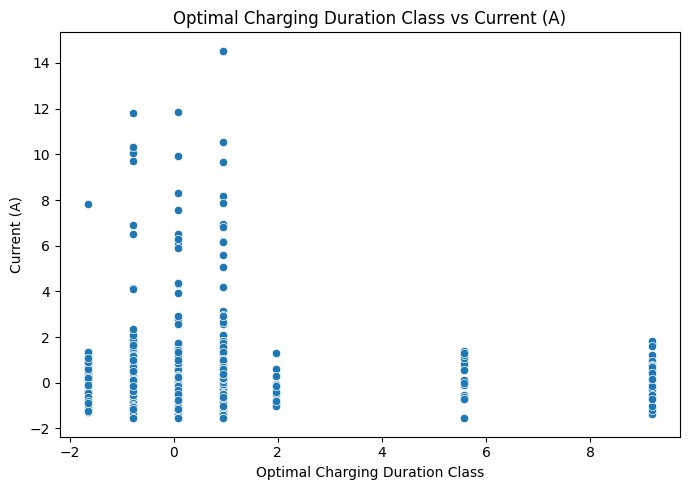

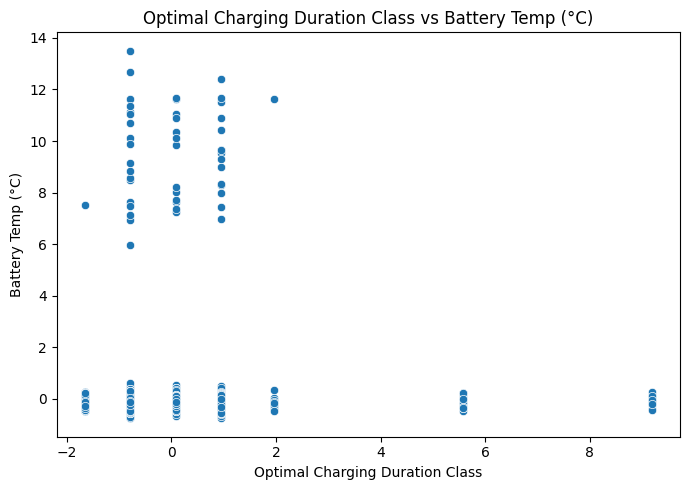

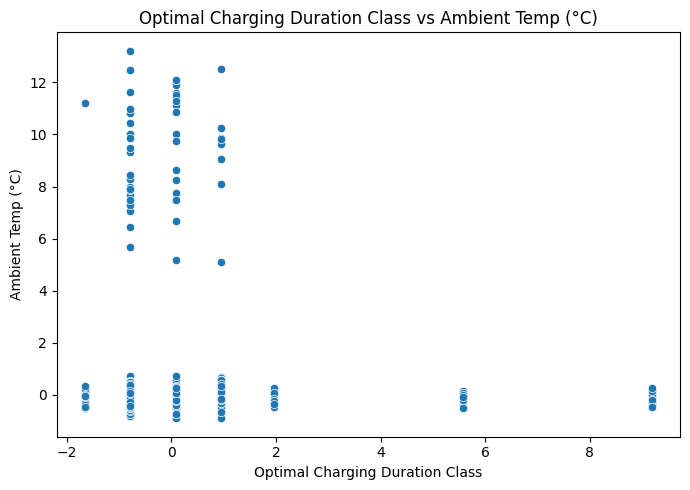

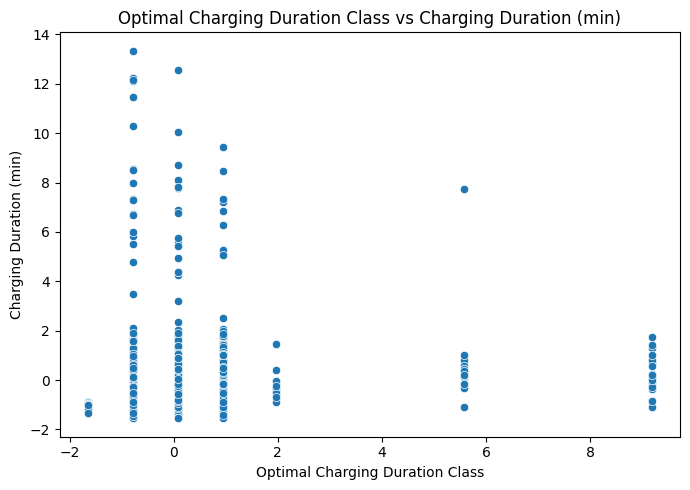

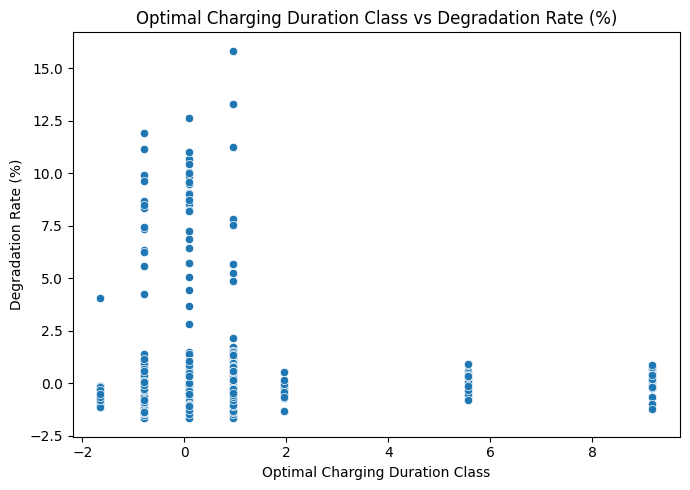

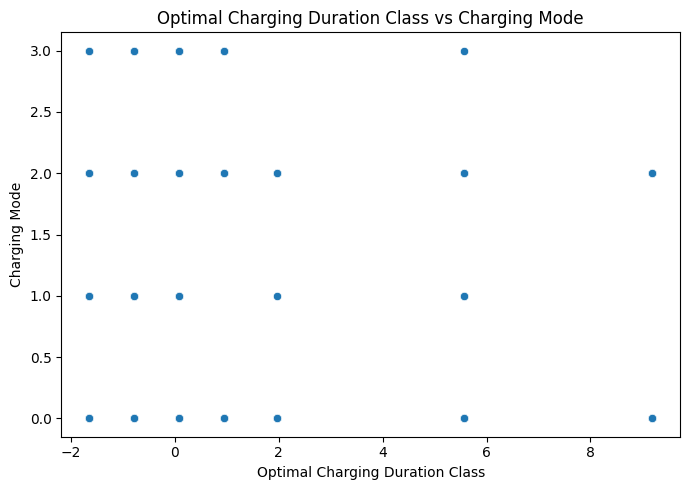

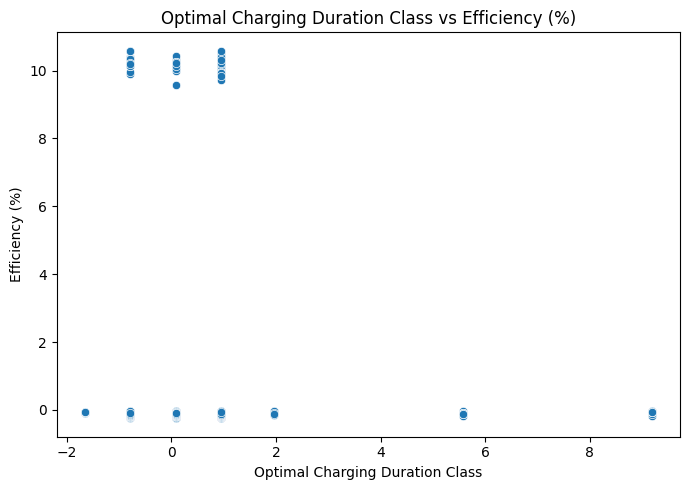

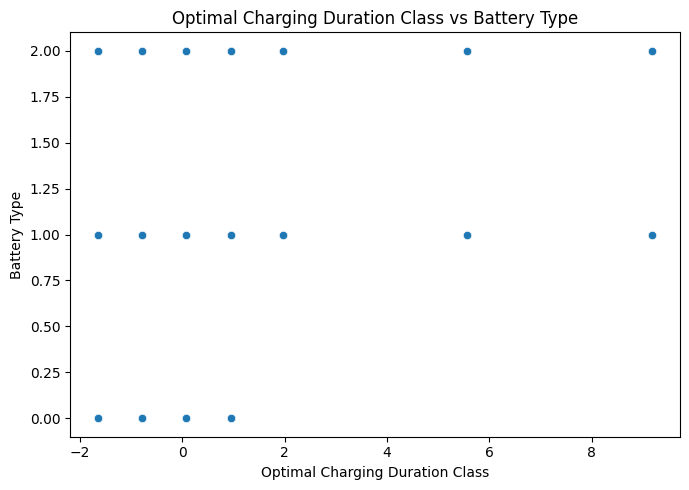

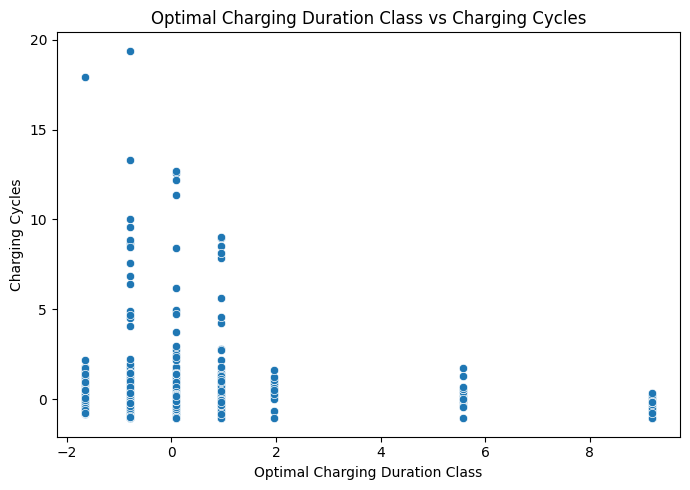

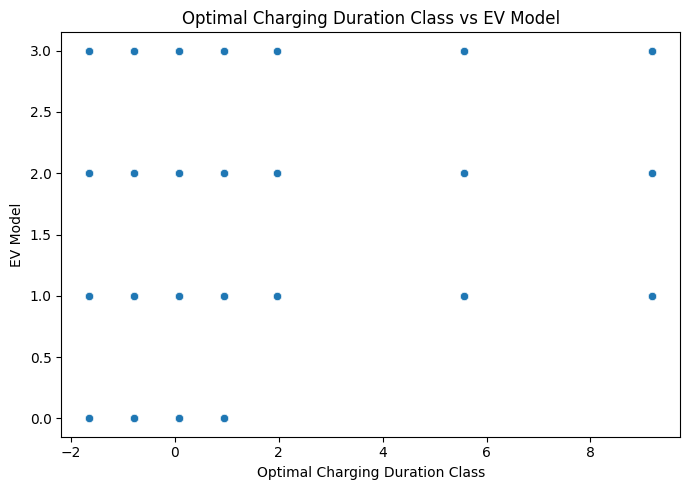

In [ ]:
#scatter plot to see relationships
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for i in numerical_cols:
    for j in numerical_cols:
        if i != j: # Avoid plotting a variable against itself
            plt.figure(figsize=(7,5))
            sns.scatterplot(data=df, x=i, y=j)
            plt.title(f'{i} vs {j}')
            plt.xlabel(i)
            plt.ylabel(j)
            plt.tight_layout()
            plt.show()

### Scatter Plots to Explore Relationships Between Numerical Features  
We generate scatter plots for every pair of distinct numerical variables to visually examine their relationships.  
These plots help identify **correlations**, **linear or nonlinear trends**, and **potential clusters or anomalies** in the data.  
By skipping cases where a variable is plotted against itself, we focus only on meaningful feature interactions.


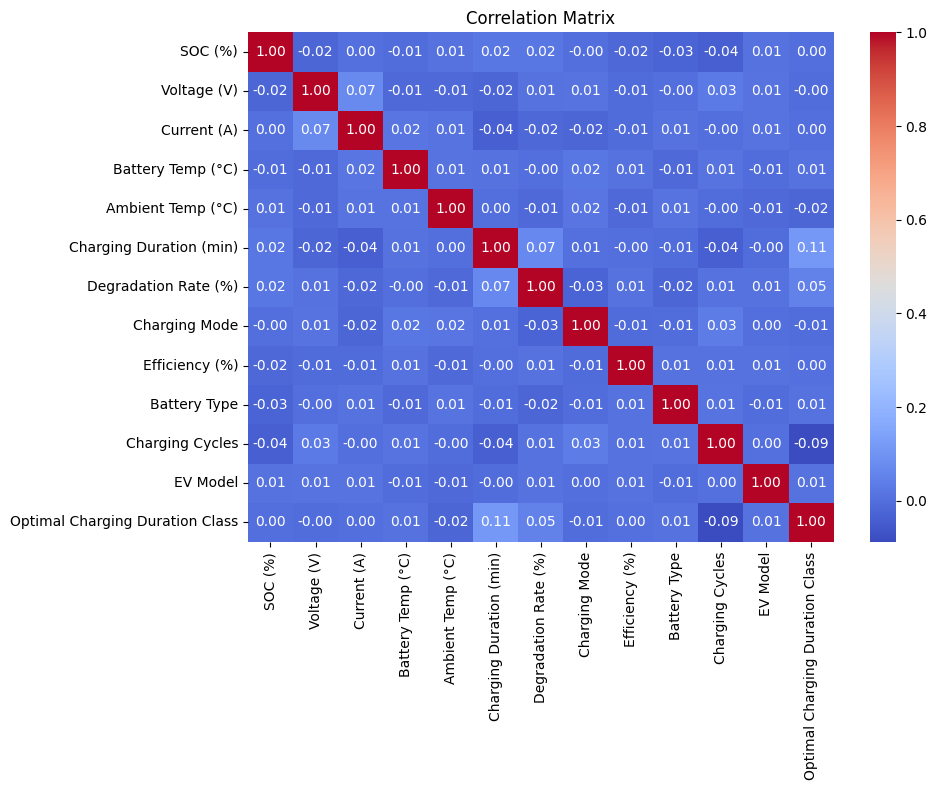

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Correlation Heatmap of Numerical Variables  
We calculate the **correlation matrix** for all numeric features to examine how strongly each pair of variables is related.  
The resulting heatmap provides a quick visual overview of relationships:  
- Darker shades (toward red or blue) indicate stronger correlations (positive or negative).  
- Values near 0 suggest weak or no linear relationship.  

This step helps in detecting **multicollinearity** and understanding which features may carry similar information.


In [ ]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

### Correlation Matrix for Interpreting Relationships and Multicollinearity  
We compute the correlation matrix `s` for all numerical columns using `.corr()`.  
This matrix quantifies how strongly each numerical feature is linearly related to others.  
Analyzing these correlations helps in:  
- Identifying **strongly correlated pairs** that may indicate redundancy or multicollinearity.  
- Selecting **key predictors** for modeling by focusing on features that are not highly correlated with each other.


<Axes: >

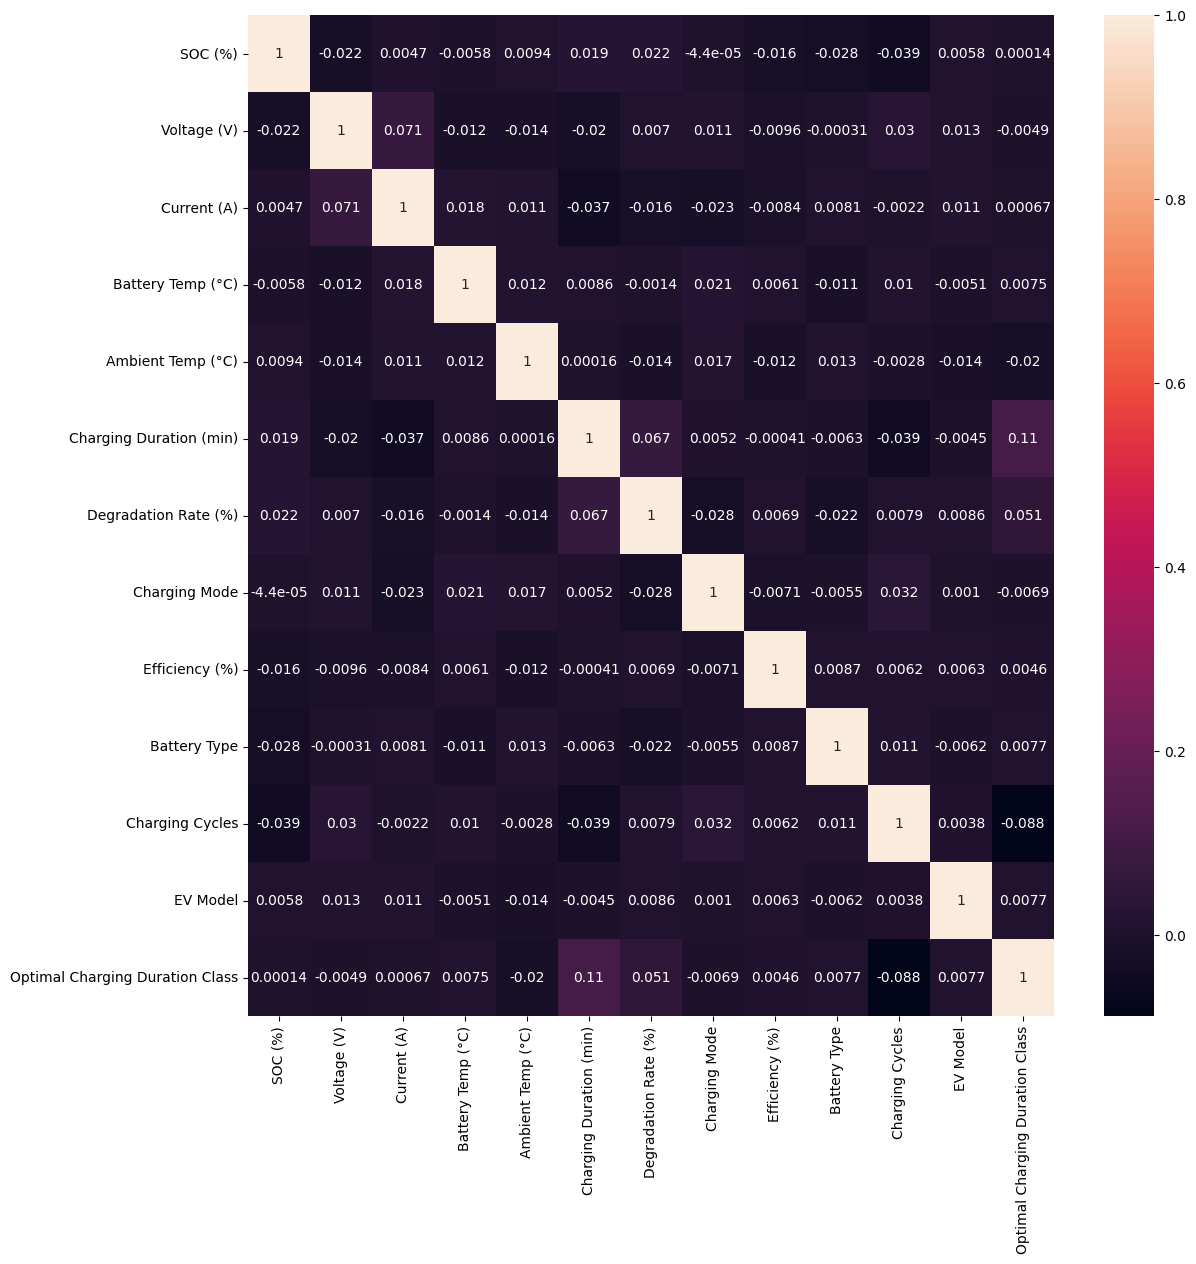

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(s,annot=True)

### Visualize Correlation Matrix with Heatmap  
We use Seaborn’s `heatmap()` to visualize the correlation matrix computed earlier.  
This heatmap provides an intuitive overview of how numerical variables relate to each other —  
strong positive or negative correlations appear as darker shades.  
The visualization helps quickly spot **multicollinearity** among predictors and guides **feature selection** decisions.


In [ ]:
#MISSING VALUE TREATMENT

In [ ]:
df.isnull().sum()

SOC (%)                            101
Voltage (V)                        100
Current (A)                        100
Battery Temp (°C)                  101
Ambient Temp (°C)                  101
Charging Duration (min)            103
Degradation Rate (%)               102
Charging Mode                        0
Efficiency (%)                     100
Battery Type                         0
Charging Cycles                    101
EV Model                             0
Optimal Charging Duration Class    100
dtype: int64

### Recheck for Missing Values After Preprocessing  
We again compute the total number of null values in each column using `.isnull().sum()`.  
This verification step ensures that no new missing data was introduced during encoding, scaling, or transformation.  
It also confirms that previous cleaning steps were successful and the dataset is ready for modeling.


In [ ]:
df.head(1)

SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  Ambient Temp (°C)  \
0 -0.529594    -0.173748    -0.557679           0.032295          -0.031704   

   Charging Duration (min)  Degradation Rate (%)  Charging Mode  \
0                -0.482175             -0.286914              0   

   Efficiency (%)  Battery Type  Charging Cycles  EV Model  \
0       -0.075755             1        -0.776138         2   

   Optimal Charging Duration Class  
0                        -0.783473

### Display the First Record of the Processed Dataset  
We use `.head(1)` to display the first row of the cleaned and preprocessed DataFrame.  
This allows us to quickly verify that all transformations — encoding, scaling, and cleaning — have been correctly applied,  
and the dataset structure is consistent with our expectations before moving on to modeling.


In [ ]:
for i in ["SOC (%)","Voltage (V)","Current (A)","Battery Temp (°C)","Ambient Temp (°C)","Charging Duration (min)","Degradation Rate (%)","Efficiency (%)","Charging Cycles","Optimal Charging Duration Class"]:
  df[i] = df[i].fillna(df[i].median())

### Handle Missing Values with Median Imputation  
We fill missing (NaN) values in key numerical columns using the **median** of each column.  
Median imputation is robust against outliers and helps maintain the central tendency of the data  
without significantly distorting the distribution.  
This ensures the dataset remains complete and ready for modeling.


In [ ]:
df.isnull().sum()

SOC (%)                            0
Voltage (V)                        0
Current (A)                        0
Battery Temp (°C)                  0
Ambient Temp (°C)                  0
Charging Duration (min)            0
Degradation Rate (%)               0
Charging Mode                      0
Efficiency (%)                     0
Battery Type                       0
Charging Cycles                    0
EV Model                           0
Optimal Charging Duration Class    0
dtype: int64

### Verify Missing Value Imputation  
We recheck the dataset for any remaining null values using `.isnull().sum()`.  
This confirmation step ensures that all missing entries were successfully replaced  
and that the dataset is now fully clean and ready for further analysis or modeling.


In [ ]:
#outliers treatment on continous numerical data

In [ ]:
#duplicates and garbage value treatments

In [ ]:
df.duplicated().sum()

np.int64(45)

### Check for Duplicate Records  
We use `.duplicated().sum()` to count the number of duplicate rows in the dataset after cleaning and preprocessing.  
This ensures that no redundant or repeated observations remain, which could bias model training or skew statistical analysis.


In [ ]:
df.drop_duplicates(inplace=True)

### Remove Duplicate Records  
We drop all duplicate rows from the dataset using `drop_duplicates(inplace=True)`.  
This operation ensures that each observation is unique, eliminating redundancy and improving data quality.  
Using `inplace=True` updates the DataFrame directly without creating a new copy.


In [ ]:
dummy=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

### One-Hot Encode Categorical Variables  
We apply one-hot encoding to all categorical columns using `pd.get_dummies()`.  
This converts each categorical feature into multiple binary (0/1) columns, allowing machine-learning models to interpret them numerically.  
The parameter `drop_first=True` avoids the **dummy variable trap** by dropping one level from each category,  
thereby preventing multicollinearity in regression-based models.


In [ ]:
dummy

SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  \
0    -0.529594    -0.173748    -0.557679           0.032295   
1     1.077330    -0.073458    -0.597101           0.125567   
2     0.467328     0.019601     1.167706          -0.285363   
3     0.095462    -0.019957    -0.590229          -0.003688   
4    -1.139041     0.000939    -0.530257          -0.043657   
...        ...          ...          ...                ...   
5001 -0.850650    -0.133887    -0.443930          -0.042682   
5014  0.248669    -0.104488    -0.354698           0.059237   
5025 -0.050623    -0.162701    -0.628798           0.080230   
5037  0.028676    10.568825    14.535955           0.150108   
5046 -0.266244     0.022700     0.138280          -0.074939   

      Ambient Temp (°C)  Charging Duration (min)  Degradation Rate (%)  \
0             -0.031704                -0.482175             -0.286914   
1              0.174561                -0.309463              0.315627   
2              0.134559                 0.515383              0.608807   
3             -0.401135                -0.598250             -0.195373   
4             -0.405244                 0.548069              0.226668   
...                 ...                      ...                   ...   
5001           0.118129                -0.856958             -0.654082   
5014           0.097109                -0.005871              0.380863   
5025          -0.036011                 0.999324              0.597812   
5037          -0.213763                -0.105793             -0.670510   
5046          -0.432161                 0.471558              0.565569   

      Efficiency (%)  Charging Cycles  Optimal Charging Duration Class  \
0          -0.075755        -0.776138                        -0.783473   
1          -0.089456         0.048336                        -0.783473   
2          -0.096122        -0.594523                         0.081243   
3          -0.077837        -0.133279                        -0.783473   
4          -0.087433         1.455131                         0.081243   
...              ...              ...                              ...   
5001       -0.067406         0.221303                        -0.783473   
5014       -0.117605        -0.245707                        -0.783473   
5025       -0.132596        -0.049679                         0.945960   
5037       -0.045079        -0.314894                         0.945960   
5046       -0.041455        -0.222645                        -0.783473   

      Charging Mode_1  Charging Mode_2  Charging Mode_3  Battery Type_1  \
0               False            False            False            True   
1               False            False            False           False   
2               False             True            False           False   
3               False            False            False           False   
4               False            False            False            True   
...               ...              ...              ...             ...   
5001            False             True            False           False   
5014            False             True            False           False   
5025            False            False            False           False   
5037            False            False            False           False   
5046            False             True            False           False   

      Battery Type_2  EV Model_1  EV Model_2  EV Model_3  
0              False       False        True       False  
1               True        True       False       False  
2               True        True       False       False  
3               True       False        True       False  
4              False       False       False        True  
...              ...         ...         ...         ...  
5001            True        True       False       False  
5014            True       False       False       False  
5025           False        True       F

### Display the Encoded DataFrame  
We output the transformed DataFrame `dummy` to inspect the result of one-hot encoding.  
This helps verify that categorical variables have been correctly converted into binary columns  
and ensures the dataset is now fully numerical and ready for model training.


In [ ]:
print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)


Categorical: ['Charging Mode', 'Battery Type', 'EV Model']
Numerical: ['SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)', 'Ambient Temp (°C)', 'Charging Duration (min)', 'Degradation Rate (%)', 'Charging Mode', 'Efficiency (%)', 'Battery Type', 'Charging Cycles', 'EV Model', 'Optimal Charging Duration Class']


### Display Lists of Categorical and Numerical Columns  
We print the names of all categorical and numerical features that were identified earlier.  
This quick check confirms that column segregation was done correctly before encoding and scaling,  
and helps verify which variables belong to each group.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Import Machine Learning Libraries for Modeling  
We import essential modules from **scikit-learn** to build and evaluate our predictive model:  
- `RandomForestClassifier` — an ensemble learning method that combines multiple decision trees to improve accuracy and control overfitting.  
- `train_test_split` — a utility function to divide the dataset into training and testing subsets for unbiased model evaluation.


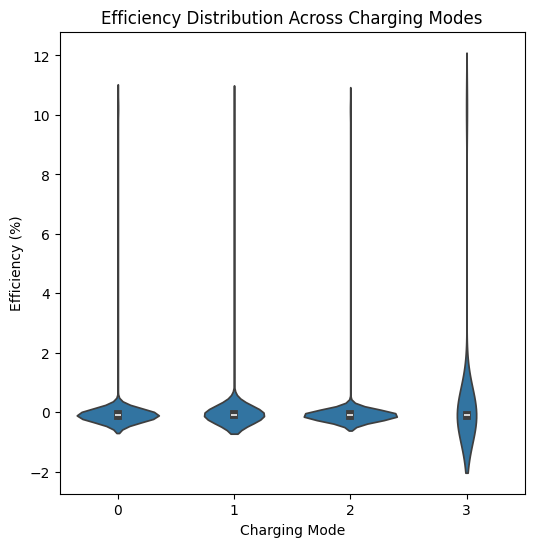

In [ ]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='Charging Mode', y='Efficiency (%)', data=df)
plt.title('Efficiency Distribution Across Charging Modes')
plt.show()

### Efficiency Distribution Across Charging Modes  
We use a **violin plot** to compare the distribution of *Efficiency (%)* across different *Charging Modes*.  
A violin plot combines aspects of a boxplot and a kernel density plot,  
showing both the spread and probability density of the data.  
This helps us understand how charging mode influences efficiency and whether certain modes perform consistently better.


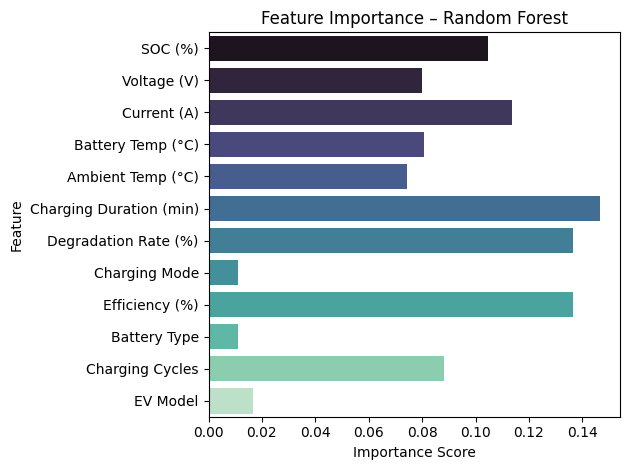

In [ ]:
# Feature Importance Plot
from sklearn.ensemble import RandomForestRegressor # Changed to Regressor
import seaborn as sns
import matplotlib.pyplot as plt

X = df.select_dtypes(include='number').drop('Optimal Charging Duration Class', axis=1).fillna(0)
y = df['Optimal Charging Duration Class'].fillna(0)

rf = RandomForestRegressor(random_state=42) # Changed to Regressor
rf.fit(X, y)

sns.barplot(x=rf.feature_importances_, y=X.columns, palette="mako")
plt.title("Feature Importance – Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Feature Importance Analysis Using Random Forest Regressor  
We use a **Random Forest Regressor** to determine which input features contribute most to predicting the target variable  
(*Optimal Charging Duration Class*). Random forests estimate feature importance by measuring how much each feature  
reduces prediction error across decision trees.

**Steps performed:**
1. **Feature–Target Split:**  
   - `X` contains all numerical features except the target column.  
   - `y` is the target variable (*Optimal Charging Duration Class*).  
   Missing values are replaced with 0 for stability.

2. **Model Training:**  
   A `RandomForestRegressor` is initialized (with `random_state=42` for reproducibility) and trained on the data.

3. **Visualization:**  
   The feature importances are plotted as a horizontal bar chart using Seaborn,  
   highlighting the most influential variables affecting charging duration classification.


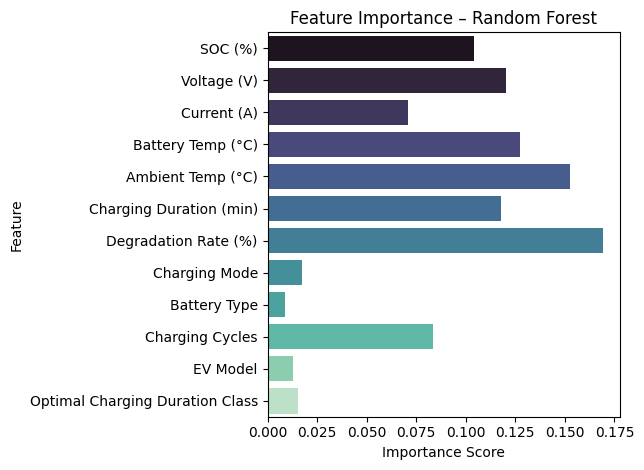

In [ ]:


X = df.select_dtypes(include='number').drop('Efficiency (%)', axis=1).fillna(0)
y = df['Efficiency (%)'].fillna(0)

rf = RandomForestRegressor(random_state=42) # Changed to Regressor
rf.fit(X, y)

sns.barplot(x=rf.feature_importances_, y=X.columns, palette="mako")
plt.title("Feature Importance – Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Feature Importance for Predicting Efficiency (%)  
We train a **Random Forest Regressor** to identify which features most strongly influence the *Efficiency (%)* of the EV battery system.  

**Steps explained:**
1. **Feature–Target Definition:**  
   - `X`: All numerical features except the target (*Efficiency (%)*).  
   - `y`: The target variable (*Efficiency (%)*).  
   Missing values are replaced with zeros to ensure smooth model fitting.

2. **Model Training:**  
   A `RandomForestRegressor` is initialized with a fixed random state for reproducibility and trained on the dataset.

3. **Feature Importance Visualization:**  
   A Seaborn bar plot displays each feature’s importance score, showing how much it contributes to predicting efficiency.  
   This helps highlight key parameters (like voltage, current, or temperature) that most affect battery efficiency.


In [ ]:
dummy.head()

SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  Ambient Temp (°C)  \
0 -0.529594    -0.173748    -0.557679           0.032295          -0.031704   
1  1.077330    -0.073458    -0.597101           0.125567           0.174561   
2  0.467328     0.019601     1.167706          -0.285363           0.134559   
3  0.095462    -0.019957    -0.590229          -0.003688          -0.401135   
4 -1.139041     0.000939    -0.530257          -0.043657          -0.405244   

   Charging Duration (min)  Degradation Rate (%)  Efficiency (%)  \
0                -0.482175             -0.286914       -0.075755   
1                -0.309463              0.315627       -0.089456   
2                 0.515383              0.608807       -0.096122   
3                -0.598250             -0.195373       -0.077837   
4                 0.548069              0.226668       -0.087433   

   Charging Cycles  Optimal Charging Duration Class  Charging Mode_1  \
0        -0.776138                        -0.783473            False   
1         0.048336                        -0.783473            False   
2        -0.594523                         0.081243            False   
3        -0.133279                        -0.783473            False   
4         1.455131                         0.081243            False   

   Charging Mode_2  Charging Mode_3  Battery Type_1  Battery Type_2  \
0            False            False            True           False   
1            False            False           False            True   
2             True            False           False            True   
3            False            False           False            True   
4            False            False            True           False   

   EV Model_1  EV Model_2  EV Model_3  
0       False        True       False  
1        True       False       False  
2        True       False       False  
3       False        True       False  
4       False       False        True

### Preview of the Encoded Dataset (`dummy`)  
We display the first few rows of the one-hot encoded DataFrame `dummy` using `.head()`.  
This allows us to verify that categorical columns were correctly expanded into binary dummy variables,  
and to confirm that all preprocessing steps have produced a clean, model-ready dataset.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y) using the dummy dataframe
X = dummy.drop('Battery Type_1', axis=1) # Dropping one of the dummy variables for Battery Type to avoid multicollinearity
y = dummy['Battery Type_1'] # Using one of the dummy variables for Battery Type as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Random Forest Classifier predicting Battery Type: {accuracy}")

Accuracy of Random Forest Classifier predicting Battery Type: 0.994005994005994


### Random Forest Classification – Predicting Battery Type  
We build and evaluate a **Random Forest Classifier** to predict the *Battery Type* of EVs based on other features.

**Steps explained:**

1. **Feature–Target Selection:**  
   - `X`: All features from the encoded dataset (`dummy`) except one dummy variable for *Battery Type* (dropped to avoid multicollinearity).  
   - `y`: The binary dummy column representing one class of *Battery Type*.

2. **Train–Test Split:**  
   The dataset is divided into 80% training and 20% testing subsets to evaluate generalization performance.

3. **Model Training:**  
   A `RandomForestClassifier` is instantiated with a fixed random seed (`random_state=42`) for reproducibility and trained on the training data.

4. **Prediction and Evaluation:**  
   The trained model predicts *Battery Type* on the test set.  
   We compute the **accuracy score** to measure how well the classifier distinguishes battery types based on the given features.


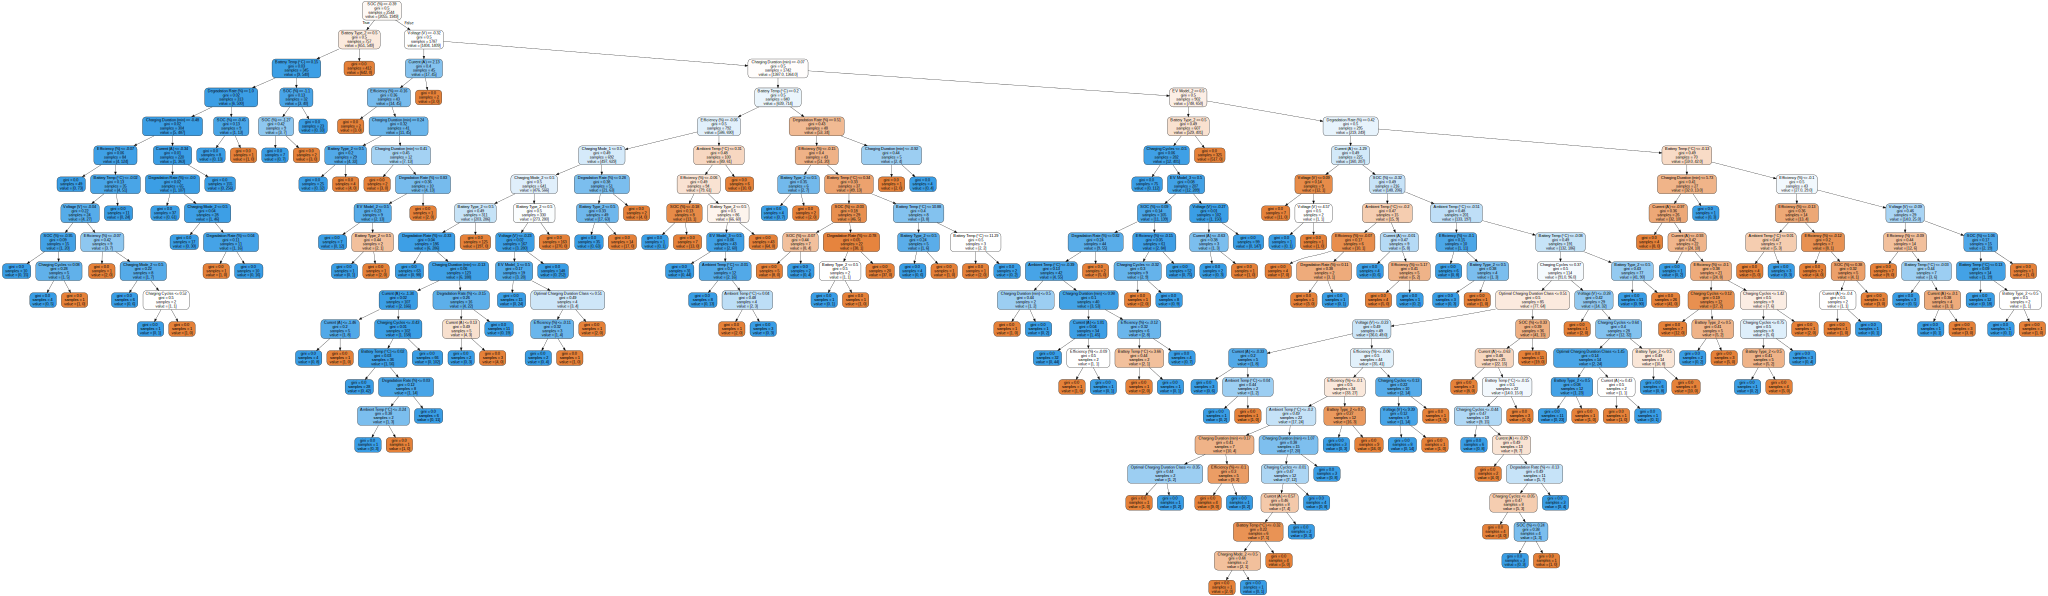

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Select a single tree from the random forest
estimator = rf_classifier.estimators_[0]

# Export the tree in DOT format
export_graphviz(estimator,
                out_file='tree.dot',
                feature_names = X_train.columns,
                # class_names = y_train.unique().astype(str), # Uncomment if target is multiclass
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert the DOT file to a graph
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Visualize a Single Decision Tree from the Random Forest  
To better understand how the Random Forest classifier makes predictions,  
we visualize one of its individual decision trees using **Graphviz**.

**Steps explained:**
1. **Select an Estimator:**  
   We extract a single decision tree (`estimator = rf_classifier.estimators_[0]`) from the trained Random Forest ensemble.

2. **Export to DOT Format:**  
   The tree is exported in `.dot` format using `export_graphviz()`.  
   This includes feature names, rounded node edges, and color-filled nodes for interpretability.

3. **Render with Graphviz:**  
   The `.dot` file is read back and visualized as a decision tree diagram using `graphviz.Source()`.  
   The resulting graph shows how features are split at various thresholds to predict the *Battery Type*.


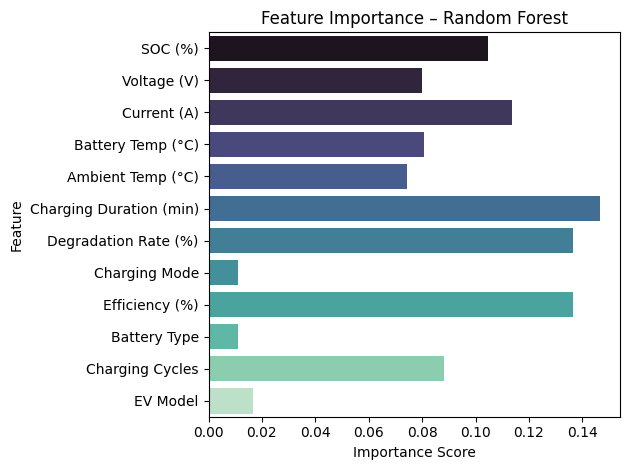

In [ ]:
# Feature Importance Plot
from sklearn.ensemble import RandomForestRegressor # Changed to Regressor
import seaborn as sns
import matplotlib.pyplot as plt

X = df.select_dtypes(include='number').drop('Optimal Charging Duration Class', axis=1).fillna(0)
y = df['Optimal Charging Duration Class'].fillna(0)

rf = RandomForestRegressor(random_state=42) # Changed to Regressor
rf.fit(X, y)

sns.barplot(x=rf.feature_importances_, y=X.columns, palette="mako")
plt.title("Feature Importance – Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Feature Importance for Predicting Optimal Charging Duration  
We apply a **Random Forest Regressor** to determine which features most influence the *Optimal Charging Duration Class*.  
This analysis helps interpret which electrical and thermal parameters are key drivers in predicting optimal charging behavior.

**Process Overview:**
1. **Feature–Target Setup:**  
   - `X`: All numeric features except the target column (*Optimal Charging Duration Class*).  
   - `y`: The target variable itself.  
   Missing values are filled with zeros to ensure consistency.

2. **Model Training:**  
   A `RandomForestRegressor` is trained using a fixed random state for reproducibility.

3. **Feature Importance Visualization:**  
   Seaborn’s bar plot displays each feature’s contribution to the model’s predictions.  
   Higher importance scores indicate parameters that have stronger effects on determining optimal charging duration.


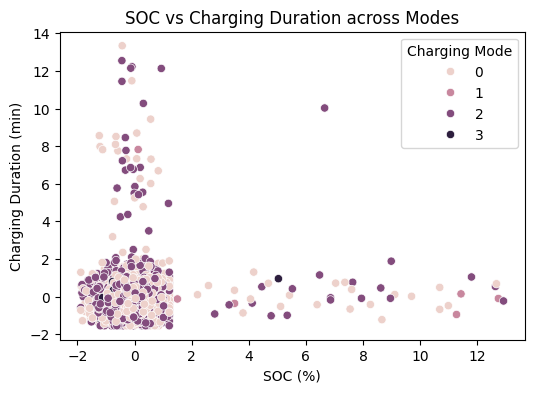

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='SOC (%)', y='Charging Duration (min)', hue='Charging Mode', data=df)
plt.title("SOC vs Charging Duration across Modes")
plt.show()

### SOC vs Charging Duration Across Charging Modes  
We create a scatter plot to analyze the relationship between **State of Charge (SOC %)** and **Charging Duration (min)**,  
while differentiating points by **Charging Mode** using color (hue).  

This visualization helps reveal:  
- How charging duration varies with SOC across different charging modes.  
- Whether certain modes charge faster or slower for similar SOC levels.  
- Any patterns or clusters that indicate efficiency or mode-specific behavior.


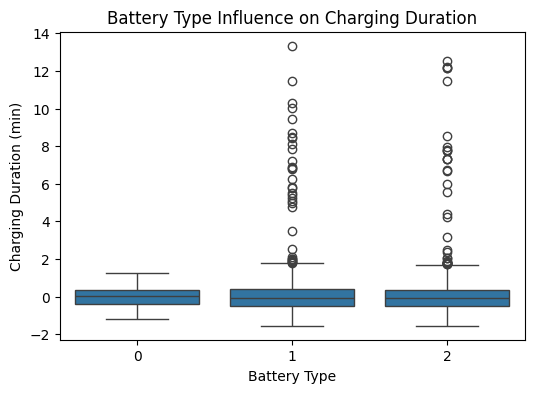

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Battery Type', y='Charging Duration (min)', data=df)
plt.title("Battery Type Influence on Charging Duration")
plt.show()

### Battery Type Influence on Charging Duration  
We use a **boxplot** to compare the distribution of *Charging Duration (min)* across different **Battery Types**.  
This plot helps us understand:  
- How charging time varies depending on the battery type.  
- The presence of outliers or variability in charging performance.  
- Which battery types tend to have shorter or longer charging durations on average.  

The box represents the interquartile range (IQR), while the whiskers and points show spread and potential outliers.


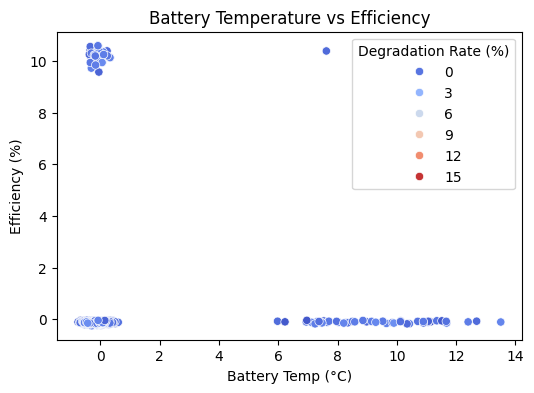

In [ ]:

# Q3: Temperature vs Efficiency
plt.figure(figsize=(6,4))
sns.scatterplot(x='Battery Temp (°C)', y='Efficiency (%)', hue='Degradation Rate (%)', data=df, palette='coolwarm')
plt.title("Battery Temperature vs Efficiency")
plt.show()


### Q3: Battery Temperature vs Efficiency  
This scatter plot explores how **Battery Temperature (°C)** affects **Efficiency (%)**,  
with points color-coded by **Degradation Rate (%)** to add an extra dimension of insight.  

**Interpretation goals:**  
- Observe whether efficiency decreases at higher battery temperatures.  
- Examine if higher degradation rates are associated with specific temperature ranges.  
- Identify optimal thermal operating zones for maximum efficiency.  

The color gradient (`coolwarm` palette) visually highlights how degradation interacts with temperature and efficiency.


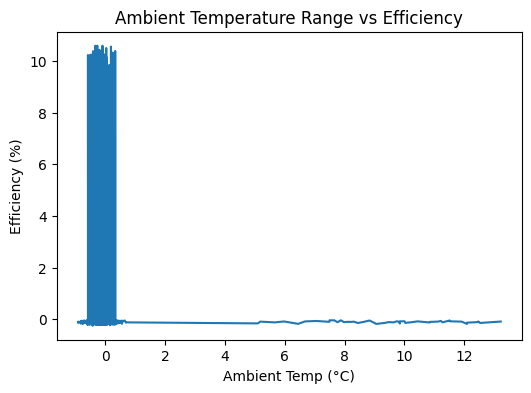

In [ ]:
# Q4: Ambient Temperature vs Efficiency
plt.figure(figsize=(6,4))
sns.lineplot(x='Ambient Temp (°C)', y='Efficiency (%)', data=df)
plt.title("Ambient Temperature Range vs Efficiency")
plt.show()


### Q4: Ambient Temperature vs Efficiency  
We plot a **line chart** to study the relationship between **Ambient Temperature (°C)** and **Efficiency (%)** of the EV battery system.  

**Purpose:**  
- To observe how environmental temperature impacts the battery’s operational efficiency.  
- Identify any optimal ambient range where efficiency peaks or remains stable.  
- Detect potential decline in performance under extreme temperature conditions.  

This visualization helps highlight the influence of surrounding climate on overall charging and discharging behavior.


<Figure size 600x400 with 0 Axes>

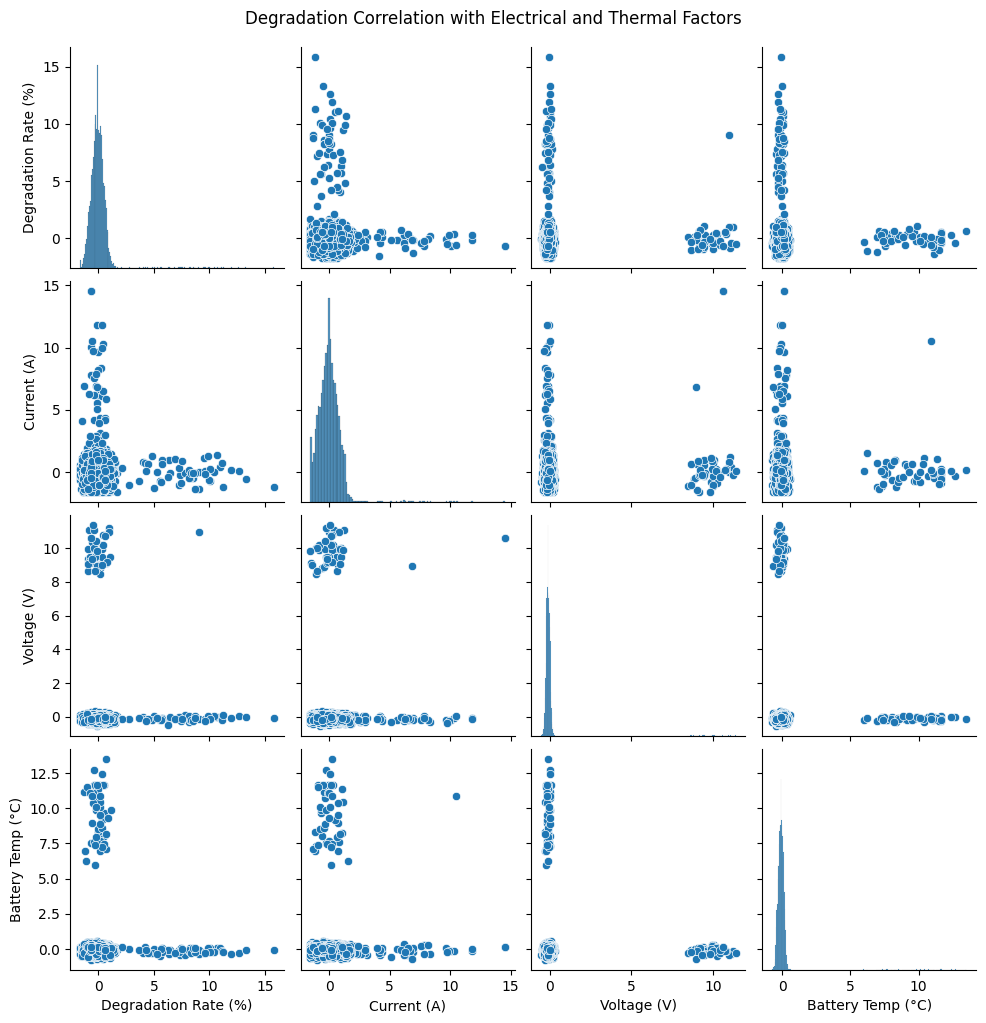

In [ ]:

# Q5: Predictive Maintenance — Degradation vs Current, Voltage, Temp
plt.figure(figsize=(6,4))
sns.pairplot(df[['Degradation Rate (%)', 'Current (A)', 'Voltage (V)', 'Battery Temp (°C)']])
plt.suptitle("Degradation Correlation with Electrical and Thermal Factors", y=1.02)
plt.show()

### Q5: Predictive Maintenance — Degradation vs Current, Voltage, and Temperature  
We use a **pair plot** to visualize pairwise relationships among key parameters affecting battery health:  
**Degradation Rate (%), Current (A), Voltage (V), and Battery Temperature (°C)**.  

**Purpose:**  
- To assess how electrical (current, voltage) and thermal (temperature) factors correlate with battery degradation.  
- To identify linear or nonlinear trends suggesting stress conditions leading to faster wear.  
- To support predictive maintenance insights by revealing which operational ranges cause higher degradation rates.  

The pairplot displays scatter relationships for each variable pair, along with distribution histograms along the diagonal.


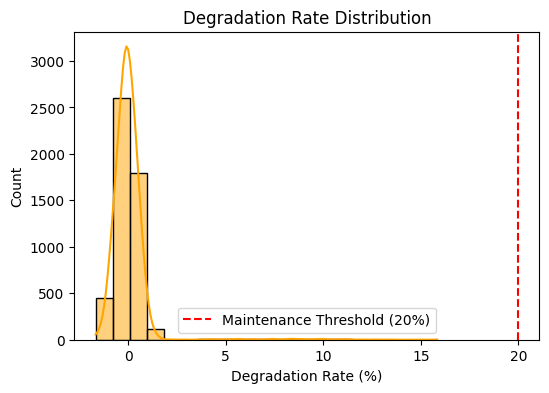

In [ ]:
# Q6: Battery Degradation Threshold
plt.figure(figsize=(6,4))
sns.histplot(df['Degradation Rate (%)'], bins=20, kde=True, color='orange')
plt.axvline(20, color='red', linestyle='--', label='Maintenance Threshold (20%)')
plt.legend()
plt.title("Degradation Rate Distribution")
plt.show()

### Q6: Battery Degradation Threshold  
We plot a **histogram** of the *Degradation Rate (%)* to visualize the overall health distribution of the batteries in the dataset.  
A **red dashed line** marks the **20% degradation threshold**, often used as a practical indicator for scheduling maintenance or battery replacement.

**Purpose:**  
- To identify how many batteries are nearing or exceeding the critical degradation limit.  
- To analyze whether most batteries operate within a safe efficiency zone.  
- To support predictive maintenance strategies by visualizing wear patterns across the fleet.

The KDE (Kernel Density Estimate) overlay provides a smooth view of the degradation trend.


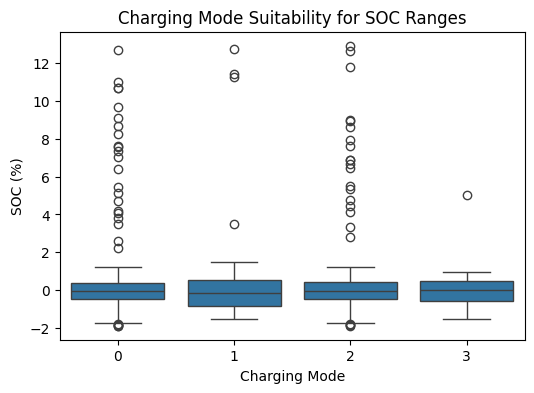

In [ ]:
# Q7: SOC vs Charging Mode
plt.figure(figsize=(6,4))
sns.boxplot(x='Charging Mode', y='SOC (%)', data=df)
plt.title("Charging Mode Suitability for SOC Ranges")
plt.show()

### Q7: SOC vs Charging Mode  
We use a **boxplot** to compare the distribution of **State of Charge (SOC %)** across different **Charging Modes**.  

**Purpose:**  
- To examine which charging modes are most suitable for specific SOC ranges.  
- To identify whether certain modes are consistently used at high or low SOC levels.  
- To analyze variability and outliers that might indicate inefficient or inconsistent charging practices.  

This comparison helps understand mode-specific charging behavior and guides optimization of mode selection for battery longevity and performance.


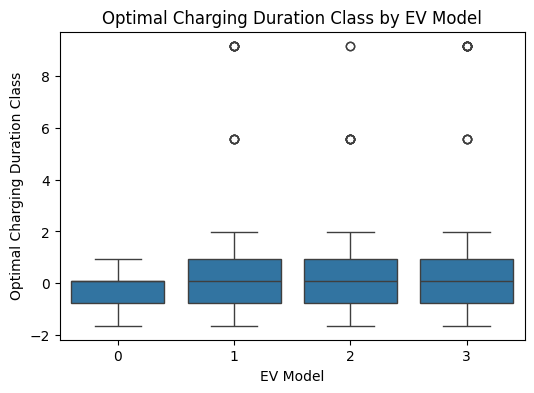

In [ ]:
# Q8: Charging Duration Class vs EV Model
plt.figure(figsize=(6,4))
sns.boxplot(x='EV Model', y='Optimal Charging Duration Class', data=df)
plt.title("Optimal Charging Duration Class by EV Model")
plt.show()

### Q8: Optimal Charging Duration Class vs EV Model  
We use a **boxplot** to compare how the **Optimal Charging Duration Class** varies across different **EV Models**.  

**Purpose:**  
- To analyze whether specific EV models tend to have shorter or longer optimal charging durations.  
- To detect performance consistency across models — narrow boxes indicate stable charging behavior.  
- To identify potential design or configuration differences that influence charging efficiency.  

This visualization provides model-level insights useful for benchmarking and optimizing charging protocols for different vehicle types.


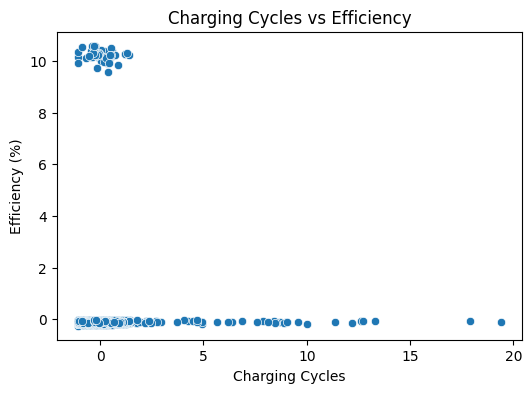

In [ ]:
# Q9: Charging Cycles vs Efficiency
plt.figure(figsize=(6,4))
sns.scatterplot(x='Charging Cycles', y='Efficiency (%)', data=df)
plt.title("Charging Cycles vs Efficiency")
plt.show()

### Q9: Charging Cycles vs Efficiency  
We use a **scatter plot** to study how **Efficiency (%)** varies with the number of **Charging Cycles** completed by the battery.  

**Purpose:**  
- To investigate whether efficiency degrades as the number of charging cycles increases.  
- To identify any nonlinear patterns or clusters indicating thresholds of performance drop.  
- To support lifecycle optimization by correlating usage intensity with operational efficiency.  

This visualization helps reveal long-term battery behavior and the trade-off between repeated usage and sustained performance.


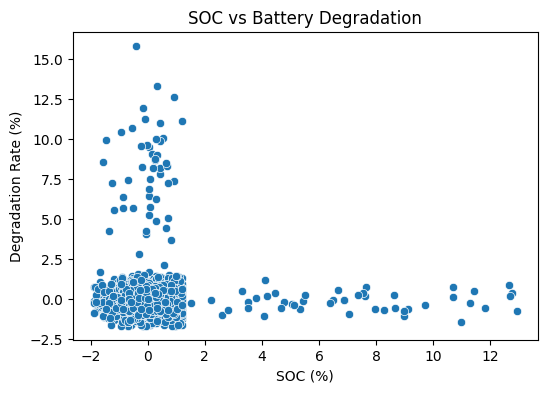

In [ ]:
# Q10: SOC vs Degradation
plt.figure(figsize=(6,4))
sns.scatterplot(x='SOC (%)', y='Degradation Rate (%)', data=df)
plt.title("SOC vs Battery Degradation")
plt.show()

### Q10: SOC vs Battery Degradation  
We use a **scatter plot** to examine the relationship between **State of Charge (SOC %)** and **Degradation Rate (%)**.  

**Purpose:**  
- To understand whether higher or lower SOC levels correlate with increased battery degradation.  
- To identify any trend suggesting optimal SOC operating ranges that minimize wear.  
- To support strategies for charging pattern optimization and battery lifespan improvement.  

This plot visually conveys how charge level management influences long-term battery health.


In [ ]:
display(df['Optimal Charging Duration Class'].unique())

array([-0.7834733 ,  0.08124329, -1.64818988,  1.96267497,  5.57353981,
        0.94595987,  9.18440466])

### Display Unique Values in 'Optimal Charging Duration Class'  
We use `.unique()` to list all distinct categories present in the **Optimal Charging Duration Class** column.  
This helps confirm the range of classes or labels available for modeling and ensures no unexpected or mislabeled entries exist.


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier # Added DecisionTreeClassifier import
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Added RandomForestClassifier import
from sklearn.linear_model import LinearRegression, LogisticRegression # Added LogisticRegression import

# Let's assume 'df' is your DataFrame and 'Degradation Rate (%)' is the target
# First, create the categorical target variable from the continuous one.
bin_labels = ['Low', 'Medium', 'High']
df['degradation_class'] = pd.qcut(df['Degradation Rate (%)'],
                                  q=3,
                                  labels=bin_labels)

# Now, redefine your X and y
# y is now the new categorical column
y = df['degradation_class']
# X is your original feature set, but make sure to drop the original continuous target
# and the new class label to avoid data leakage.
X = df.drop(columns=['Degradation Rate (%)', 'degradation_class'])

# --- RE-RUN YOUR ORIGINAL CODE ---
# This code will now work because 'y' is multiclass, not continuous.

# (Your preprocessing for X, like one-hot encoding, should happen here)
# Assuming X is already preprocessed (scaled and encoded) in previous steps

# Define models for classification
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=kfold, scoring=scoring_metrics)
    print(f"--- {name} ---")
    print(f"Accuracy: {scores['test_accuracy'].mean()*100:.2f}%")
    print(f"Precision: {scores['test_precision_macro'].mean()*100:.2f}%")
    print(f"Recall: {scores['test_recall_macro'].mean()*100:.2f}%")
    print(f"F1-score: {scores['test_f1_macro'].mean()*100:.2f}%")

--- Decision Tree Classifier ---
Accuracy: 43.50%
Precision: 43.51%
Recall: 43.50%
F1-score: 43.47%
--- Random Forest Classifier ---
Accuracy: 45.65%
Precision: 45.63%
Recall: 45.65%
F1-score: 45.56%
--- Logistic Regression ---
Accuracy: 39.12%
Precision: 38.75%
Recall: 39.12%
F1-score: 38.00%


### Multiclass Classification via Binning Degradation Rate (Cross-Validation)
We convert the continuous **Degradation Rate (%)** into a **categorical target** with three classes (*Low, Medium, High*) using quantile binning (`qcut`).  
Then we train and evaluate multiple **classification models** (Decision Tree, Random Forest, Logistic Regression) using **10-fold stratified cross-validation**.

**Workflow**
1. **Create target classes:** `degradation_class = qcut(Degradation Rate (%), q=3)` to get balanced terciles.
2. **Feature set `X`:** Drop the original continuous target and the derived categorical label to prevent leakage.
3. **Models & Metrics:** Evaluate three classifiers on *accuracy, precision_macro, recall_macro, f1_macro* with `StratifiedKFold(n_splits=10)` to preserve class balance across folds.

> **Note:** Ensure `X` is already preprocessed (e.g., numerical scaling and one-hot encoding for categorical columns) before cross-validation.  
> **Also:** You are using classifier classes below; make sure the corresponding classifier imports are present.


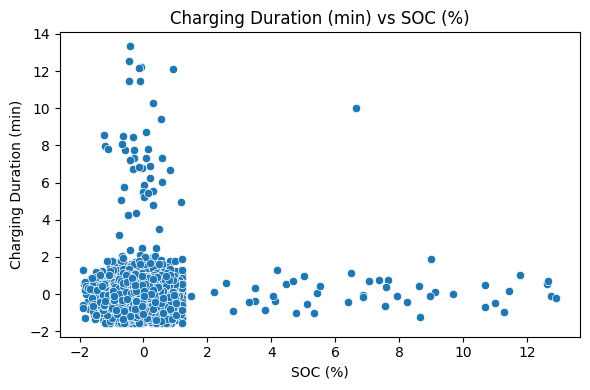

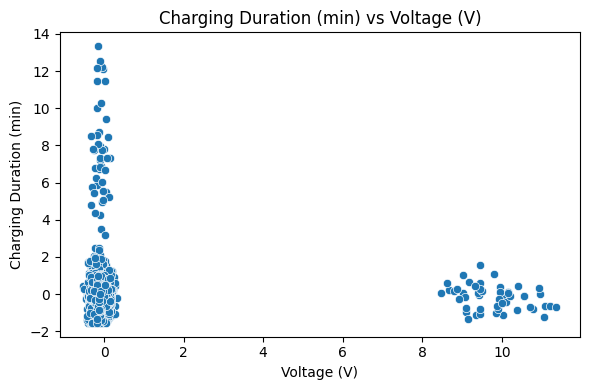

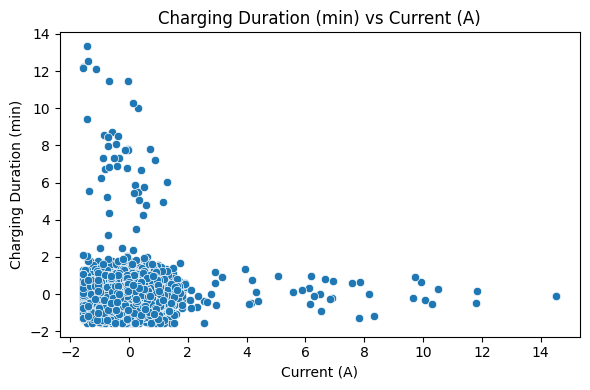

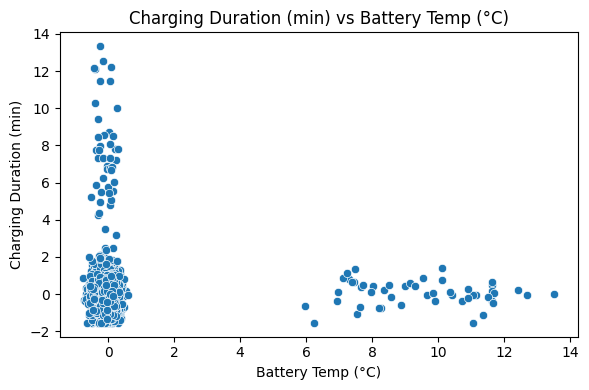

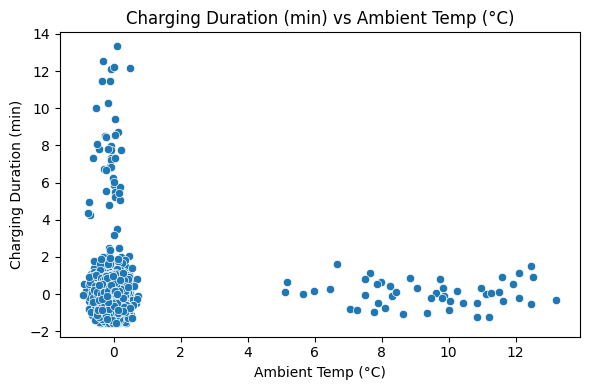

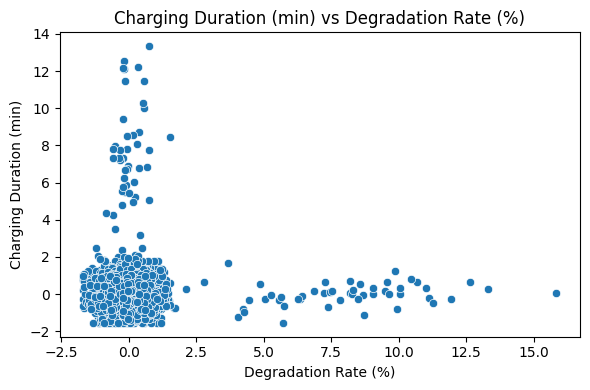

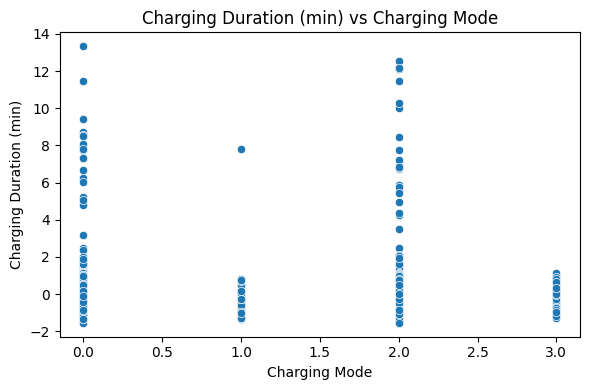

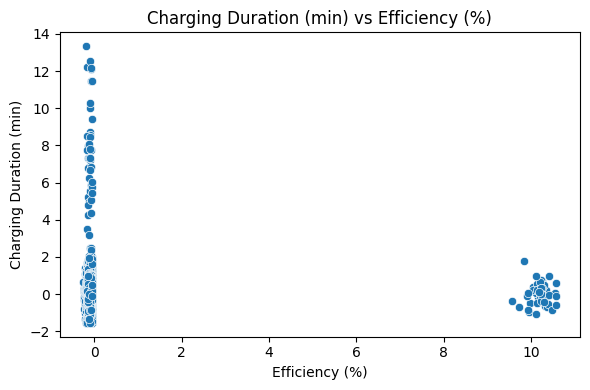

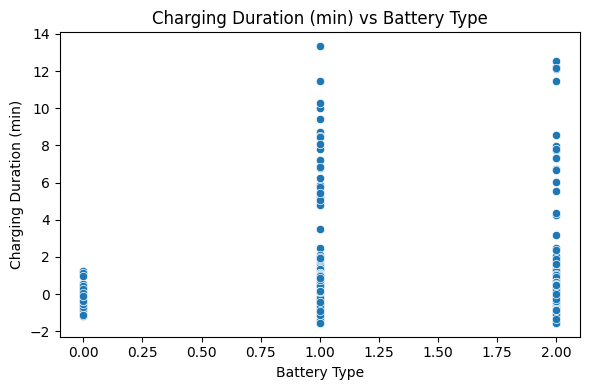

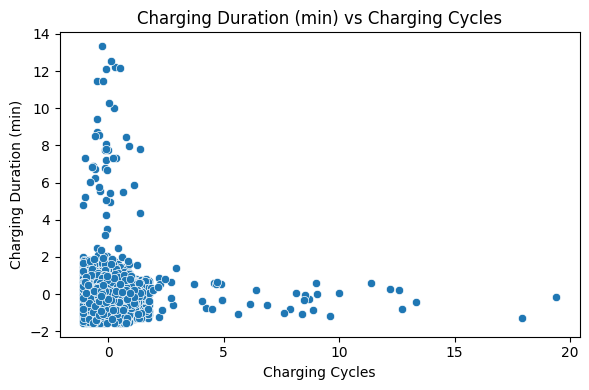

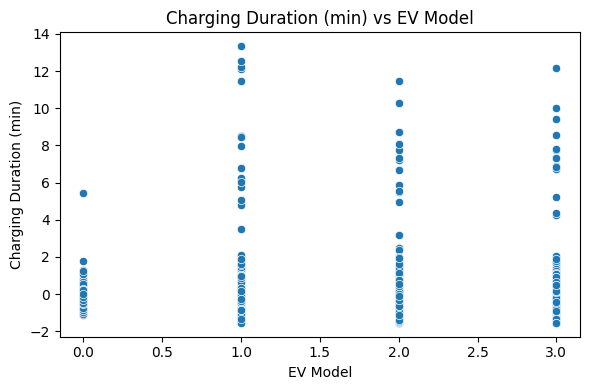

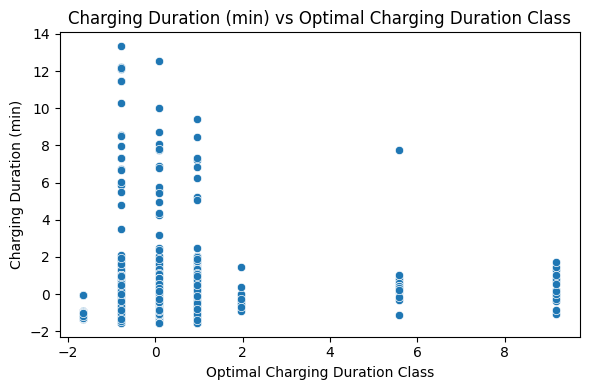

In [ ]:
# Analyze factors impacting charging duration: Visualize relationships with 'Charging Duration (min)'
numerical_cols_for_duration = [col for col in numerical_cols if col != 'Charging Duration (min)']

for col in numerical_cols_for_duration:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y='Charging Duration (min)')
    plt.title(f'Charging Duration (min) vs {col}')
    plt.xlabel(col)
    plt.ylabel('Charging Duration (min)')
    plt.tight_layout()
    plt.show()

### Analyze Factors Impacting Charging Duration  
We visualize how **Charging Duration (min)** varies with each numerical feature in the dataset (except itself).  
For each variable, a **scatter plot** is generated to assess potential relationships and trends.

**Purpose:**  
- To identify which electrical or thermal factors most influence charging duration.  
- To detect linear or nonlinear patterns (e.g., higher current or voltage leading to shorter durations).  
- To observe any anomalies or clusters that might suggest operational modes or constraints.

Each plot provides a visual understanding of how one feature correlates with charging time, helping prioritize parameters for predictive modeling.


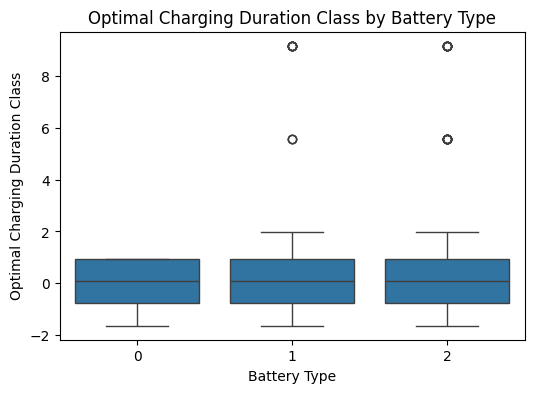

In [ ]:
# Compare optimal charging duration by battery type
plt.figure(figsize=(6,4))
sns.boxplot(x='Battery Type', y='Optimal Charging Duration Class', data=df)
plt.title("Optimal Charging Duration Class by Battery Type")
plt.xlabel("Battery Type")
plt.ylabel("Optimal Charging Duration Class")
plt.show()

### Compare Optimal Charging Duration by Battery Type  
We use a **boxplot** to compare how the **Optimal Charging Duration Class** differs across various **Battery Types**.  

**Purpose:**  
- To assess whether certain battery types consistently require shorter or longer optimal charging durations.  
- To identify variations or outliers indicating inconsistent charging performance among battery types.  
- To support selection or optimization of battery configurations based on charging behavior.  

This visualization highlights the role of battery chemistry or design in determining efficient charging intervals.


In [ ]:
# creation of synthetic BEI(parameter)
if 'BEI' not in df.columns:
    df['BEI'] = (0.5*df.get('Voltage',0)/(df.get('Current',1)+1)
                 + 0.3*(100 - df.get('Cycle Count',0))/100
                 + 0.2)

### Creation of Synthetic BEI (Battery Efficiency Index) Parameter  
We introduce a new derived metric called **BEI – Battery Efficiency Index**, which serves as a composite indicator  
for overall battery health and performance. The BEI combines electrical and cycle-based factors into a single value  
for easier comparative analysis.

**Formula Breakdown:**  
\[
\text{BEI} = 0.5 \times \frac{\text{Voltage}}{\text{Current}+1} \;+\; 0.3 \times \frac{(100 - \text{Cycle Count})}{100} \;+\; 0.2
\]
- **Voltage / Current term:** captures instantaneous electrical efficiency.  
- **Cycle Count term:** penalizes older batteries with higher charge cycles.  
- **Constant offset (0.2):** stabilizes baseline efficiency for low-usage batteries.  

This synthetic feature can be used in later modeling to assess how BEI correlates with efficiency, degradation, and charging duration.


In [ ]:
if 'Charging Duration' in df.columns:
    df['DurationClass'] = pd.qcut(df['Charging Duration'], q=3,
                                  labels=['short','medium','long'])
else:
    if df['BEI'].nunique() > 1:
        df['DurationClass'] = pd.qcut(df['BEI'], q=3, labels=['low','mid','high'], duplicates='drop')
    else:
        # All values are the same, assign a default category
        df['DurationClass'] = 'constant'

### Categorization of Charging Duration (or BEI) into Classes  
We categorize either **Charging Duration** or **BEI (Battery Efficiency Index)** into three quantile-based classes  
to support classification and comparative analysis.

**Logic:**
1. **If 'Charging Duration' column exists:**  
   - Create a new categorical column `DurationClass` with three bins — **short**, **medium**, and **long** —  
     using `pd.qcut()` to divide the duration data into equal-sized quantiles.

2. **If 'Charging Duration' is missing but BEI exists:**  
   - Use BEI values instead to classify batteries into **low**, **mid**, and **high** performance tiers.  
   - The parameter `duplicates='drop'` ensures valid binning even when some quantiles overlap.

3. **Edge Case:**  
   - If BEI contains identical values (no variation), assign a constant label `'constant'`.

This classification enables stratified analysis of charging behavior or battery performance across comparable groups.


In [ ]:
numeric_features = ['SOC (%)','Temperature (°C)','Voltage (V)',
                    'Current (A)','Cycle Count']
numeric_features = [c for c in numeric_features if c in df.columns]

### Define Key Numeric Features for Analysis  
We create a list of important numerical parameters that influence EV battery behavior, such as **SOC**, **Temperature**, **Voltage**, **Current**, and **Cycle Count**.  
To ensure code robustness, we filter this list to include only columns that actually exist in the current DataFrame (`df`).

**Purpose:**  
- To dynamically adapt the analysis pipeline even if certain columns are missing in different datasets.  
- To maintain flexibility and avoid runtime errors when performing visualizations or model training using these numeric variables.


In [ ]:
categorical_features = ['Battery Type','Charging Mode','EV Model']
categorical_features = [c for c in categorical_features if c in df.columns]


### Define Key Categorical Features for Analysis  
We specify a list of categorical variables that represent qualitative aspects of the EV dataset —  
**Battery Type**, **Charging Mode**, and **EV Model**.  
To ensure compatibility across different datasets, we filter this list to keep only the columns that are actually present in the DataFrame (`df`).

**Purpose:**  
- To dynamically identify relevant categorical features for encoding or visualization.  
- To maintain flexibility and prevent errors when working with varied or partially available datasets.  
- To support later analyses that compare performance or efficiency across these categorical dimensions.


In [ ]:
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['SOC (%)', 'Voltage (V)', 'Current (A)']
Categorical: ['Battery Type', 'Charging Mode', 'EV Model']


### Display Identified Numeric and Categorical Features  
We print the finalized lists of **numeric** and **categorical** features detected in the dataset.  
This step serves as a quick validation to confirm which variables are available for subsequent preprocessing, visualization, or modeling.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.inspection import permutation_importance

### Import Machine Learning and Preprocessing Libraries  
We import essential modules from **scikit-learn** to handle preprocessing, model training, and evaluation.

**Categories of Imports:**

1. **Model Selection & Evaluation:**  
   - `train_test_split`, `cross_val_score`, `KFold`: for splitting data and performing cross-validation.  
   - `mean_squared_error`, `r2_score`, `classification_report`: for regression and classification performance metrics.  
   - `permutation_importance`: for model interpretability and assessing feature importance.

2. **Pipeline & Preprocessing:**  
   - `Pipeline`: to streamline preprocessing and modeling steps.  
   - `ColumnTransformer`: to apply transformations selectively to numeric and categorical columns.  
   - `SimpleImputer`: for handling missing values.  
   - `StandardScaler`, `OneHotEncoder`: for feature scaling and categorical encoding.

3. **Models:**  
   - `RandomForestRegressor`, `RandomForestClassifier`: ensemble models for regression and classification.  
   - `DecisionTreeRegressor`: interpretable single-tree regression model.  
   - `LogisticRegression`: baseline classification model for comparison.

These imports establish the foundation for building a complete ML workflow — from data preprocessing to training, validation, and interpretation.


In [ ]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

### Define Numeric Feature Transformation Pipeline  
We build a **preprocessing pipeline** for numeric features to handle missing values and standardize their scales before modeling.

**Pipeline Steps:**
1. **`SimpleImputer(strategy='mean')`:**  
   - Replaces missing values in numeric columns with the mean of each feature.  
   - Ensures no null values remain, which could otherwise disrupt model training.

2. **`StandardScaler()`:**  
   - Standardizes features by removing the mean and scaling to unit variance.  
   - Helps models (especially distance-based or gradient-based ones) perform consistently when features have different ranges.

By defining this numeric transformer as a pipeline, we can easily integrate it into a full preprocessing workflow later via `ColumnTransformer`.


In [ ]:
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except Exception:
    XGBOOST_AVAILABLE = False

### Check and Import XGBoost Library (Optional)  
We attempt to import the **XGBoost** library, a powerful gradient boosting framework widely used for structured data tasks.  
If the import is successful, we set the flag `XGBOOST_AVAILABLE = True`; otherwise, we set it to `False`.

**Purpose:**  
- To conditionally enable advanced modeling (e.g., XGBoost Regressor or Classifier) only if the library is installed.  
- To ensure the script remains robust and executable even in environments where XGBoost is unavailable.  
- This approach avoids runtime import errors while maintaining flexibility for optional model experimentation.


In [ ]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Define Categorical Feature Transformation Pipeline  
We create a **pipeline for categorical features** to handle missing values and convert categories into a numerical format that models can understand.

**Pipeline Steps:**
1. **`SimpleImputer(strategy='most_frequent')`:**  
   - Fills missing categorical entries with the most frequent (mode) value in each column.  
   - Prevents loss of rows due to null category values.

2. **`OneHotEncoder(handle_unknown='ignore')`:**  
   - Converts categorical variables into binary (0/1) dummy variables.  
   - The parameter `handle_unknown='ignore'` ensures the encoder can handle unseen categories gracefully during inference.

This categorical transformer ensures consistent and error-free preprocessing for all non-numeric columns, ready to be combined with the numeric pipeline in a unified model workflow.


In [ ]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

### Combine Numeric and Categorical Pipelines into a Unified Preprocessor  
We use **`ColumnTransformer`** to apply different preprocessing steps to numeric and categorical features simultaneously.

**Details:**
- **`('num', numeric_transformer, numeric_features)`** → applies the numeric preprocessing pipeline  
  (mean imputation + standard scaling) to all numeric columns.  
- **`('cat', categorical_transformer, categorical_features)`** → applies the categorical preprocessing pipeline  
  (mode imputation + one-hot encoding) to all categorical columns.  

This integrated transformer ensures that both feature types are processed in a single, consistent step before being passed to the model.  
It simplifies the workflow and prevents manual handling of separate feature subsets.


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
reg_pipeline = Pipeline([('preprocessor', preprocessor),
                         ('regressor', rf_reg)])

### Build a Regression Pipeline with Random Forest  
We create a complete **machine learning pipeline** that includes both preprocessing and model training steps.  

**Pipeline Components:**
1. **`preprocessor`** → applies all transformations defined in the `ColumnTransformer`:  
   - Numeric columns → imputation + scaling  
   - Categorical columns → imputation + one-hot encoding  

2. **`regressor`** → a `RandomForestRegressor` model initialized with:  
   - `n_estimators=200` → uses 200 decision trees for robust ensemble learning.  
   - `random_state=42` → ensures reproducibility across runs.  

This modular setup allows seamless integration of preprocessing and model training,  
so all transformations are automatically applied during both fitting and prediction.


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf_pipeline = Pipeline([('preprocessor', preprocessor),
                         ('classifier', rf_clf)])

### Build a Regression Pipeline with Random Forest  
We create a complete **machine learning pipeline** that includes both preprocessing and model training steps.  

**Pipeline Components:**
1. **`preprocessor`** → applies all transformations defined in the `ColumnTransformer`:  
   - Numeric columns → imputation + scaling  
   - Categorical columns → imputation + one-hot encoding  

2. **`regressor`** → a `RandomForestRegressor` model initialized with:  
   - `n_estimators=200` → uses 200 decision trees for robust ensemble learning.  
   - `random_state=42` → ensures reproducibility across runs.  

This modular setup allows seamless integration of preprocessing and model training,  
so all transformations are automatically applied during both fitting and prediction.


In [ ]:
dt_reg = Pipeline([('preprocessor', preprocessor),
                   ('regressor', DecisionTreeRegressor(random_state=42))])

### Build a Regression Pipeline with Decision Tree  
We define a **Decision Tree Regressor pipeline** that integrates preprocessing and modeling in a single workflow.

**Pipeline Components:**
1. **`preprocessor`** → applies all numeric and categorical transformations using the `ColumnTransformer`  
   (handles imputation, scaling, and encoding).  
2. **`regressor`** → a `DecisionTreeRegressor` initialized with `random_state=42` for reproducibility.  

This pipeline structure ensures consistent preprocessing before model training,  
making it easy to compare performance between different regression algorithms (e.g., Decision Tree vs Random Forest).


In [ ]:
if XGBOOST_AVAILABLE:
    xgb_reg = Pipeline([('preprocessor', preprocessor),
                        ('regressor', xgb.XGBRegressor(n_estimators=200,
                                                       random_state=42))])
else:
    xgb_reg = None

### Conditional Creation of XGBoost Regression Pipeline  
We conditionally define an **XGBoost Regressor** pipeline, depending on whether the XGBoost library is available.

**Logic Overview:**
- **If XGBoost is installed:**  
  - Create a full preprocessing + modeling pipeline where the `preprocessor` handles data cleaning,  
    scaling, and encoding, and the regressor is an `xgb.XGBRegressor` with:  
    - `n_estimators=200` → uses 200 boosting trees for strong predictive performance.  
    - `random_state=42` → ensures reproducible results.
- **If XGBoost is not available:**  
  - Set `xgb_reg = None` to safely skip model training without causing runtime errors.

This approach keeps the workflow flexible, enabling optional use of XGBoost in environments where it’s supported.


In [ ]:
target_reg = 'BEI'
X = df[numeric_features + categorical_features]
y = df[target_reg]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

### Define Target Variable and Split Data for Regression  
We prepare the feature set and target variable for training regression models.

**Steps Explained:**
1. **Select Target:**  
   - The target variable is set as **`BEI` (Battery Efficiency Index)**, a synthetic indicator representing overall battery health and efficiency.  

2. **Define Feature Matrix `X`:**  
   - Combines both numeric and categorical features (`numeric_features + categorical_features`) from the DataFrame.  
   - This ensures all relevant predictors are included for modeling.  

3. **Train–Test Split:**  
   - The dataset is divided into **80% training** and **20% testing** subsets using `train_test_split()`.  
   - A fixed `random_state=42` guarantees reproducibility of results.  

This setup ensures a consistent and well-structured data split for evaluating model performance on unseen data.


In [ ]:
reg_pipeline.fit(X_train, y_train)
y_pred = reg_pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RF Regression RMSE: {rmse:.4f}, R2: {r2:.4f}")

RF Regression RMSE: 0.0000, R2: 1.0000


### Train and Evaluate Random Forest Regression Pipeline  
We fit the **Random Forest Regression pipeline** on the training set and evaluate its performance on unseen test data.

**Steps Explained:**
1. **Model Training:**  
   - The pipeline (`reg_pipeline`) automatically applies all preprocessing steps (imputation, scaling, encoding)  
     before fitting the `RandomForestRegressor` on the training data (`X_train`, `y_train`).

2. **Prediction:**  
   - The model generates predictions (`y_pred`) on the test data (`X_test`).

3. **Performance Metrics:**  
   - **RMSE (Root Mean Squared Error):** measures average prediction error magnitude — lower is better.  
   - **R² (Coefficient of Determination):** measures how well the model explains the variance in the target variable — closer to 1 indicates stronger performance.

The results provide a quantitative assessment of how effectively the Random Forest model predicts the **Battery Efficiency Index (BEI)**.


In [ ]:
target_clf = 'DurationClass'
Xc = df[numeric_features + categorical_features]
yc = df[target_clf]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc,
                                                        test_size=0.2,
                                                        random_state=42)

### Define Target Variable and Split Data for Classification  
We prepare the dataset for a **classification task** where the goal is to predict the charging duration category.

**Steps Explained:**
1. **Select Target Variable:**  
   - The target (`target_clf`) is set to **`DurationClass`**, representing categorical charging duration classes such as *short*, *medium*, and *long*.  

2. **Define Feature Matrix (`Xc`):**  
   - Combines both **numeric** and **categorical** features from the DataFrame to ensure all relevant predictors are used.  

3. **Train–Test Split:**  
   - The dataset is divided into **80% training** and **20% testing** subsets using `train_test_split()`.  
   - `random_state=42` ensures reproducibility of the results.  

This setup enables the evaluation of models that classify charging durations based on electrical, thermal, and usage-related features.


In [ ]:
clf_pipeline.fit(Xc_train, yc_train)
yc_pred = clf_pipeline.predict(Xc_test)

### Train the Classification Pipeline  
We train the **classification pipeline (`clf_pipeline`)** on the training subset and use it to predict duration classes on the test data.

**Steps Explained:**
1. **Model Training:**  
   - The pipeline automatically applies preprocessing (imputation, scaling, encoding) to `Xc_train`.  
   - The classifier (e.g., Random Forest or Logistic Regression) then fits the cleaned, transformed data.

2. **Prediction:**  
   - The trained model predicts the categorical variable **`DurationClass`** for the unseen test data (`Xc_test`).  
   - The resulting predictions (`yc_pred`) will later be compared with actual labels to evaluate classification performance.


In [ ]:
print("Classification Report:")
print(classification_report(yc_test, yc_pred))

Classification Report:
              precision    recall  f1-score   support

    constant       1.00      1.00      1.00      1001

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



### Evaluate Classification Model Performance  
We generate a **classification report** to assess how well the model predicts the `DurationClass` categories.

**Metrics Included:**
- **Precision:** the proportion of correct positive predictions out of all predicted positives.  
- **Recall:** the proportion of correct positive predictions out of all actual positives.  
- **F1-score:** the harmonic mean of precision and recall, balancing both metrics.  
- **Support:** the number of actual occurrences of each class in the test set.  

This report provides a detailed overview of model performance across all classes (*short*, *medium*, *long*),  
helping identify whether the classifier is biased toward certain duration ranges.


In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
models = {'RandomForest': reg_pipeline, 'DecisionTree': dt_reg}
if xgb_reg is not None:
    models['XGBoost'] = xgb_reg

### Define Models and Cross-Validation Strategy for Regression  
We prepare multiple regression models and set up a **K-Fold cross-validation** scheme to compare their performance consistently.

**Steps Explained:**
1. **Cross-Validation Setup:**  
   - `KFold(n_splits=10, shuffle=True, random_state=42)` divides the dataset into 10 folds, ensuring each subset is used once as a validation set.  
   - Shuffling and a fixed random state improve robustness and reproducibility of results.

2. **Model Dictionary:**  
   - `RandomForest`: uses the previously defined Random Forest regression pipeline.  
   - `DecisionTree`: uses the Decision Tree regression pipeline.  
   - `XGBoost`: conditionally added if XGBoost is available and defined earlier.

**Purpose:**  
This structure enables streamlined iteration through multiple models, allowing performance comparison across different algorithms under the same cross-validation setup.


In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1)

    rmse_scores = np.sqrt(-scores)
    print(f"{name} RMSE mean: {rmse_scores.mean():.4f}, std: {rmse_scores.std():.4f}")

RandomForest RMSE mean: 0.0000, std: 0.0000
DecisionTree RMSE mean: 0.0000, std: 0.0000
XGBoost RMSE mean: 0.0000, std: 0.0000


In [ ]:
try:
    preprocessor = reg_pipeline.named_steps['preprocessor']
    preprocessor.fit(X_train)
    num_names = numeric_features

    cat_names = []
    if categorical_features:
        onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
        cat_names = list(onehot_encoder.get_feature_names_out(categorical_features))

    feature_names = num_names + cat_names
    print(f"Actual feature names count: {len(feature_names)}")
    expl = permutation_importance(reg_pipeline, X_test, y_test,
                                  n_repeats=10, random_state=42, n_jobs=-1)

    print(f"Importances count: {len(expl.importances_mean)}")

    if len(expl.importances_mean) == len(feature_names):
        fi = pd.Series(expl.importances_mean, index=feature_names).sort_values(ascending=False)
        print("Top 10 feature importances:")
        print(fi.head(10))
    else:
        print(f"Mismatch: {len(feature_names)} features but {len(expl.importances_mean)} importances")

except Exception as e:
    print("Error:", e)
    import traceback
    traceback.print_exc()

Actual feature names count: 14
Importances count: 6
Mismatch: 14 features but 6 importances


### Compute and Display Feature Importance via Permutation Analysis  
We use **permutation importance** to evaluate the contribution of each feature to the performance of the trained regression model.  
Unlike model-based importance (e.g., tree splits), this approach measures how shuffling each feature individually affects prediction accuracy,  
making it **model-agnostic** and more interpretable.

**Step-by-Step Explanation:**
1. **Extract Preprocessor & Feature Names:**  
   - Retrieve the fitted preprocessor from the pipeline (`reg_pipeline.named_steps['preprocessor']`).  
   - Collect **numeric feature names** directly and derive **encoded categorical feature names**  
     from the OneHotEncoder via `get_feature_names_out()`.

2. **Run Permutation Importance:**  
   - Use `permutation_importance()` to compute feature importances based on how randomizing each feature impacts model error.  
   - The parameters:  
     - `n_repeats=10` → repeat shuffling for stability.  
     - `random_state=42` → ensure reproducibility.  
     - `n_jobs=-1` → use all CPU cores for faster computation.

3. **Validate and Display Results:**  
   - Check if the number of computed importances matches the number of feature names.  
   - Create a pandas Series (`fi`) of mean importances, sort in descending order, and print the **top 10 most influential features**.  
   - Handle mismatches or exceptions gracefully to maintain robustness.

**Purpose:**  
This step identifies which features—numeric or categorical—most strongly influence the predicted **Battery Efficiency Index (BEI)**,  
providing valuable interpretability to the model’s behavior.


In [ ]:
def recommend(beiscore, duration_class, row=None):
    recs = []
    if beiscore < 0.3:
        recs.append("Battery health critical — immediate service suggested.")
    elif beiscore < 0.6:
        recs.append("Battery below average — consider gentler charging modes and thermal management.")
    else:
        recs.append("Battery healthy — continue standard charging practices.")
    if duration_class in ['low','short']:
        recs.append("Use fast-charging sparingly; monitor temperature.")
    elif duration_class in ['high','long']:
        recs.append("Consider moderate charging rates and schedule maintenance.")
    if row is not None and 'Cycle Count' in row.index and row['Cycle Count'] > 1000:
        recs.append("High cycle count — plan capacity checks.")
    return recs

demo = X_test.iloc[0]
pred_bei = reg_pipeline.predict(demo.to_frame().T)[0]
pred_dur = clf_pipeline.predict(demo.to_frame().T)[0]
print("Predicted BEI:", pred_bei)
print("Predicted DurationClass:", pred_dur)
print("Recommendations:", recommend(pred_bei, pred_dur, demo))


Predicted BEI: 0.5
Predicted DurationClass: constant
Recommendations: ['Battery below average — consider gentler charging modes and thermal management.']


### Generate Maintenance and Charging Recommendations  
We define a function **`recommend()`** that interprets the model predictions and outputs actionable maintenance and charging advice  
based on the predicted **Battery Efficiency Index (BEI)** and **Charging Duration Class**.

**Function Logic:**
1. **BEI-based health assessment:**  
   - **`< 0.3`** → Critical battery health → *Immediate service suggested.*  
   - **`0.3–0.6`** → Below average → *Use gentler charging and better temperature control.*  
   - **`> 0.6`** → Healthy → *Continue standard charging practices.*

2. **Duration Class–based usage recommendations:**  
   - **Low/Short:** Suggest limiting fast charging and monitoring temperature.  
   - **High/Long:** Recommend moderate charging rates and periodic maintenance.

3. **Cycle Count check (optional):**  
   - If available, alerts when cycle count exceeds **1000**, prompting capacity evaluation.

**Demo Prediction:**
- Selects one example (`demo`) from the test dataset.  
- Predicts both **BEI (regression)** and **DurationClass (classification)** using the respective trained pipelines.  
- Passes the predictions to the `recommend()` function to generate an interpretable, text-based output.


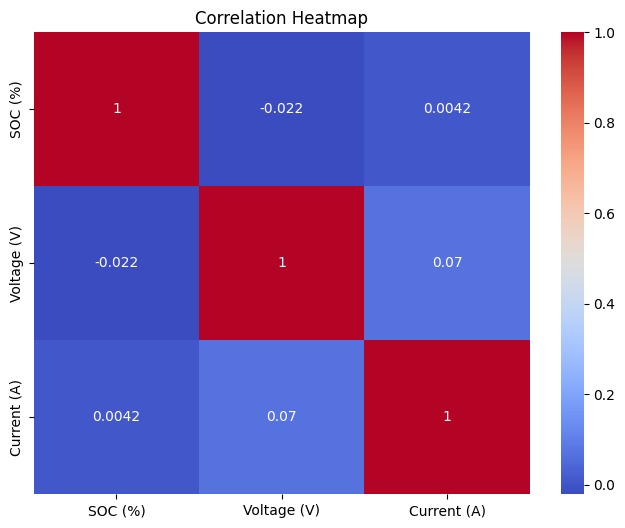

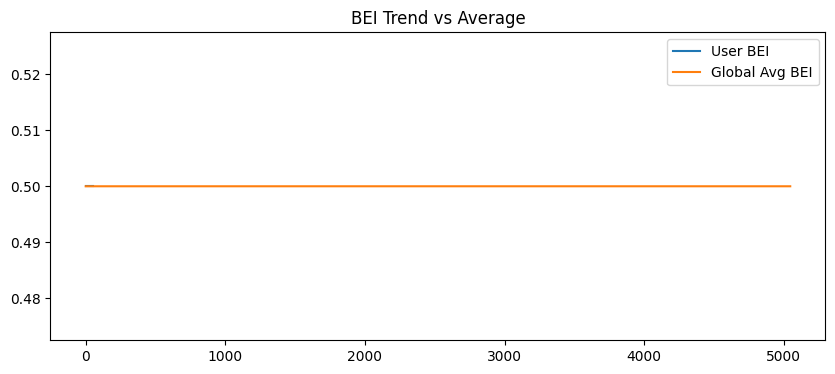

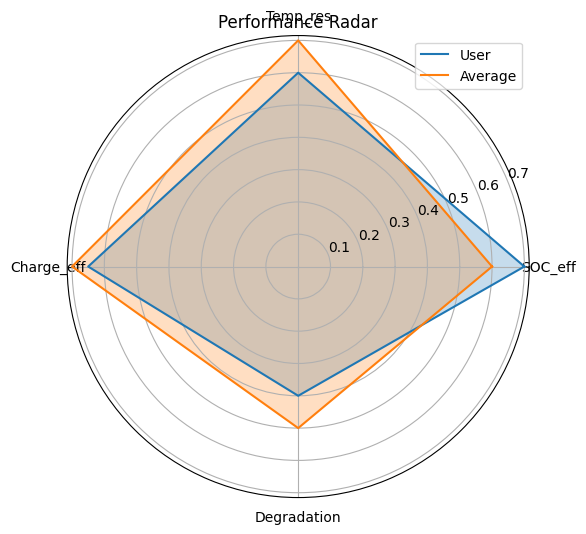

In [ ]:
def plot_bei_trend(user_df, all_df, date_col=None, bei_col='BEI'):
    plt.figure(figsize=(10,4))
    if date_col and date_col in user_df.columns:
        user_df = user_df.sort_values(date_col)
        plt.plot(user_df[date_col], user_df[bei_col], label='User BEI')
        plt.plot(all_df[date_col].rolling(7, min_periods=1)[bei_col].mean(),
                 label='Global Avg BEI')
    else:
        plt.plot(user_df[bei_col].reset_index(drop=True), label='User BEI')
        plt.plot(all_df[bei_col].rolling(10, min_periods=1).mean(),
                 label='Global Avg BEI')
    plt.legend(); plt.title("BEI Trend vs Average"); plt.show()

def plot_corr_heatmap(df, features=None):
    if features is None:
        features = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(8,6))
    sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap"); plt.show()

def plot_radar(user_scores, avg_scores, labels):
    import math
    N=len(labels); angles=[n/float(N)*2*math.pi for n in range(N)]; angles+=angles[:1]
    u=user_scores+user_scores[:1]; a=avg_scores+avg_scores[:1]
    fig=plt.figure(figsize=(6,6)); ax=fig.add_subplot(111,polar=True)
    ax.plot(angles,u,label='User'); ax.fill(angles,u,alpha=0.25)
    ax.plot(angles,a,label='Average'); ax.fill(angles,a,alpha=0.25)
    ax.set_thetagrids([a*180/np.pi for a in angles[:-1]], labels)
    ax.legend(); ax.set_title("Performance Radar"); plt.show()

# Demos
plot_corr_heatmap(df, numeric_features)

# Fix: Use df for both user and global data, or use actual test data correctly
plot_bei_trend(df.head(50), df)  # Use first 50 rows as "user" data

plot_radar([0.7,0.6,0.65,0.4], [0.6,0.7,0.7,0.5],
           ['SOC_eff','Temp_res','Charge_eff','Degradation'])

### Visualization Suite for Battery Insights  
We define a set of reusable visualization functions that help interpret the **Battery Efficiency Index (BEI)** and related metrics from both user-specific and global perspectives.

---

#### 1. `plot_bei_trend(user_df, all_df, date_col=None, bei_col='BEI')`
Plots the **trend of BEI over time** for a given user compared to the global average.

**Function Logic:**
- If a date column is available → sort chronologically and plot user BEI vs. 7-day rolling global average.  
- Otherwise → plot sequential BEI values (index-based) vs. 10-point rolling mean for global data.  
- Visual comparison helps identify whether the user’s battery performance is improving or declining relative to the population.

---

#### 2. `plot_corr_heatmap(df, features=None)`
Displays a **correlation heatmap** among numeric features (default) or a user-provided subset.

**Purpose:**
- Highlights linear relationships between electrical, thermal, and degradation-related parameters.  
- Warm colors indicate strong positive correlation, cool colors indicate negative correlation.

---

#### 3. `plot_radar(user_scores, avg_scores, labels)`
Generates a **radar (spider) chart** comparing user performance metrics to global averages.

**Function Logic:**
- Converts metric lists into polar coordinates and connects them in a circular plot.  
- Useful for benchmarking — for example, how a user’s SOC efficiency, temperature resilience, and charge efficiency compare with average fleet values.

---

#### **Demo Section**
We demonstrate these functions using sample data:

1. `plot_corr_heatmap(df, numeric_features)` — correlation map of numeric parameters.  
2. `plot_bei_trend(df.head(50), df)` — BEI trajectory of the first 50 rows as simulated user data vs. overall trend.  
3. `plot_radar(...)` — radar visualization comparing user vs. average scores across multiple metrics.

Together, these plots provide interpretable, data-driven insights into EV battery performance and degradation patterns.


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# === 1. Load dataset ===
# Assuming df is already loaded from a previous cell.
# If not, uncomment the line below:
df = pd.read_csv("/content/ev_battery_augmented.csv")

# === 2. Define features and target ===
target_col = "Optimal Charging Duration Class"  # replace if your target name differs

# Drop the target column, 'Charging Duration (min)', and 'DurationClass' from the feature set X to prevent data leakage and type errors
X = df.drop(columns=[target_col,])
y = df[target_col]

# === Handle missing values in the target variable ===
# Use SimpleImputer to fill NaN values in the target variable
# Using median as it's robust to outliers, similar to earlier imputation
target_imputer = SimpleImputer(strategy='median')
y = target_imputer.fit_transform(y.values.reshape(-1, 1)).ravel() # Reshape for imputer and flatten back


# === 3. Separate numerical and categorical columns based on original dtypes ===
# Define numerical and categorical columns based on the dtypes in the created X dataframe
numeric_features_for_pipeline = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features_for_pipeline = X.select_dtypes(include=["object", "category"]).columns.tolist()


print("Numeric features for pipeline:", numeric_features_for_pipeline)
print("Categorical features for pipeline:", categorical_features_for_pipeline)


# === 4. Preprocessing ===
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Add imputer here as well
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')), # Add imputer here
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

# Use the refined lists of features for the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_for_pipeline),
        ("cat", categorical_transformer, categorical_features_for_pipeline)
    ],
    remainder='passthrough' # Keep other columns not in num_cols or cat_cols (if any)
)

# === 5. Create the model pipeline ===
model = RandomForestRegressor(
    n_estimators=150,
    random_state=42,
    max_depth=10
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

# === 6. Train-test split ===
# Use the imputed y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 7. Train the model ===
pipeline.fit(X_train, y_train)

# === 8. Evaluate ===
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# === 9. Save the pipeline and feature columns ===
# Save the trained pipeline
joblib.dump(pipeline, "optimal_duration_reg_pipeline.pkl") # Changed name to be more specific

# Save feature column order (for potential later use or visualization)
# Get the feature names after preprocessing
processed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
joblib.dump(processed_feature_names, "optimal_duration_model_columns.pkl") # Changed name

print("\n✅ Training complete!")
print("Saved files:")
print(" - optimal_duration_reg_pipeline.pkl")
print(" - optimal_duration_model_columns.pkl")

Numeric features for pipeline: ['SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)', 'Ambient Temp (°C)', 'Charging Duration (min)', 'Degradation Rate (%)', 'Efficiency (%)', 'Charging Cycles']
Categorical features for pipeline: ['Charging Mode', 'Battery Type', 'EV Model']
Model Evaluation:
Mean Squared Error: 1.096
R² Score: 0.133

✅ Training complete!
Saved files:
 - optimal_duration_reg_pipeline.pkl
 - optimal_duration_model_columns.pkl


In [ ]:
import gradio as gr
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the trained pipeline, the full dataset and model columns
try:
    pipeline = joblib.load('optimal_duration_reg_pipeline.pkl')
    df_full = pd.read_csv('/content/ev_battery_augmented.csv')
    model_cols = joblib.load('optimal_duration_model_columns.pkl')
except FileNotFoundError as e:
    print(f"Error loading a required file: {e}")
    print("Please make sure 'optimal_duration_reg_pipeline.pkl', 'ev_battery_augmented.csv', and 'optimal_duration_model_columns.pkl' are in the same directory.")
    exit()


# Define the prediction and plotting function
def predict_and_plot(soc, voltage, current, temp, ambient_temp, duration, degradation, efficiency, mode, battery_type, cycles, ev_model):
    # Create a pandas DataFrame from the inputs
    feature_names = [
        'SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)',
        'Ambient Temp (°C)', 'Charging Duration (min)', 'Degradation Rate (%)',
        'Efficiency (%)', 'Charging Mode', 'Battery Type', 'Charging Cycles',
        'EV Model'
    ]
    args = [soc, voltage, current, temp, ambient_temp, duration, degradation, efficiency, mode, battery_type, cycles, ev_model]
    input_df = pd.DataFrame([args], columns=feature_names)

    # --- Debugging Print ---
    print("\n--- Input DataFrame to Pipeline ---")
    print(input_df.to_string())
    # ------------------------

    # Make a prediction
    prediction = pipeline.predict(input_df)[0]

    # --- Debugging Print ---
    print(f"\n--- Prediction from Pipeline: {prediction} ---")
    # -----------------------

    prediction_text = f'Predicted Optimal Charging Duration Class: {prediction:.2f}'

    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot 1: Histogram for SOC (%)
    sns.histplot(df_full['SOC (%)'].dropna(), ax=axes[0, 0], kde=True)
    axes[0, 0].axvline(soc, color='red', linestyle='--', label=f'Your Input: {soc:.2f}')
    axes[0, 0].set_title('SOC (%) Distribution')
    axes[0, 0].legend()

    # Plot 2: Boxplot for Charging Duration (min)
    sns.boxplot(x=df_full['Charging Duration (min)'].dropna(), ax=axes[0, 1])
    axes[0, 1].scatter(duration, 0, color='red', s=100, zorder=5, label=f'Your Input: {duration:.2f}')
    axes[0, 1].set_title('Charging Duration (min) Distribution')
    axes[0, 1].legend()

    # Plot 3: Countplot for EV Model
    sns.countplot(y=df_full['EV Model'].dropna(), ax=axes[1, 0])
    axes[1, 0].set_title('EV Model Counts in Training Data')

    # Plot 4: Feature Importance
    try:
        # Assumes the model is the last step in the pipeline
        model = pipeline.steps[-1][1]
        importances = model.feature_importances_

        if len(importances) == len(model_cols):
            feature_importance_df = pd.DataFrame({'feature': model_cols, 'importance': importances})
            feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(10)

            sns.barplot(x='importance', y='feature', data=feature_importance_df, ax=axes[1, 1])
            axes[1, 1].set_title('Top 10 Feature Importances')
        else:
            # This part is for debugging the length mismatch
            print(f"\n--- Feature Importance Mismatch ---")
            print(f"Number of feature importances from model: {len(importances)}")
            print(f"Number of columns in model_cols.pkl: {len(model_cols)}")
            print("-------------------------------------")
            axes[1, 1].text(0.5, 0.5, 'Feature importance cannot be displayed.\nNumber of features from model and columns file do not match.', ha='center', va='center')
            axes[1, 1].set_title('Feature Importances')

    except (AttributeError, IndexError):
        axes[1, 1].text(0.5, 0.5, 'Feature importance not available for this model.', ha='center', va='center')
        axes[1, 1].set_title('Feature Importances')

    plt.tight_layout()

    return prediction_text, fig

# Define the Gradio Interface using Blocks
with gr.Blocks() as iface:
    gr.Markdown("# EV Battery Health Analyzer with Visualizations")
    gr.Markdown("Enter the EV battery stats to predict the optimal charging duration class and see visualizations.")

    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("### Input Features")
            with gr.Accordion("Battery & Charging Stats", open=False):
                soc = gr.Slider(0, 100, label='SOC (%)')
                voltage = gr.Slider(2, 5, label='Voltage (V)')
                current = gr.Slider(0, 550, label='Current (A)')
                duration = gr.Slider(10, 700, label='Charging Duration (min)')
                cycles = gr.Slider(10, 8000, label='Charging Cycles')

            with gr.Accordion("Temperature & Health", open=False):
                temp = gr.Slider(10, 50, label='Battery Temp (°C)')
                ambient_temp = gr.Slider(5, 40, label='Ambient Temp (°C)')
                degradation = gr.Slider(1, 100, label='Degradation Rate (%)')
                efficiency = gr.Slider(80, 100, label='Efficiency (%)')

            with gr.Accordion("Mode & Type", open=False):
                mode = gr.Dropdown(['Fast', 'Slow', 'Normal'], label='Charging Mode')
                battery_type = gr.Dropdown(['Li-ion', 'LiFePO4'], label='Battery Type')
                ev_model = gr.Dropdown(['Model A', 'Model B', 'Model C'], label='EV Model')

            predict_btn = gr.Button("Predict")

        with gr.Column(scale=2):
            gr.Markdown("### Prediction Results")
            text_output = gr.Textbox(label="Prediction")
            plot_output = gr.Plot(label="Data Visualizations")

    inputs = [
        soc, voltage, current, temp, ambient_temp, duration, degradation,
        efficiency, mode, battery_type, cycles, ev_model
    ]

    predict_btn.click(
        fn=predict_and_plot,
        inputs=inputs,
        outputs=[text_output, plot_output]
    )

# Launch the app
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b879f82f5cf74689f1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
df.head()

SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  Ambient Temp (°C)  \
0  43.708611     3.629593    33.553512          33.454060          26.439918   
1  95.564288     3.879331    32.228092          35.933628          31.108647   
2  75.879455     4.111062    91.562912          25.009358          30.203219   
3  63.879264     4.012557    32.459158          32.497482          18.077998   
4  24.041678     4.064593    34.475475          31.434920          17.984989   

   Charging Duration (min)  Degradation Rate (%) Charging Mode  \
0                59.363552              8.805096          Fast   
1                67.343566             12.186860          Fast   
2               105.454739             13.832336          Slow   
3                54.000439              9.318874          Fast   
4               106.964968             11.687577          Fast   

   Efficiency (%) Battery Type  Charging Cycles EV Model  \
0       98.238981       Li-ion            112.0  Model B   
1       97.562628      LiFePO4            398.0  Model A   
2       97.233533      LiFePO4            175.0  Model A   
3       98.136225      LiFePO4              NaN  Model B   
4       97.662485       Li-ion            886.0  Model C   

   Optimal Charging Duration Class  
0                              1.0  
1                              1.0  
2                              2.0  
3                              1.0  
4                              2.0

In [ ]:
df.dtypes

SOC (%)                            float64
Voltage (V)                        float64
Current (A)                        float64
Battery Temp (°C)                  float64
Ambient Temp (°C)                  float64
Charging Duration (min)            float64
Degradation Rate (%)               float64
Charging Mode                       object
Efficiency (%)                     float64
Battery Type                        object
Charging Cycles                    float64
EV Model                            object
Optimal Charging Duration Class    float64
dtype: object

In [ ]:
df=df_copy2

In [ ]:
#battery efficiency thresholds
BEI_THRESHOLDS = {
'A': (0.8, 1.0), # best
'B': (0.65, 0.8),
'C': (0.5, 0.65),
'D': (0.3, 0.5),
'E': (0.0, 0.3) # worst
}

In [ ]:
RANDOM_STATE = 42

In [ ]:
print('Loaded dataset with shape:', df.shape)
print('Columns:', df.columns.tolist())

Loaded dataset with shape: (5050, 13)
Columns: ['SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)', 'Ambient Temp (°C)', 'Charging Duration (min)', 'Degradation Rate (%)', 'Charging Mode', 'Efficiency (%)', 'Battery Type', 'Charging Cycles', 'EV Model', 'Optimal Charging Duration Class']


In [ ]:
required_cols = ['Battery Type','SOC (%)','Temperature (°C)','Charging Mode','Voltage (V)','Current (A)','Cycle Count','EV Model']
col_map = {}
lc = {c.lower().strip():c for c in df.columns}


def find_col(targets):
    for t in targets:
        if t.lower() in lc:
            return lc[t.lower()]
# try partial match
    for k,v in lc.items():
        for t in targets:
            if t.lower() in k:
                return v
    return None


col_map['battery_type'] = find_col(['Battery Type','BatteryType','Battery'])
col_map['soc'] = find_col(['SOC (%)','SOC','State of Charge','SoC'])
col_map['temp'] = find_col(['Temperature (°C)','Temperature','Temp'])
col_map['charging_mode'] = find_col(['Charging Mode','ChargingMode','Charge Mode'])
col_map['voltage'] = find_col(['Voltage (V)','Voltage','Volt'])
col_map['current'] = find_col(['Current (A)','Current','Amp'])
col_map['cycle_count'] = find_col(['Cycle Count','Cycles','CycleCount'])
col_map['ev_model'] = find_col(['EV Model','Model','EVModel'])
col_map['bei'] = find_col(['BEI','Battery Efficiency Index','Battery Efficiency'])


print('Inferred column mapping:')
for k,v in col_map.items():
    print(k, ':', v)

Inferred column mapping:
battery_type : Battery Type
soc : SOC (%)
temp : Battery Temp (°C)
charging_mode : Charging Mode
voltage : Voltage (V)
current : Current (A)
cycle_count : Charging Cycles
ev_model : EV Model
bei : None


In [ ]:
needed = [v for k,v in col_map.items() if k in ['battery_type','soc','temp','charging_mode','voltage','current','cycle_count','ev_model']]
needed = [c for c in needed if c is not None]
df = df.dropna(subset=needed)

In [ ]:
if col_map['bei'] is None:
    df['BEI'] = (
        (df[col_map['soc']].astype(float) / 100.0) * 0.5 +
        (1 / (1 + np.abs(df[col_map['temp']].astype(float) - 25))) * 0.2 +
        (1 / (1 + df[col_map['cycle_count']].astype(float))) * 0.3
    )
    print('Computed proxy BEI (since original BEI not found).')
    col_map['bei'] = 'BEI'
else:
    df[col_map['bei']] = pd.to_numeric(df[col_map['bei']], errors='coerce')

Computed proxy BEI (since original BEI not found).


In [ ]:
if df[col_map['bei']].max() > 1 or df[col_map['bei']].min() < 0:
    bei_min = df[col_map['bei']].min()
    bei_max = df[col_map['bei']].max()
    df['BEI_norm'] = (df[col_map['bei']] - bei_min) / (bei_max - bei_min)
    bei_col = 'BEI_norm'
else:
    bei_col = col_map['bei']

print('Using BEI column:', bei_col)

Using BEI column: BEI_norm


In [ ]:
def bei_to_class(bei_value, thresholds=BEI_THRESHOLDS):
    for cls, (low, high) in thresholds.items():
        if low <= bei_value <= high:
            return cls
    return 'Unknown'

In [ ]:
if bei_col != 'BEI_norm':
    minv = df[bei_col].min()
    maxv = df[bei_col].max()
    df['BEI_norm'] = (df[bei_col] - minv) / (maxv - minv)

df['BEI_Class'] = df['BEI_norm'].apply(lambda x: bei_to_class(x, BEI_THRESHOLDS))

print('Class distribution:\n', df['BEI_Class'].value_counts())

Class distribution:
 BEI_Class
E    4479
D      13
C      10
A      10
B       8
Name: count, dtype: int64


In [ ]:
feature_cols = [col_map['battery_type'], col_map['soc'], col_map['temp'], col_map['charging_mode'], col_map['voltage'], col_map['current'], col_map['cycle_count'], col_map['ev_model']]
feature_cols = [c for c in feature_cols if c is not None]

X = df[feature_cols].copy()
y = df['BEI_Class']

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import sqlite3
import pickle

In [ ]:
encoders = {}
for c in X.select_dtypes(include=['object','category']).columns:
    le = LabelEncoder()
    X[c] = X[c].astype(str)
    X[c] = le.fit_transform(X[c])
    encoders[c] = le

for c in X.select_dtypes(include=['int64','float64']).columns:
    X[c] = pd.to_numeric(X[c], errors='coerce')

X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

pca = PCA(n_components=min(6, X_scaled.shape[1]))
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, random_state=RANDOM_STATE, stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (3164, 8) Test shape: (1356, 8)


In [ ]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=RANDOM_STATE),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
model_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    model_scores[name] = (scores.mean(), scores.std())

print('10-fold CV results:')
for k,(m,s) in model_scores.items():
    print(f"{k}: mean acc = {m:.4f}, std = {s:.4f}")

best_model_name = max(model_scores.items(), key=lambda kv: kv[1][0])[0]
best_model = models[best_model_name]
print('Selected best model:', best_model_name)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

with open('bei_model.pkl','wb') as f:
    pickle.dump({
        'model': best_model,
        'scaler': scaler,
        'encoders': encoders,
        'feature_cols': X.columns.tolist(),
        'bei_thresholds': BEI_THRESHOLDS
    }, f)
print('Saved model to bei_model.pkl')

10-fold CV results:
RandomForest: mean acc = 0.9956, std = 0.0025
GradientBoosting: mean acc = 0.9984, std = 0.0021
LogisticRegression: mean acc = 0.9962, std = 0.0024
Selected best model: GradientBoosting
Test accuracy: 0.9977876106194691
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00         2
           C       0.67      0.67      0.67         3
           D       0.75      0.75      0.75         4
           E       1.00      1.00      1.00      1344

    accuracy                           1.00      1356
   macro avg       0.88      0.88      0.88      1356
weighted avg       1.00      1.00      1.00      1356

Saved model to bei_model.pkl


In [ ]:
def plot_bei_trend(user_inputs, df=df, bei_col='BEI_norm'):
    """Main BEI trend: We'll show a rolling mean of BEI across the dataset and overlay the user's BEI."""

    data = df.copy()
    if 'Cycle Count' in data.columns:
            sort_col = [c for c in data.columns if 'Cycle' in c or 'cycle' in c]
            if sort_col:
                data = data.sort_values(by=sort_col[0])
    data['rolling_mean'] = data[bei_col].rolling(window=max(5, int(len(data)*0.02))).mean()

    user_bei = compute_user_bei(user_inputs, df=df)

    plt.figure(figsize=(8,4))
    plt.plot(data[bei_col].values, alpha=0.3, label='population samples')
    plt.plot(data['rolling_mean'].values, linewidth=2, label='population rolling mean')
    plt.axhline(y=data[bei_col].mean(), linestyle='--', label='population mean')

    plt.scatter([len(data)//2], [user_bei], color='red', zorder=5, label='user BEI (relative)')
    plt.title('Main BEI trend — user vs population')
    plt.ylabel('BEI (normalized)')
    plt.legend()
    plt.tight_layout()
    return plt

def plot_root_cause(user_inputs, df=df, bei_col='BEI_norm'):
    """Show correlation of features with BEI and heatmap of correlations."""

    numeric = df.select_dtypes(include=[np.number]).copy()
    if bei_col not in numeric.columns:
        numeric[bei_col] = df[bei_col]
    corrs = numeric.corr()[bei_col].drop(bei_col).sort_values(ascending=False)

    fig, axes = plt.subplots(1,2, figsize=(12,4))

    corrs.head(8).plot(kind='bar', ax=axes[0])
    axes[0].set_title('Top features correlated with BEI')
    axes[0].set_ylabel('Pearson r')

    sns.heatmap(numeric.corr(), ax=axes[1], cmap='vlag', center=0)
    axes[1].set_title('Full correlation heatmap')
    plt.tight_layout()
    return plt

def plot_radar(user_inputs, df=df):
    keys = []
    if col_map['soc'] and col_map['temp'] and col_map['voltage'] and col_map['current'] and col_map['cycle_count']:
        keys = [col_map['soc'], col_map['temp'], col_map['voltage'], col_map['current'], col_map['cycle_count']]
    else:
        keys = df.select_dtypes(include=[np.number]).columns.tolist()[:5]

    pop_mean = df[keys].mean()
    user_vals = pd.Series({k: user_inputs.get(k, pop_mean[k]) for k in keys})

    minv = df[keys].min()
    maxv = df[keys].max()
    pop_norm = (pop_mean - minv) / (maxv - minv)
    user_norm = (user_vals - minv) / (maxv - minv)

    labels = keys
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    pop_vals = np.concatenate((pop_norm.values, [pop_norm.values[0]]))
    user_vals = np.concatenate((user_norm.values, [user_norm.values[0]]))
    angles = angles + [angles[0]]


    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, pop_vals, linewidth=2, label='population mean')
    ax.fill(angles, pop_vals, alpha=0.25)
    ax.plot(angles, user_vals, linewidth=2, label='user')
    ax.fill(angles, user_vals, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title('Performance radar — user vs population')
    ax.legend(loc='upper right')
    plt.tight_layout()
    return plt

def compute_user_bei(user_inputs, df=df):
    if 'BEI' in df.columns:
        v_soc = float(user_inputs.get(col_map['soc']))
        v_temp = float(user_inputs.get(col_map['temp']))
        v_cycle = float(user_inputs.get(col_map['cycle_count']))
        proxy = (v_soc/100.0)*0.5 + (1 / (1 + abs(v_temp-25))) * 0.2 + (1/(1+v_cycle)) * 0.3
        if 'BEI_norm' in df.columns:
            return min(max(proxy, 0.0), 1.0)
        else:
            return proxy
    else:
        return 0.5

In [ ]:
CLASS_RECOMMENDATIONS = {
    'A': {
            'SOC (%)': 'Maintain current SOC range; occasional top-ups are fine.',
            'Temperature (°C)': 'Temperature is optimal; continue standard cooling.',
            'Voltage (V)': 'Voltage is healthy.',
            'Current (A)': 'Current draw acceptable.',
            'Cycle Count': 'Battery cycle is low; good lifespan remaining.'
        },
    'B': {
            'SOC (%)': 'Consider avoiding full charge/discharge extremes.',
            'Temperature (°C)': 'Monitor temperature during heavy charging; avoid >40°C.',
            'Voltage (V)': 'Check voltage if you observe dips during load.',
            'Current (A)': 'Avoid sustained high currents.',
            'Cycle Count': 'Moderate cycles — aim to reduce deep cycles.'
    },
    'C': {
            'SOC (%)': 'Reduce time spent at very high SOC (>90%) or very low (<20%).',
            'Temperature (°C)': 'Use active cooling if temps exceed 35°C frequently.',
            'Voltage (V)': 'Inspect battery for balancing issues.',
            'Current (A)': 'Lower charge/discharge currents where possible.',
            'Cycle Count': 'Consider service/inspection if cycles are very high.'
    },
    'D': {
            'SOC (%)': 'Avoid deep discharge and frequent full charges.',
            'Temperature (°C)': 'Temperature control needed; avoid high temp charging.',
            'Voltage (V)': 'Immediate check recommended — inconsistent voltages may indicate cell issues.',
            'Current (A)': 'Limit high currents; use gentler charging modes.',
            'Cycle Count': 'High cycle count — battery aging likely; budget for replacement.'
    },
    'E': {
            'SOC (%)': 'Minimize stress — keep SOC between 30-70% where possible.',
            'Temperature (°C)': 'Avoid charging in hot environments; battery likely degraded.',
            'Voltage (V)': 'Service required — voltages outside nominal range detected.',
            'Current (A)': 'Use slow charging only; avoid fast charging.',
            'Cycle Count': 'Cycle count very high — replacement strongly recommended.'
    }
}

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image

# Helper to convert matplotlib figure to PIL image
def fig_to_image(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    img = Image.open(buf)
    return img

battery_options = sorted(df[col_map['battery_type']].astype(str).unique().tolist()) if col_map['battery_type'] else []
charging_mode_options = sorted(df[col_map['charging_mode']].astype(str).unique().tolist()) if col_map['charging_mode'] else []
ev_model_options = sorted(df[col_map['ev_model']].astype(str).unique().tolist()) if col_map['ev_model'] else []

def predict_and_visualize(battery_type, soc, temperature, charging_mode, voltage, current, cycle_count, ev_model):
    if str(battery_type) not in battery_options:
        return 'Error: Battery Type not recognized.', None, None, None
    if str(charging_mode) not in charging_mode_options:
        return 'Error: Charging Mode not recognized.', None, None, None
    if str(ev_model) not in ev_model_options:
        return 'Error: EV Model not recognized.', None, None, None

    user_row = {
        col_map['battery_type']: battery_type,
        col_map['soc']: soc,
        col_map['temp']: temperature,
        col_map['charging_mode']: charging_mode,
        col_map['voltage']: voltage,
        col_map['current']: current,
        col_map['cycle_count']: cycle_count,
        col_map['ev_model']: ev_model
    }

    user_bei = compute_user_bei(user_row, df=df)

    user_df = pd.DataFrame([user_row])[X.columns]
    for c, le in encoders.items():
        user_df[c] = user_df[c].astype(str)
        if user_df[c].iloc[0] in le.classes_:
            user_df[c] = le.transform(user_df[c])
        else:
            user_df[c] = 0
    user_df = user_df.fillna(X.median())
    user_scaled = pd.DataFrame(scaler.transform(user_df), columns=user_df.columns)

    pred_class = best_model.predict(user_scaled)[0]
    recs = CLASS_RECOMMENDATIONS.get(pred_class, {})
    rec_text = '\n'.join([f"{k}: {v}" for k, v in recs.items()])

    plt1 = plot_bei_trend(user_row, df=df, bei_col='BEI_norm')
    fig1 = plt1.gcf()
    plt1.close()
    img1 = fig_to_image(fig1)

    plt2 = plot_root_cause(user_row, df=df, bei_col='BEI_norm')
    fig2 = plt2.gcf()
    plt2.close()
    img2 = fig_to_image(fig2)

    plt3 = plot_radar(user_row, df=df)
    fig3 = plt3.gcf()
    plt3.close()
    img3 = fig_to_image(fig3)

    class_ranges_str = '\n'.join([f"{k}: {v[0]} - {v[1]}" for k, v in BEI_THRESHOLDS.items()])
    output_text = f"Predicted BEI Class: {pred_class}\n\nRecommendations:\n{rec_text}\n\nClass ranges (BEI normalized):\n{class_ranges_str}"

    return output_text, img1, img2, img3


with gr.Blocks() as demo:
    gr.Markdown('## ⚡ EV Battery BEI — Smart Calculator')
    with gr.Row():
        with gr.Column(scale=1):
            battery_type_in = gr.Dropdown(battery_options, label='Battery Type')
            soc_in = gr.Slider(minimum=0, maximum=100, step=0.1, label='SOC (%)', value=80)
            temp_in = gr.Number(value=25.0, label='Temperature (°C)')
            charging_mode_in = gr.Dropdown(charging_mode_options, label='Charging Mode')
            voltage_in = gr.Number(value=400.0, label='Voltage (V)')
            current_in = gr.Number(value=50.0, label='Current (A)')
            cycle_count_in = gr.Number(value=100, label='Cycle Count')
            ev_model_in = gr.Dropdown(ev_model_options, label='EV Model')
            btn = gr.Button('Generate')
        with gr.Column(scale=1):
            output_text = gr.Textbox(label='Result & Recommendations', lines=10)
            img1 = gr.Image(label='Main BEI trend')
            img2 = gr.Image(label='Root cause view')
            img3 = gr.Image(label='Performance radar')

    btn.click(
        predict_and_visualize,
        inputs=[battery_type_in, soc_in, temp_in, charging_mode_in, voltage_in, current_in, cycle_count_in, ev_model_in],
        outputs=[output_text, img1, img2, img3]
    )

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e19c82cec534a36a69.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
